In [1]:
# Import the ParFlow package

 #runs for a year
#
from parflow import Run
import os
import shutil
from parflow.tools.fs import mkdir, cp, chdir, get_absolute_path, rm, exists
from parflow.tools.settings import set_working_directory

#print(os.getcwd())
#relative_path_to_runfolder = 'outputs'
#base = get_absolute_path(relative_path_to_runfolder)
#print(base)

# copy CLM files
set_working_directory('/home/ajcao/pfclm_sc/outputs')
# ParFlow Inputs
#cp('../../inputs/drv_clmin.dat') #timing info, where in the world 
#cp('../../inputs/drv_vegm.dat') #soil color, plant classes present
#cp('../../inputs/drv_vegp.dat') #properties of vegm plant classes
cp('../inputs/drv_clmin.dat', '../outputs/drv_clmin.dat')
cp('../inputs/drv_vegm.dat', '../outputs/drv_vegm.dat')
cp('../inputs/drv_vegp-Copy1.dat', '../outputs/drv_vegp-Copy1.dat')
#cp('../inputs/drv_vegp-Copy1.dat', '../outputs/drv_vegp-Copy1.dat')

# Set our Run Name 
#RunName = 'precip05a'
precip05a = Run("precip05a")

stopt = 3666 #8760

#-----------------------------------------------------------------------------
# File input version number
#-----------------------------------------------------------------------------
precip05a.FileVersion = 4

#-----------------------------------------------------------------------------
# Process Topology
#-----------------------------------------------------------------------------

precip05a.Process.Topology.P = 1
precip05a.Process.Topology.Q = 1
precip05a.Process.Topology.R = 1

#-----------------------------------------------------------------------------
# Computational Grid
#-----------------------------------------------------------------------------
precip05a.ComputationalGrid.Lower.X = 0.0
precip05a.ComputationalGrid.Lower.Y = 0.0
precip05a.ComputationalGrid.Lower.Z = 0.0

precip05a.ComputationalGrid.DX      = 2.0
precip05a.ComputationalGrid.DY      = 2.0
precip05a.ComputationalGrid.DZ      = 0.1

precip05a.ComputationalGrid.NX      = 1
precip05a.ComputationalGrid.NY      = 1
precip05a.ComputationalGrid.NZ      = 20

#-----------------------------------------------------------------------------
# The Names of the GeomInputs
#-----------------------------------------------------------------------------
precip05a.GeomInput.Names = 'domain_input'

#-----------------------------------------------------------------------------
# Domain Geometry Input
#-----------------------------------------------------------------------------
precip05a.GeomInput.domain_input.InputType = 'Box'
precip05a.GeomInput.domain_input.GeomName  = 'domain'

#-----------------------------------------------------------------------------
# Domain Geometry
#-----------------------------------------------------------------------------
precip05a.Geom.domain.Lower.X = 0.0
precip05a.Geom.domain.Lower.Y = 0.0
precip05a.Geom.domain.Lower.Z = 0.0

precip05a.Geom.domain.Upper.X = 2.0
precip05a.Geom.domain.Upper.Y = 2.0
precip05a.Geom.domain.Upper.Z = 2.0

precip05a.Geom.domain.Patches = 'x_lower x_upper y_lower y_upper z_lower z_upper'

#--------------------------------------------
# variable dz assignments
#------------------------------------------

precip05a.Solver.Nonlinear.VariableDz = True
precip05a.dzScale.GeomNames           = 'domain'
precip05a.dzScale.Type                = 'nzList'
precip05a.dzScale.nzListNumber        = 20

# cells start at the bottom (0) and moves up to the top
# domain is 3.21 m thick, root zone is down to 19 cells 
# so the root zone is 2.21 m thick
precip05a.Cell._0.dzScale.Value  = 10.0   # first cell is 10*0.1 1m thick
precip05a.Cell._1.dzScale.Value  = 5.0    # next cell is 5*0.1 50 cm thick
precip05a.Cell._2.dzScale.Value  = 1.0   
precip05a.Cell._3.dzScale.Value  = 1.0
precip05a.Cell._4.dzScale.Value  = 1.0
precip05a.Cell._5.dzScale.Value  = 1.0
precip05a.Cell._6.dzScale.Value  = 1.0
precip05a.Cell._7.dzScale.Value  = 1.0
precip05a.Cell._8.dzScale.Value  = 1.0
precip05a.Cell._9.dzScale.Value  = 1.0
precip05a.Cell._10.dzScale.Value = 1.0
precip05a.Cell._11.dzScale.Value = 1.0
precip05a.Cell._12.dzScale.Value = 1.0
precip05a.Cell._13.dzScale.Value = 1.0
precip05a.Cell._14.dzScale.Value = 1.0
precip05a.Cell._15.dzScale.Value = 1.0
precip05a.Cell._16.dzScale.Value = 1.0
precip05a.Cell._17.dzScale.Value = 0.2 #0.2   # changed to 0.2, 19-21, center is 20 cm. #10 cm (13-23 cm from top)
precip05a.Cell._18.dzScale.Value = 1.8 #1.8   #changed to 1.8, 1-19 cm from top, center is 10 cm #1*0.1 = 0.1 10 cm (2-12 cm from top)
precip05a.Cell._19.dzScale.Value = 0.1   #0.1* 0.1 = 0.01 0 cm from surface to 1 cm

#-----------------------------------------------------------------------------
# Perm
#-----------------------------------------------------------------------------
precip05a.Geom.Perm.Names              = 'domain'
precip05a.Geom.domain.Perm.Type        = 'Constant'
precip05a.Geom.domain.Perm.Value       = 0.001465 #0.0158 CONUS #0.001465 default #0.03333 Laio et al. Ks in m/h
precip05a.Perm.TensorType              = 'TensorByGeom'
precip05a.Geom.Perm.TensorByGeom.Names = 'domain'
precip05a.Geom.domain.Perm.TensorValX  = 1.0
precip05a.Geom.domain.Perm.TensorValY  = 1.0
precip05a.Geom.domain.Perm.TensorValZ  = 1.0

#-----------------------------------------------------------------------------
# Specific Storage
#-----------------------------------------------------------------------------

precip05a.SpecificStorage.Type              = 'Constant'
precip05a.SpecificStorage.GeomNames         = 'domain'
precip05a.Geom.domain.SpecificStorage.Value = 1.0e-4

#-----------------------------------------------------------------------------
# Phases
#-----------------------------------------------------------------------------

precip05a.Phase.Names = 'water'

precip05a.Phase.water.Density.Type     = 'Constant'
precip05a.Phase.water.Density.Value    = 1.0

precip05a.Phase.water.Viscosity.Type   = 'Constant'
precip05a.Phase.water.Viscosity.Value  = 1.0

#-----------------------------------------------------------------------------
# Contaminants
#-----------------------------------------------------------------------------
precip05a.Contaminants.Names = ''


#-----------------------------------------------------------------------------
# Gravity
#-----------------------------------------------------------------------------

precip05a.Gravity = 1.0

#-----------------------------------------------------------------------------
# Setup timing info
#-----------------------------------------------------------------------------

precip05a.TimingInfo.BaseUnit     = 1.0
precip05a.TimingInfo.StartCount   = 0
precip05a.TimingInfo.StartTime    = 0.0
precip05a.TimingInfo.StopTime     = stopt
precip05a.TimingInfo.DumpInterval = 1.0
precip05a.TimeStep.Type           = 'Constant'
precip05a.TimeStep.Value          = 1.0


#-----------------------------------------------------------------------------
# Porosity
#-----------------------------------------------------------------------------

precip05a.Geom.Porosity.GeomNames    = 'domain'

precip05a.Geom.domain.Porosity.Type  = 'Constant'
precip05a.Geom.domain.Porosity.Value = 0.43 #0.39 CONUS #0.43 #default is 0.3

#-----------------------------------------------------------------------------
# Domain
#-----------------------------------------------------------------------------
precip05a.Domain.GeomName = 'domain'

#-----------------------------------------------------------------------------
# Mobility
#-----------------------------------------------------------------------------
precip05a.Phase.water.Mobility.Type  = 'Constant'
precip05a.Phase.water.Mobility.Value = 1.0

#-----------------------------------------------------------------------------
# Relative Permeability
#-----------------------------------------------------------------------------

precip05a.Phase.RelPerm.Type        = 'VanGenuchten'
precip05a.Phase.RelPerm.GeomNames   = 'domain'

precip05a.Geom.domain.RelPerm.Alpha = 2.2 #2.2 #1.9 good for 20 cm, 2.2 good for 10 cm. #2.6 #2.0, 1.0 makes the declines in soil moisture more rapid, more bumpy ig
precip05a.Geom.domain.RelPerm.N     = 2.0 #2.0 #2.2 #2.0

#---------------------------------------------------------
# Saturation
#---------------------------------------------------------

precip05a.Phase.Saturation.Type        = 'VanGenuchten'
precip05a.Phase.Saturation.GeomNames   = 'domain'

precip05a.Geom.domain.Saturation.Alpha = 2.0 #2.69 CONUS #2.0 #2.2 #2.0 default, 1.0 shifts it up a lot
precip05a.Geom.domain.Saturation.N     = 3.0 #2.45 CONUS #3.0 #2.8 #3.0 default, 2.0 shifts it up a lot too
#precip05a.Geom.domain.Saturation.SRes  = 0.2
precip05a.Geom.domain.Saturation.SRes  = 0.14 #0.14 laio #0.1 CONUS

precip05a.Geom.domain.Saturation.SSat  = 1.0 #1.0

#-----------------------------------------------------------------------------
# Wells
#-----------------------------------------------------------------------------
precip05a.Wells.Names = ''


#-----------------------------------------------------------------------------
# Time Cycles
#-----------------------------------------------------------------------------
precip05a.Cycle.Names = 'constant'
precip05a.Cycle.constant.Names = 'alltime'
precip05a.Cycle.constant.alltime.Length = 1
precip05a.Cycle.constant.Repeat = -1

#-----------------------------------------------------------------------------
# Boundary Conditions: Pressure
#-----------------------------------------------------------------------------
precip05a.BCPressure.PatchNames = 'x_lower x_upper y_lower y_upper z_lower z_upper'

precip05a.Patch.x_lower.BCPressure.Type          = 'FluxConst'
precip05a.Patch.x_lower.BCPressure.Cycle         = 'constant'
precip05a.Patch.x_lower.BCPressure.alltime.Value = 0.0

precip05a.Patch.y_lower.BCPressure.Type          = 'FluxConst'
precip05a.Patch.y_lower.BCPressure.Cycle         = 'constant'
precip05a.Patch.y_lower.BCPressure.alltime.Value = 0.0

#precip05a.Patch.z_lower.BCPressure.Type = 'FluxConst'
precip05a.Patch.z_lower.BCPressure.Type          = 'DirEquilRefPatch'
precip05a.Patch.z_lower.BCPressure.RefGeom       = 'domain'
precip05a.Patch.z_lower.BCPressure.RefPatch      = 'z_lower'
precip05a.Patch.z_lower.BCPressure.Cycle         = 'constant'
precip05a.Patch.z_lower.BCPressure.alltime.Value = 0.0

precip05a.Patch.x_upper.BCPressure.Type          = 'FluxConst'
precip05a.Patch.x_upper.BCPressure.Cycle         = 'constant'
precip05a.Patch.x_upper.BCPressure.alltime.Value = 0.0

precip05a.Patch.y_upper.BCPressure.Type          = 'FluxConst'
precip05a.Patch.y_upper.BCPressure.Cycle         = 'constant'
precip05a.Patch.y_upper.BCPressure.alltime.Value = 0.0

precip05a.Patch.z_upper.BCPressure.Type          = 'OverlandFlow'
precip05a.Patch.z_upper.BCPressure.Cycle         = 'constant'
precip05a.Patch.z_upper.BCPressure.alltime.Value = 0.0

#---------------------------------------------------------
# Topo slopes in x-direction
#---------------------------------------------------------

precip05a.TopoSlopesX.Type              = 'Constant'
precip05a.TopoSlopesX.GeomNames         = 'domain'
precip05a.TopoSlopesX.Geom.domain.Value = 0.05

#---------------------------------------------------------
# Topo slopes in y-direction
#---------------------------------------------------------

precip05a.TopoSlopesY.Type              = 'Constant'
precip05a.TopoSlopesY.GeomNames         = 'domain'
precip05a.TopoSlopesY.Geom.domain.Value = 0.00

#---------------------------------------------------------
# Mannings coefficient
#---------------------------------------------------------

precip05a.Mannings.Type               = 'Constant'
precip05a.Mannings.GeomNames          = 'domain'
precip05a.Mannings.Geom.domain.Value  = 2.e-6

#-----------------------------------------------------------------------------
# Phase sources:
#-----------------------------------------------------------------------------

precip05a.PhaseSources.water.Type              = 'Constant'
precip05a.PhaseSources.water.GeomNames         = 'domain'
precip05a.PhaseSources.water.Geom.domain.Value = 0.0

#-----------------------------------------------------------------------------
# Exact solution specification for error calculations
#-----------------------------------------------------------------------------

precip05a.KnownSolution = 'NoKnownSolution'

#-----------------------------------------------------------------------------
# Set solver parameters
#-----------------------------------------------------------------------------

precip05a.Solver         = 'Richards'
precip05a.Solver.MaxIter = 9000

precip05a.Solver.Nonlinear.MaxIter           = 100
precip05a.Solver.Nonlinear.ResidualTol       = 1e-5
precip05a.Solver.Nonlinear.EtaChoice         = 'Walker1'
precip05a.Solver.Nonlinear.EtaValue          = 0.01
precip05a.Solver.Nonlinear.UseJacobian       = False
precip05a.Solver.Nonlinear.DerivativeEpsilon = 1e-12
precip05a.Solver.Nonlinear.StepTol           = 1e-30
precip05a.Solver.Nonlinear.Globalization     = 'LineSearch'
precip05a.Solver.Linear.KrylovDimension      = 100
precip05a.Solver.Linear.MaxRestarts          = 5
precip05a.Solver.Linear.Preconditioner       = 'PFMG'
precip05a.Solver.PrintSubsurf                = False
precip05a.Solver.Drop                        = 1E-20
precip05a.Solver.AbsTol                      = 1E-9

#Writing output options for ParFlow
write_pfb = True
#  PFB  no SILO
precip05a.Solver.PrintSubsurfData         = write_pfb
precip05a.Solver.PrintPressure            = write_pfb
precip05a.Solver.PrintSaturation          = write_pfb
precip05a.Solver.PrintCLM                 = write_pfb
precip05a.Solver.PrintMask                = False
precip05a.Solver.PrintSpecificStorage     = False
precip05a.Solver.WriteSiloMannings        = False
precip05a.Solver.WriteSiloMask            = False
precip05a.Solver.WriteSiloSlopes          = False
precip05a.Solver.WriteSiloSaturation      = False

#write output in NetCDF
write_netcdf = False
#precip05a.NetCDF.NumStepsPerFile          = 240
precip05a.NetCDF.WritePressure            = write_netcdf
precip05a.NetCDF.WriteSubsurface          = False
precip05a.NetCDF.WriteSaturation          = write_netcdf
precip05a.NetCDF.WriteCLM                 = write_netcdf
#precip05a.NetCDF.CLMNumStepsPerFile       = 240

#---------------------------------------------------
# LSM / CLM options
#---------------------------------------------------

# set LSM options to CLM
precip05a.Solver.LSM              = 'CLM'
# specify type of forcing, file name and location
precip05a.Solver.CLM.MetForcing   = '1D'
#precip05a.Solver.CLM.MetFileName = 'SAIL_fixed rain.txt'
#precip05a.Solver.CLM.MetFileName = 'precip test1.txt'
precip05a.Solver.CLM.MetFileName = 'precip05.txt'
#precip05a.Solver.CLM.MetFileName = 'forcing_1.txt'
#precip05a.Solver.CLM.MetFileName  = 'narr_1hr.txt'
#precip05a.Solver.CLM.MetFileName = 'Middle_Tower_aug_23_2022 - Forcing2.txt'
precip05a.Solver.CLM.MetFilePath  = '../forcings'

# Set CLM Plant Water Use Parameters
precip05a.Solver.CLM.EvapBeta       = 'Linear'
precip05a.Solver.CLM.VegWaterStress = 'Saturation'
#precip05a.Solver.CLM.ResSat         = 0.2
precip05a.Solver.CLM.ResSat         = 0.14 #0.14
precip05a.Solver.CLM.WiltingPoint   = 0.18 #0.18 Laio #0.2 default
precip05a.Solver.CLM.FieldCapacity  = 0.56 #0.56 Laio #1.00 default
precip05a.Solver.CLM.IrrigationType = 'none'
precip05a.Solver.CLM.RootZoneNZ     =  19
precip05a.Solver.CLM.SoiLayer       =  15

#Writing output options for CLM
#  no SILO, no native CLM logs
precip05a.Solver.PrintLSMSink        = False
precip05a.Solver.CLM.CLMDumpInterval = 1
precip05a.Solver.CLM.CLMFileDir      = '/home/ajcao/pfclm_sc/outputs'
precip05a.Solver.CLM.BinaryOutDir    = False
precip05a.Solver.CLM.IstepStart      = 1
precip05a.Solver.WriteCLMBinary      = False
precip05a.Solver.WriteSiloCLM        = False
precip05a.Solver.CLM.WriteLogs       = False
precip05a.Solver.CLM.WriteLastRST    = True
precip05a.Solver.CLM.DailyRST        = False
precip05a.Solver.CLM.SingleFile      = True
#precip05a.NetCDF.Compression         = True
#precip05a.NetCDF.ROMIOhints='romio.hints'
#precip05a.NetCDF.NodeLevelIO         = True

#---------------------------------------------------
# Initial conditions: water pressure
#---------------------------------------------------

precip05a.ICPressure.Type                 = 'HydroStaticPatch'
precip05a.ICPressure.GeomNames            = 'domain'
precip05a.Geom.domain.ICPressure.Value    = -1.0
precip05a.Geom.domain.ICPressure.RefGeom  = 'domain'
precip05a.Geom.domain.ICPressure.RefPatch = 'z_upper'

#-----------------------------------------------------------------------------
# Run ParFlow 
#-----------------------------------------------------------------------------

precip05a.run(working_directory="/home/ajcao/pfclm_sc/outputs")



# ==============================================================================
# ParFlow directory
#  - /home/SHARED/software/parflow/3.10.0
# ParFlow version
#  - 3.10.0
# Working directory
#  - /home/ajcao/pfclm_sc/outputs
# ParFlow database
#  - precip05a.pfidb
# ==============================================================================


# ==============================================================================
# ParFlow ran successfully 💦 💦 💦 
# ==============================================================================



In [5]:
# Import the ParFlow package

 #runs for a year
#
from parflow import Run
import os
import shutil
from parflow.tools.fs import mkdir, cp, chdir, get_absolute_path, rm, exists
from parflow.tools.settings import set_working_directory

#print(os.getcwd())
#relative_path_to_runfolder = 'outputs'
#base = get_absolute_path(relative_path_to_runfolder)
#print(base)

# copy CLM files
set_working_directory('/home/ajcao/pfclm_sc/outputs')
# ParFlow Inputs
#cp('../../inputs/drv_clmin.dat') #timing info, where in the world 
#cp('../../inputs/drv_vegm.dat') #soil color, plant classes present
#cp('../../inputs/drv_vegp.dat') #properties of vegm plant classes
cp('../inputs/drv_clmin.dat', '../outputs/drv_clmin.dat')
cp('../inputs/drv_vegm.dat', '../outputs/drv_vegm.dat')
cp('../inputs/drv_vegp-Copy1.dat', '../outputs/drv_vegp-Copy1.dat')
#cp('../inputs/drv_vegp-Copy1.dat', '../outputs/drv_vegp-Copy1.dat')

# Set our Run Name 
#RunName = 'precip05b'
precip05b = Run("precip05b")

stopt = 3666 #8760

#-----------------------------------------------------------------------------
# File input version number
#-----------------------------------------------------------------------------
precip05b.FileVersion = 4

#-----------------------------------------------------------------------------
# Process Topology
#-----------------------------------------------------------------------------

precip05b.Process.Topology.P = 1
precip05b.Process.Topology.Q = 1
precip05b.Process.Topology.R = 1

#-----------------------------------------------------------------------------
# Computational Grid
#-----------------------------------------------------------------------------
precip05b.ComputationalGrid.Lower.X = 0.0
precip05b.ComputationalGrid.Lower.Y = 0.0
precip05b.ComputationalGrid.Lower.Z = 0.0

precip05b.ComputationalGrid.DX      = 2.0
precip05b.ComputationalGrid.DY      = 2.0
precip05b.ComputationalGrid.DZ      = 0.1

precip05b.ComputationalGrid.NX      = 1
precip05b.ComputationalGrid.NY      = 1
precip05b.ComputationalGrid.NZ      = 20

#-----------------------------------------------------------------------------
# The Names of the GeomInputs
#-----------------------------------------------------------------------------
precip05b.GeomInput.Names = 'domain_input'

#-----------------------------------------------------------------------------
# Domain Geometry Input
#-----------------------------------------------------------------------------
precip05b.GeomInput.domain_input.InputType = 'Box'
precip05b.GeomInput.domain_input.GeomName  = 'domain'

#-----------------------------------------------------------------------------
# Domain Geometry
#-----------------------------------------------------------------------------
precip05b.Geom.domain.Lower.X = 0.0
precip05b.Geom.domain.Lower.Y = 0.0
precip05b.Geom.domain.Lower.Z = 0.0

precip05b.Geom.domain.Upper.X = 2.0
precip05b.Geom.domain.Upper.Y = 2.0
precip05b.Geom.domain.Upper.Z = 2.0

precip05b.Geom.domain.Patches = 'x_lower x_upper y_lower y_upper z_lower z_upper'

#--------------------------------------------
# variable dz assignments
#------------------------------------------

precip05b.Solver.Nonlinear.VariableDz = True
precip05b.dzScale.GeomNames           = 'domain'
precip05b.dzScale.Type                = 'nzList'
precip05b.dzScale.nzListNumber        = 20

# cells start at the bottom (0) and moves up to the top
# domain is 3.21 m thick, root zone is down to 19 cells 
# so the root zone is 2.21 m thick
precip05b.Cell._0.dzScale.Value  = 10.0   # first cell is 10*0.1 1m thick
precip05b.Cell._1.dzScale.Value  = 5.0    # next cell is 5*0.1 50 cm thick
precip05b.Cell._2.dzScale.Value  = 1.0   
precip05b.Cell._3.dzScale.Value  = 1.0
precip05b.Cell._4.dzScale.Value  = 1.0
precip05b.Cell._5.dzScale.Value  = 1.0
precip05b.Cell._6.dzScale.Value  = 1.0
precip05b.Cell._7.dzScale.Value  = 1.0
precip05b.Cell._8.dzScale.Value  = 1.0
precip05b.Cell._9.dzScale.Value  = 1.0
precip05b.Cell._10.dzScale.Value = 1.0
precip05b.Cell._11.dzScale.Value = 1.0
precip05b.Cell._12.dzScale.Value = 1.0
precip05b.Cell._13.dzScale.Value = 1.0
precip05b.Cell._14.dzScale.Value = 1.0
precip05b.Cell._15.dzScale.Value = 1.0
precip05b.Cell._16.dzScale.Value = 1.0
precip05b.Cell._17.dzScale.Value = 0.2 #0.2   # changed to 0.2, 19-21, center is 20 cm. #10 cm (13-23 cm from top)
precip05b.Cell._18.dzScale.Value = 1.8 #1.8   #changed to 1.8, 1-19 cm from top, center is 10 cm #1*0.1 = 0.1 10 cm (2-12 cm from top)
precip05b.Cell._19.dzScale.Value = 0.1   #0.1* 0.1 = 0.01 0 cm from surface to 1 cm

#-----------------------------------------------------------------------------
# Perm
#-----------------------------------------------------------------------------
precip05b.Geom.Perm.Names              = 'domain'
precip05b.Geom.domain.Perm.Type        = 'Constant'
precip05b.Geom.domain.Perm.Value       = 0.001465 #0.0158 CONUS #0.001465 default #0.03333 Laio et al. Ks in m/h
precip05b.Perm.TensorType              = 'TensorByGeom'
precip05b.Geom.Perm.TensorByGeom.Names = 'domain'
precip05b.Geom.domain.Perm.TensorValX  = 1.0
precip05b.Geom.domain.Perm.TensorValY  = 1.0
precip05b.Geom.domain.Perm.TensorValZ  = 1.0

#-----------------------------------------------------------------------------
# Specific Storage
#-----------------------------------------------------------------------------

precip05b.SpecificStorage.Type              = 'Constant'
precip05b.SpecificStorage.GeomNames         = 'domain'
precip05b.Geom.domain.SpecificStorage.Value = 1.0e-4

#-----------------------------------------------------------------------------
# Phases
#-----------------------------------------------------------------------------

precip05b.Phase.Names = 'water'

precip05b.Phase.water.Density.Type     = 'Constant'
precip05b.Phase.water.Density.Value    = 1.0

precip05b.Phase.water.Viscosity.Type   = 'Constant'
precip05b.Phase.water.Viscosity.Value  = 1.0

#-----------------------------------------------------------------------------
# Contaminants
#-----------------------------------------------------------------------------
precip05b.Contaminants.Names = ''


#-----------------------------------------------------------------------------
# Gravity
#-----------------------------------------------------------------------------

precip05b.Gravity = 1.0

#-----------------------------------------------------------------------------
# Setup timing info
#-----------------------------------------------------------------------------

precip05b.TimingInfo.BaseUnit     = 1.0
precip05b.TimingInfo.StartCount   = 0
precip05b.TimingInfo.StartTime    = 0.0
precip05b.TimingInfo.StopTime     = stopt
precip05b.TimingInfo.DumpInterval = 1.0
precip05b.TimeStep.Type           = 'Constant'
precip05b.TimeStep.Value          = 1.0


#-----------------------------------------------------------------------------
# Porosity
#-----------------------------------------------------------------------------

precip05b.Geom.Porosity.GeomNames    = 'domain'

precip05b.Geom.domain.Porosity.Type  = 'Constant'
precip05b.Geom.domain.Porosity.Value = 0.43 #0.39 CONUS #0.43 #default is 0.3

#-----------------------------------------------------------------------------
# Domain
#-----------------------------------------------------------------------------
precip05b.Domain.GeomName = 'domain'

#-----------------------------------------------------------------------------
# Mobility
#-----------------------------------------------------------------------------
precip05b.Phase.water.Mobility.Type  = 'Constant'
precip05b.Phase.water.Mobility.Value = 1.0

#-----------------------------------------------------------------------------
# Relative Permeability
#-----------------------------------------------------------------------------

precip05b.Phase.RelPerm.Type        = 'VanGenuchten'
precip05b.Phase.RelPerm.GeomNames   = 'domain'

precip05b.Geom.domain.RelPerm.Alpha = 2.2 #2.2 #1.9 good for 20 cm, 2.2 good for 10 cm. #2.6 #2.0, 1.0 makes the declines in soil moisture more rapid, more bumpy ig
precip05b.Geom.domain.RelPerm.N     = 2.0 #2.0 #2.2 #2.0

#---------------------------------------------------------
# Saturation
#---------------------------------------------------------

precip05b.Phase.Saturation.Type        = 'VanGenuchten'
precip05b.Phase.Saturation.GeomNames   = 'domain'

precip05b.Geom.domain.Saturation.Alpha = 2.0 #2.69 CONUS #2.0 #2.2 #2.0 default, 1.0 shifts it up a lot
precip05b.Geom.domain.Saturation.N     = 3.0 #2.45 CONUS #3.0 #2.8 #3.0 default, 2.0 shifts it up a lot too
#precip05b.Geom.domain.Saturation.SRes  = 0.2
precip05b.Geom.domain.Saturation.SRes  = 0.14 #0.14 laio #0.1 CONUS

precip05b.Geom.domain.Saturation.SSat  = 1.0 #1.0

#-----------------------------------------------------------------------------
# Wells
#-----------------------------------------------------------------------------
precip05b.Wells.Names = ''


#-----------------------------------------------------------------------------
# Time Cycles
#-----------------------------------------------------------------------------
precip05b.Cycle.Names = 'constant'
precip05b.Cycle.constant.Names = 'alltime'
precip05b.Cycle.constant.alltime.Length = 1
precip05b.Cycle.constant.Repeat = -1

#-----------------------------------------------------------------------------
# Boundary Conditions: Pressure
#-----------------------------------------------------------------------------
precip05b.BCPressure.PatchNames = 'x_lower x_upper y_lower y_upper z_lower z_upper'

precip05b.Patch.x_lower.BCPressure.Type          = 'FluxConst'
precip05b.Patch.x_lower.BCPressure.Cycle         = 'constant'
precip05b.Patch.x_lower.BCPressure.alltime.Value = 0.0

precip05b.Patch.y_lower.BCPressure.Type          = 'FluxConst'
precip05b.Patch.y_lower.BCPressure.Cycle         = 'constant'
precip05b.Patch.y_lower.BCPressure.alltime.Value = 0.0

#precip05b.Patch.z_lower.BCPressure.Type = 'FluxConst'
precip05b.Patch.z_lower.BCPressure.Type          = 'DirEquilRefPatch'
precip05b.Patch.z_lower.BCPressure.RefGeom       = 'domain'
precip05b.Patch.z_lower.BCPressure.RefPatch      = 'z_lower'
precip05b.Patch.z_lower.BCPressure.Cycle         = 'constant'
precip05b.Patch.z_lower.BCPressure.alltime.Value = 0.0

precip05b.Patch.x_upper.BCPressure.Type          = 'FluxConst'
precip05b.Patch.x_upper.BCPressure.Cycle         = 'constant'
precip05b.Patch.x_upper.BCPressure.alltime.Value = 0.0

precip05b.Patch.y_upper.BCPressure.Type          = 'FluxConst'
precip05b.Patch.y_upper.BCPressure.Cycle         = 'constant'
precip05b.Patch.y_upper.BCPressure.alltime.Value = 0.0

precip05b.Patch.z_upper.BCPressure.Type          = 'OverlandFlow'
precip05b.Patch.z_upper.BCPressure.Cycle         = 'constant'
precip05b.Patch.z_upper.BCPressure.alltime.Value = 0.0

#---------------------------------------------------------
# Topo slopes in x-direction
#---------------------------------------------------------

precip05b.TopoSlopesX.Type              = 'Constant'
precip05b.TopoSlopesX.GeomNames         = 'domain'
precip05b.TopoSlopesX.Geom.domain.Value = 0.05

#---------------------------------------------------------
# Topo slopes in y-direction
#---------------------------------------------------------

precip05b.TopoSlopesY.Type              = 'Constant'
precip05b.TopoSlopesY.GeomNames         = 'domain'
precip05b.TopoSlopesY.Geom.domain.Value = 0.00

#---------------------------------------------------------
# Mannings coefficient
#---------------------------------------------------------

precip05b.Mannings.Type               = 'Constant'
precip05b.Mannings.GeomNames          = 'domain'
precip05b.Mannings.Geom.domain.Value  = 2.e-6

#-----------------------------------------------------------------------------
# Phase sources:
#-----------------------------------------------------------------------------

precip05b.PhaseSources.water.Type              = 'Constant'
precip05b.PhaseSources.water.GeomNames         = 'domain'
precip05b.PhaseSources.water.Geom.domain.Value = 0.0

#-----------------------------------------------------------------------------
# Exact solution specification for error calculations
#-----------------------------------------------------------------------------

precip05b.KnownSolution = 'NoKnownSolution'

#-----------------------------------------------------------------------------
# Set solver parameters
#-----------------------------------------------------------------------------

precip05b.Solver         = 'Richards'
precip05b.Solver.MaxIter = 9000

precip05b.Solver.Nonlinear.MaxIter           = 100
precip05b.Solver.Nonlinear.ResidualTol       = 1e-5
precip05b.Solver.Nonlinear.EtaChoice         = 'Walker1'
precip05b.Solver.Nonlinear.EtaValue          = 0.01
precip05b.Solver.Nonlinear.UseJacobian       = False
precip05b.Solver.Nonlinear.DerivativeEpsilon = 1e-12
precip05b.Solver.Nonlinear.StepTol           = 1e-30
precip05b.Solver.Nonlinear.Globalization     = 'LineSearch'
precip05b.Solver.Linear.KrylovDimension      = 100
precip05b.Solver.Linear.MaxRestarts          = 5
precip05b.Solver.Linear.Preconditioner       = 'PFMG'
precip05b.Solver.PrintSubsurf                = False
precip05b.Solver.Drop                        = 1E-20
precip05b.Solver.AbsTol                      = 1E-9

#Writing output options for ParFlow
write_pfb = True
#  PFB  no SILO
precip05b.Solver.PrintSubsurfData         = write_pfb
precip05b.Solver.PrintPressure            = write_pfb
precip05b.Solver.PrintSaturation          = write_pfb
precip05b.Solver.PrintCLM                 = write_pfb
precip05b.Solver.PrintMask                = False
precip05b.Solver.PrintSpecificStorage     = False
precip05b.Solver.WriteSiloMannings        = False
precip05b.Solver.WriteSiloMask            = False
precip05b.Solver.WriteSiloSlopes          = False
precip05b.Solver.WriteSiloSaturation      = False

#write output in NetCDF
write_netcdf = False
#precip05b.NetCDF.NumStepsPerFile          = 240
precip05b.NetCDF.WritePressure            = write_netcdf
precip05b.NetCDF.WriteSubsurface          = False
precip05b.NetCDF.WriteSaturation          = write_netcdf
precip05b.NetCDF.WriteCLM                 = write_netcdf
#precip05b.NetCDF.CLMNumStepsPerFile       = 240

#---------------------------------------------------
# LSM / CLM options
#---------------------------------------------------

# set LSM options to CLM
precip05b.Solver.LSM              = 'CLM'
# specify type of forcing, file name and location
precip05b.Solver.CLM.MetForcing   = '1D'
#precip05b.Solver.CLM.MetFileName = 'SAIL_fixed rain.txt'
#precip05b.Solver.CLM.MetFileName = 'warm0.5.txt'
precip05b.Solver.CLM.MetFileName = 'precip05.txt'
#precip05b.Solver.CLM.MetFileName = 'forcing_1.txt'
#precip05b.Solver.CLM.MetFileName  = 'narr_1hr.txt'
#precip05b.Solver.CLM.MetFileName = 'Middle_Tower_aug_23_2022 - Forcing2.txt'
precip05b.Solver.CLM.MetFilePath  = '../forcings'

# Set CLM Plant Water Use Parameters
precip05b.Solver.CLM.EvapBeta       = 'Linear'
precip05b.Solver.CLM.VegWaterStress = 'Saturation'
#precip05b.Solver.CLM.ResSat         = 0.2
precip05b.Solver.CLM.ResSat         = 0.14 #0.14
precip05b.Solver.CLM.WiltingPoint   = 0.18 #0.18 Laio #0.2 default
precip05b.Solver.CLM.FieldCapacity  = 0.56 #0.56 Laio #1.00 default
precip05b.Solver.CLM.IrrigationType = 'none'
precip05b.Solver.CLM.RootZoneNZ     =  19
precip05b.Solver.CLM.SoiLayer       =  15

#Writing output options for CLM
#  no SILO, no native CLM logs
precip05b.Solver.PrintLSMSink        = False
precip05b.Solver.CLM.CLMDumpInterval = 1
precip05b.Solver.CLM.CLMFileDir      = '/home/ajcao/pfclm_sc/outputs'
precip05b.Solver.CLM.BinaryOutDir    = False
precip05b.Solver.CLM.IstepStart      = 1
precip05b.Solver.WriteCLMBinary      = False
precip05b.Solver.WriteSiloCLM        = False
precip05b.Solver.CLM.WriteLogs       = False
precip05b.Solver.CLM.WriteLastRST    = True
precip05b.Solver.CLM.DailyRST        = False
precip05b.Solver.CLM.SingleFile      = True
#precip05b.NetCDF.Compression         = True
#precip05b.NetCDF.ROMIOhints='romio.hints'
#precip05b.NetCDF.NodeLevelIO         = True

#---------------------------------------------------
# Initial conditions: water pressure
#---------------------------------------------------

precip05b.ICPressure.Type                 = 'HydroStaticPatch'
precip05b.ICPressure.GeomNames            = 'domain'
precip05b.Geom.domain.ICPressure.Value    = -1.0
precip05b.Geom.domain.ICPressure.RefGeom  = 'domain'
precip05b.Geom.domain.ICPressure.RefPatch = 'z_upper'

#-----------------------------------------------------------------------------
# Run ParFlow 
#-----------------------------------------------------------------------------

precip05b.run(working_directory="/home/ajcao/pfclm_sc/outputs")



# ==============================================================================
# ParFlow directory
#  - /home/SHARED/software/parflow/3.10.0
# ParFlow version
#  - 3.10.0
# Working directory
#  - /home/ajcao/pfclm_sc/outputs
# ParFlow database
#  - precip05b.pfidb
# ==============================================================================


# ==============================================================================
# ParFlow ran successfully 💦 💦 💦 
# ==============================================================================



In [6]:
# Import the ParFlow package

 #runs for a year
#
from parflow import Run
import os
import shutil
from parflow.tools.fs import mkdir, cp, chdir, get_absolute_path, rm, exists
from parflow.tools.settings import set_working_directory

#print(os.getcwd())
#relative_path_to_runfolder = 'outputs'
#base = get_absolute_path(relative_path_to_runfolder)
#print(base)

# copy CLM files
set_working_directory('/home/ajcao/pfclm_sc/outputs')
# ParFlow Inputs
#cp('../../inputs/drv_clmin.dat') #timing info, where in the world 
#cp('../../inputs/drv_vegm.dat') #soil color, plant classes present
#cp('../../inputs/drv_vegp.dat') #properties of vegm plant classes
cp('../inputs/drv_clmin.dat', '../outputs/drv_clmin.dat')
cp('../inputs/drv_vegm.dat', '../outputs/drv_vegm.dat')
cp('../inputs/drv_vegp-Copy1.dat', '../outputs/drv_vegp-Copy1.dat')
#cp('../inputs/drv_vegp-Copy1.dat', '../outputs/drv_vegp-Copy1.dat')

# Set our Run Name 
#RunName = 'precip05c'
precip05c = Run("precip05c")

stopt = 3666 #8760

#-----------------------------------------------------------------------------
# File input version number
#-----------------------------------------------------------------------------
precip05c.FileVersion = 4

#-----------------------------------------------------------------------------
# Process Topology
#-----------------------------------------------------------------------------

precip05c.Process.Topology.P = 1
precip05c.Process.Topology.Q = 1
precip05c.Process.Topology.R = 1

#-----------------------------------------------------------------------------
# Computational Grid
#-----------------------------------------------------------------------------
precip05c.ComputationalGrid.Lower.X = 0.0
precip05c.ComputationalGrid.Lower.Y = 0.0
precip05c.ComputationalGrid.Lower.Z = 0.0

precip05c.ComputationalGrid.DX      = 2.0
precip05c.ComputationalGrid.DY      = 2.0
precip05c.ComputationalGrid.DZ      = 0.1

precip05c.ComputationalGrid.NX      = 1
precip05c.ComputationalGrid.NY      = 1
precip05c.ComputationalGrid.NZ      = 20

#-----------------------------------------------------------------------------
# The Names of the GeomInputs
#-----------------------------------------------------------------------------
precip05c.GeomInput.Names = 'domain_input'

#-----------------------------------------------------------------------------
# Domain Geometry Input
#-----------------------------------------------------------------------------
precip05c.GeomInput.domain_input.InputType = 'Box'
precip05c.GeomInput.domain_input.GeomName  = 'domain'

#-----------------------------------------------------------------------------
# Domain Geometry
#-----------------------------------------------------------------------------
precip05c.Geom.domain.Lower.X = 0.0
precip05c.Geom.domain.Lower.Y = 0.0
precip05c.Geom.domain.Lower.Z = 0.0

precip05c.Geom.domain.Upper.X = 2.0
precip05c.Geom.domain.Upper.Y = 2.0
precip05c.Geom.domain.Upper.Z = 2.0

precip05c.Geom.domain.Patches = 'x_lower x_upper y_lower y_upper z_lower z_upper'

#--------------------------------------------
# variable dz assignments
#------------------------------------------

precip05c.Solver.Nonlinear.VariableDz = True
precip05c.dzScale.GeomNames           = 'domain'
precip05c.dzScale.Type                = 'nzList'
precip05c.dzScale.nzListNumber        = 20

# cells start at the bottom (0) and moves up to the top
# domain is 3.21 m thick, root zone is down to 19 cells 
# so the root zone is 2.21 m thick
precip05c.Cell._0.dzScale.Value  = 10.0   # first cell is 10*0.1 1m thick
precip05c.Cell._1.dzScale.Value  = 5.0    # next cell is 5*0.1 50 cm thick
precip05c.Cell._2.dzScale.Value  = 1.0   
precip05c.Cell._3.dzScale.Value  = 1.0
precip05c.Cell._4.dzScale.Value  = 1.0
precip05c.Cell._5.dzScale.Value  = 1.0
precip05c.Cell._6.dzScale.Value  = 1.0
precip05c.Cell._7.dzScale.Value  = 1.0
precip05c.Cell._8.dzScale.Value  = 1.0
precip05c.Cell._9.dzScale.Value  = 1.0
precip05c.Cell._10.dzScale.Value = 1.0
precip05c.Cell._11.dzScale.Value = 1.0
precip05c.Cell._12.dzScale.Value = 1.0
precip05c.Cell._13.dzScale.Value = 1.0
precip05c.Cell._14.dzScale.Value = 1.0
precip05c.Cell._15.dzScale.Value = 1.0
precip05c.Cell._16.dzScale.Value = 1.0
precip05c.Cell._17.dzScale.Value = 0.2 #0.2   # changed to 0.2, 19-21, center is 20 cm. #10 cm (13-23 cm from top)
precip05c.Cell._18.dzScale.Value = 1.8 #1.8   #changed to 1.8, 1-19 cm from top, center is 10 cm #1*0.1 = 0.1 10 cm (2-12 cm from top)
precip05c.Cell._19.dzScale.Value = 0.1   #0.1* 0.1 = 0.01 0 cm from surface to 1 cm

#-----------------------------------------------------------------------------
# Perm
#-----------------------------------------------------------------------------
precip05c.Geom.Perm.Names              = 'domain'
precip05c.Geom.domain.Perm.Type        = 'Constant'
precip05c.Geom.domain.Perm.Value       = 0.001465 #0.0158 CONUS #0.001465 default #0.03333 Laio et al. Ks in m/h
precip05c.Perm.TensorType              = 'TensorByGeom'
precip05c.Geom.Perm.TensorByGeom.Names = 'domain'
precip05c.Geom.domain.Perm.TensorValX  = 1.0
precip05c.Geom.domain.Perm.TensorValY  = 1.0
precip05c.Geom.domain.Perm.TensorValZ  = 1.0

#-----------------------------------------------------------------------------
# Specific Storage
#-----------------------------------------------------------------------------

precip05c.SpecificStorage.Type              = 'Constant'
precip05c.SpecificStorage.GeomNames         = 'domain'
precip05c.Geom.domain.SpecificStorage.Value = 1.0e-4

#-----------------------------------------------------------------------------
# Phases
#-----------------------------------------------------------------------------

precip05c.Phase.Names = 'water'

precip05c.Phase.water.Density.Type     = 'Constant'
precip05c.Phase.water.Density.Value    = 1.0

precip05c.Phase.water.Viscosity.Type   = 'Constant'
precip05c.Phase.water.Viscosity.Value  = 1.0

#-----------------------------------------------------------------------------
# Contaminants
#-----------------------------------------------------------------------------
precip05c.Contaminants.Names = ''


#-----------------------------------------------------------------------------
# Gravity
#-----------------------------------------------------------------------------

precip05c.Gravity = 1.0

#-----------------------------------------------------------------------------
# Setup timing info
#-----------------------------------------------------------------------------

precip05c.TimingInfo.BaseUnit     = 1.0
precip05c.TimingInfo.StartCount   = 0
precip05c.TimingInfo.StartTime    = 0.0
precip05c.TimingInfo.StopTime     = stopt
precip05c.TimingInfo.DumpInterval = 1.0
precip05c.TimeStep.Type           = 'Constant'
precip05c.TimeStep.Value          = 1.0


#-----------------------------------------------------------------------------
# Porosity
#-----------------------------------------------------------------------------

precip05c.Geom.Porosity.GeomNames    = 'domain'

precip05c.Geom.domain.Porosity.Type  = 'Constant'
precip05c.Geom.domain.Porosity.Value = 0.43 #0.39 CONUS #0.43 #default is 0.3

#-----------------------------------------------------------------------------
# Domain
#-----------------------------------------------------------------------------
precip05c.Domain.GeomName = 'domain'

#-----------------------------------------------------------------------------
# Mobility
#-----------------------------------------------------------------------------
precip05c.Phase.water.Mobility.Type  = 'Constant'
precip05c.Phase.water.Mobility.Value = 1.0

#-----------------------------------------------------------------------------
# Relative Permeability
#-----------------------------------------------------------------------------

precip05c.Phase.RelPerm.Type        = 'VanGenuchten'
precip05c.Phase.RelPerm.GeomNames   = 'domain'

precip05c.Geom.domain.RelPerm.Alpha = 2.2 #2.2 #1.9 good for 20 cm, 2.2 good for 10 cm. #2.6 #2.0, 1.0 makes the declines in soil moisture more rapid, more bumpy ig
precip05c.Geom.domain.RelPerm.N     = 2.0 #2.0 #2.2 #2.0

#---------------------------------------------------------
# Saturation
#---------------------------------------------------------

precip05c.Phase.Saturation.Type        = 'VanGenuchten'
precip05c.Phase.Saturation.GeomNames   = 'domain'

precip05c.Geom.domain.Saturation.Alpha = 2.0 #2.69 CONUS #2.0 #2.2 #2.0 default, 1.0 shifts it up a lot
precip05c.Geom.domain.Saturation.N     = 3.0 #2.45 CONUS #3.0 #2.8 #3.0 default, 2.0 shifts it up a lot too
#precip05c.Geom.domain.Saturation.SRes  = 0.2
precip05c.Geom.domain.Saturation.SRes  = 0.14 #0.14 laio #0.1 CONUS

precip05c.Geom.domain.Saturation.SSat  = 1.0 #1.0

#-----------------------------------------------------------------------------
# Wells
#-----------------------------------------------------------------------------
precip05c.Wells.Names = ''


#-----------------------------------------------------------------------------
# Time Cycles
#-----------------------------------------------------------------------------
precip05c.Cycle.Names = 'constant'
precip05c.Cycle.constant.Names = 'alltime'
precip05c.Cycle.constant.alltime.Length = 1
precip05c.Cycle.constant.Repeat = -1

#-----------------------------------------------------------------------------
# Boundary Conditions: Pressure
#-----------------------------------------------------------------------------
precip05c.BCPressure.PatchNames = 'x_lower x_upper y_lower y_upper z_lower z_upper'

precip05c.Patch.x_lower.BCPressure.Type          = 'FluxConst'
precip05c.Patch.x_lower.BCPressure.Cycle         = 'constant'
precip05c.Patch.x_lower.BCPressure.alltime.Value = 0.0

precip05c.Patch.y_lower.BCPressure.Type          = 'FluxConst'
precip05c.Patch.y_lower.BCPressure.Cycle         = 'constant'
precip05c.Patch.y_lower.BCPressure.alltime.Value = 0.0

#precip05c.Patch.z_lower.BCPressure.Type = 'FluxConst'
precip05c.Patch.z_lower.BCPressure.Type          = 'DirEquilRefPatch'
precip05c.Patch.z_lower.BCPressure.RefGeom       = 'domain'
precip05c.Patch.z_lower.BCPressure.RefPatch      = 'z_lower'
precip05c.Patch.z_lower.BCPressure.Cycle         = 'constant'
precip05c.Patch.z_lower.BCPressure.alltime.Value = 0.0

precip05c.Patch.x_upper.BCPressure.Type          = 'FluxConst'
precip05c.Patch.x_upper.BCPressure.Cycle         = 'constant'
precip05c.Patch.x_upper.BCPressure.alltime.Value = 0.0

precip05c.Patch.y_upper.BCPressure.Type          = 'FluxConst'
precip05c.Patch.y_upper.BCPressure.Cycle         = 'constant'
precip05c.Patch.y_upper.BCPressure.alltime.Value = 0.0

precip05c.Patch.z_upper.BCPressure.Type          = 'OverlandFlow'
precip05c.Patch.z_upper.BCPressure.Cycle         = 'constant'
precip05c.Patch.z_upper.BCPressure.alltime.Value = 0.0

#---------------------------------------------------------
# Topo slopes in x-direction
#---------------------------------------------------------

precip05c.TopoSlopesX.Type              = 'Constant'
precip05c.TopoSlopesX.GeomNames         = 'domain'
precip05c.TopoSlopesX.Geom.domain.Value = 0.05

#---------------------------------------------------------
# Topo slopes in y-direction
#---------------------------------------------------------

precip05c.TopoSlopesY.Type              = 'Constant'
precip05c.TopoSlopesY.GeomNames         = 'domain'
precip05c.TopoSlopesY.Geom.domain.Value = 0.00

#---------------------------------------------------------
# Mannings coefficient
#---------------------------------------------------------

precip05c.Mannings.Type               = 'Constant'
precip05c.Mannings.GeomNames          = 'domain'
precip05c.Mannings.Geom.domain.Value  = 2.e-6

#-----------------------------------------------------------------------------
# Phase sources:
#-----------------------------------------------------------------------------

precip05c.PhaseSources.water.Type              = 'Constant'
precip05c.PhaseSources.water.GeomNames         = 'domain'
precip05c.PhaseSources.water.Geom.domain.Value = 0.0

#-----------------------------------------------------------------------------
# Exact solution specification for error calculations
#-----------------------------------------------------------------------------

precip05c.KnownSolution = 'NoKnownSolution'

#-----------------------------------------------------------------------------
# Set solver parameters
#-----------------------------------------------------------------------------

precip05c.Solver         = 'Richards'
precip05c.Solver.MaxIter = 9000

precip05c.Solver.Nonlinear.MaxIter           = 100
precip05c.Solver.Nonlinear.ResidualTol       = 1e-5
precip05c.Solver.Nonlinear.EtaChoice         = 'Walker1'
precip05c.Solver.Nonlinear.EtaValue          = 0.01
precip05c.Solver.Nonlinear.UseJacobian       = False
precip05c.Solver.Nonlinear.DerivativeEpsilon = 1e-12
precip05c.Solver.Nonlinear.StepTol           = 1e-30
precip05c.Solver.Nonlinear.Globalization     = 'LineSearch'
precip05c.Solver.Linear.KrylovDimension      = 100
precip05c.Solver.Linear.MaxRestarts          = 5
precip05c.Solver.Linear.Preconditioner       = 'PFMG'
precip05c.Solver.PrintSubsurf                = False
precip05c.Solver.Drop                        = 1E-20
precip05c.Solver.AbsTol                      = 1E-9

#Writing output options for ParFlow
write_pfb = True
#  PFB  no SILO
precip05c.Solver.PrintSubsurfData         = write_pfb
precip05c.Solver.PrintPressure            = write_pfb
precip05c.Solver.PrintSaturation          = write_pfb
precip05c.Solver.PrintCLM                 = write_pfb
precip05c.Solver.PrintMask                = False
precip05c.Solver.PrintSpecificStorage     = False
precip05c.Solver.WriteSiloMannings        = False
precip05c.Solver.WriteSiloMask            = False
precip05c.Solver.WriteSiloSlopes          = False
precip05c.Solver.WriteSiloSaturation      = False

#write output in NetCDF
write_netcdf = False
#precip05c.NetCDF.NumStepsPerFile          = 240
precip05c.NetCDF.WritePressure            = write_netcdf
precip05c.NetCDF.WriteSubsurface          = False
precip05c.NetCDF.WriteSaturation          = write_netcdf
precip05c.NetCDF.WriteCLM                 = write_netcdf
#precip05c.NetCDF.CLMNumStepsPerFile       = 240

#---------------------------------------------------
# LSM / CLM options
#---------------------------------------------------

# set LSM options to CLM
precip05c.Solver.LSM              = 'CLM'
# specify type of forcing, file name and location
precip05c.Solver.CLM.MetForcing   = '1D'
#precip05c.Solver.CLM.MetFileName = 'SAIL_fixed rain.txt'
#precip05c.Solver.CLM.MetFileName = 'precip test1.txt'
precip05c.Solver.CLM.MetFileName = 'precip05.txt'
#precip05c.Solver.CLM.MetFileName = 'forcing_1.txt'
#precip05c.Solver.CLM.MetFileName  = 'narr_1hr.txt'
#precip05c.Solver.CLM.MetFileName = 'Middle_Tower_aug_23_2022 - Forcing2.txt'
precip05c.Solver.CLM.MetFilePath  = '../forcings'

# Set CLM Plant Water Use Parameters
precip05c.Solver.CLM.EvapBeta       = 'Linear'
precip05c.Solver.CLM.VegWaterStress = 'Saturation'
#precip05c.Solver.CLM.ResSat         = 0.2
precip05c.Solver.CLM.ResSat         = 0.14 #0.14
precip05c.Solver.CLM.WiltingPoint   = 0.18 #0.18 Laio #0.2 default
precip05c.Solver.CLM.FieldCapacity  = 0.56 #0.56 Laio #1.00 default
precip05c.Solver.CLM.IrrigationType = 'none'
precip05c.Solver.CLM.RootZoneNZ     =  19
precip05c.Solver.CLM.SoiLayer       =  15

#Writing output options for CLM
#  no SILO, no native CLM logs
precip05c.Solver.PrintLSMSink        = False
precip05c.Solver.CLM.CLMDumpInterval = 1
precip05c.Solver.CLM.CLMFileDir      = '/home/ajcao/pfclm_sc/outputs'
precip05c.Solver.CLM.BinaryOutDir    = False
precip05c.Solver.CLM.IstepStart      = 1
precip05c.Solver.WriteCLMBinary      = False
precip05c.Solver.WriteSiloCLM        = False
precip05c.Solver.CLM.WriteLogs       = False
precip05c.Solver.CLM.WriteLastRST    = True
precip05c.Solver.CLM.DailyRST        = False
precip05c.Solver.CLM.SingleFile      = True
#precip05c.NetCDF.Compression         = True
#precip05c.NetCDF.ROMIOhints='romio.hints'
#precip05c.NetCDF.NodeLevelIO         = True

#---------------------------------------------------
# Initial conditions: water pressure
#---------------------------------------------------

precip05c.ICPressure.Type                 = 'HydroStaticPatch'
precip05c.ICPressure.GeomNames            = 'domain'
precip05c.Geom.domain.ICPressure.Value    = -1.0
precip05c.Geom.domain.ICPressure.RefGeom  = 'domain'
precip05c.Geom.domain.ICPressure.RefPatch = 'z_upper'

#-----------------------------------------------------------------------------
# Run ParFlow 
#-----------------------------------------------------------------------------

precip05c.run(working_directory="/home/ajcao/pfclm_sc/outputs")



# ==============================================================================
# ParFlow directory
#  - /home/SHARED/software/parflow/3.10.0
# ParFlow version
#  - 3.10.0
# Working directory
#  - /home/ajcao/pfclm_sc/outputs
# ParFlow database
#  - precip05c.pfidb
# ==============================================================================


# ==============================================================================
# ParFlow ran successfully 💦 💦 💦 
# ==============================================================================



In [7]:
# Import the ParFlow package

 #runs for a year
#
from parflow import Run
import os
import shutil
from parflow.tools.fs import mkdir, cp, chdir, get_absolute_path, rm, exists
from parflow.tools.settings import set_working_directory

#print(os.getcwd())
#relative_path_to_runfolder = 'outputs'
#base = get_absolute_path(relative_path_to_runfolder)
#print(base)

# copy CLM files
set_working_directory('/home/ajcao/pfclm_sc/outputs')
# ParFlow Inputs
#cp('../../inputs/drv_clmin.dat') #timing info, where in the world 
#cp('../../inputs/drv_vegm.dat') #soil color, plant classes present
#cp('../../inputs/drv_vegp.dat') #properties of vegm plant classes
cp('../inputs/drv_clmin.dat', '../outputs/drv_clmin.dat')
cp('../inputs/drv_vegm.dat', '../outputs/drv_vegm.dat')
cp('../inputs/drv_vegp-Copy1.dat', '../outputs/drv_vegp-Copy1.dat')
#cp('../inputs/drv_vegp-Copy1.dat', '../outputs/drv_vegp-Copy1.dat')

# Set our Run Name 
#RunName = 'precip05d'
precip05d = Run("precip05d")

stopt = 3666 #8760

#-----------------------------------------------------------------------------
# File input version number
#-----------------------------------------------------------------------------
precip05d.FileVersion = 4

#-----------------------------------------------------------------------------
# Process Topology
#-----------------------------------------------------------------------------

precip05d.Process.Topology.P = 1
precip05d.Process.Topology.Q = 1
precip05d.Process.Topology.R = 1

#-----------------------------------------------------------------------------
# Computational Grid
#-----------------------------------------------------------------------------
precip05d.ComputationalGrid.Lower.X = 0.0
precip05d.ComputationalGrid.Lower.Y = 0.0
precip05d.ComputationalGrid.Lower.Z = 0.0

precip05d.ComputationalGrid.DX      = 2.0
precip05d.ComputationalGrid.DY      = 2.0
precip05d.ComputationalGrid.DZ      = 0.1

precip05d.ComputationalGrid.NX      = 1
precip05d.ComputationalGrid.NY      = 1
precip05d.ComputationalGrid.NZ      = 20

#-----------------------------------------------------------------------------
# The Names of the GeomInputs
#-----------------------------------------------------------------------------
precip05d.GeomInput.Names = 'domain_input'

#-----------------------------------------------------------------------------
# Domain Geometry Input
#-----------------------------------------------------------------------------
precip05d.GeomInput.domain_input.InputType = 'Box'
precip05d.GeomInput.domain_input.GeomName  = 'domain'

#-----------------------------------------------------------------------------
# Domain Geometry
#-----------------------------------------------------------------------------
precip05d.Geom.domain.Lower.X = 0.0
precip05d.Geom.domain.Lower.Y = 0.0
precip05d.Geom.domain.Lower.Z = 0.0

precip05d.Geom.domain.Upper.X = 2.0
precip05d.Geom.domain.Upper.Y = 2.0
precip05d.Geom.domain.Upper.Z = 2.0

precip05d.Geom.domain.Patches = 'x_lower x_upper y_lower y_upper z_lower z_upper'

#--------------------------------------------
# variable dz assignments
#------------------------------------------

precip05d.Solver.Nonlinear.VariableDz = True
precip05d.dzScale.GeomNames           = 'domain'
precip05d.dzScale.Type                = 'nzList'
precip05d.dzScale.nzListNumber        = 20

# cells start at the bottom (0) and moves up to the top
# domain is 3.21 m thick, root zone is down to 19 cells 
# so the root zone is 2.21 m thick
precip05d.Cell._0.dzScale.Value  = 10.0   # first cell is 10*0.1 1m thick
precip05d.Cell._1.dzScale.Value  = 5.0    # next cell is 5*0.1 50 cm thick
precip05d.Cell._2.dzScale.Value  = 1.0   
precip05d.Cell._3.dzScale.Value  = 1.0
precip05d.Cell._4.dzScale.Value  = 1.0
precip05d.Cell._5.dzScale.Value  = 1.0
precip05d.Cell._6.dzScale.Value  = 1.0
precip05d.Cell._7.dzScale.Value  = 1.0
precip05d.Cell._8.dzScale.Value  = 1.0
precip05d.Cell._9.dzScale.Value  = 1.0
precip05d.Cell._10.dzScale.Value = 1.0
precip05d.Cell._11.dzScale.Value = 1.0
precip05d.Cell._12.dzScale.Value = 1.0
precip05d.Cell._13.dzScale.Value = 1.0
precip05d.Cell._14.dzScale.Value = 1.0
precip05d.Cell._15.dzScale.Value = 1.0
precip05d.Cell._16.dzScale.Value = 1.0
precip05d.Cell._17.dzScale.Value = 0.2 #0.2   # changed to 0.2, 19-21, center is 20 cm. #10 cm (13-23 cm from top)
precip05d.Cell._18.dzScale.Value = 1.8 #1.8   #changed to 1.8, 1-19 cm from top, center is 10 cm #1*0.1 = 0.1 10 cm (2-12 cm from top)
precip05d.Cell._19.dzScale.Value = 0.1   #0.1* 0.1 = 0.01 0 cm from surface to 1 cm

#-----------------------------------------------------------------------------
# Perm
#-----------------------------------------------------------------------------
precip05d.Geom.Perm.Names              = 'domain'
precip05d.Geom.domain.Perm.Type        = 'Constant'
precip05d.Geom.domain.Perm.Value       = 0.001465 #0.0158 CONUS #0.001465 default #0.03333 Laio et al. Ks in m/h
precip05d.Perm.TensorType              = 'TensorByGeom'
precip05d.Geom.Perm.TensorByGeom.Names = 'domain'
precip05d.Geom.domain.Perm.TensorValX  = 1.0
precip05d.Geom.domain.Perm.TensorValY  = 1.0
precip05d.Geom.domain.Perm.TensorValZ  = 1.0

#-----------------------------------------------------------------------------
# Specific Storage
#-----------------------------------------------------------------------------

precip05d.SpecificStorage.Type              = 'Constant'
precip05d.SpecificStorage.GeomNames         = 'domain'
precip05d.Geom.domain.SpecificStorage.Value = 1.0e-4

#-----------------------------------------------------------------------------
# Phases
#-----------------------------------------------------------------------------

precip05d.Phase.Names = 'water'

precip05d.Phase.water.Density.Type     = 'Constant'
precip05d.Phase.water.Density.Value    = 1.0

precip05d.Phase.water.Viscosity.Type   = 'Constant'
precip05d.Phase.water.Viscosity.Value  = 1.0

#-----------------------------------------------------------------------------
# Contaminants
#-----------------------------------------------------------------------------
precip05d.Contaminants.Names = ''


#-----------------------------------------------------------------------------
# Gravity
#-----------------------------------------------------------------------------

precip05d.Gravity = 1.0

#-----------------------------------------------------------------------------
# Setup timing info
#-----------------------------------------------------------------------------

precip05d.TimingInfo.BaseUnit     = 1.0
precip05d.TimingInfo.StartCount   = 0
precip05d.TimingInfo.StartTime    = 0.0
precip05d.TimingInfo.StopTime     = stopt
precip05d.TimingInfo.DumpInterval = 1.0
precip05d.TimeStep.Type           = 'Constant'
precip05d.TimeStep.Value          = 1.0


#-----------------------------------------------------------------------------
# Porosity
#-----------------------------------------------------------------------------

precip05d.Geom.Porosity.GeomNames    = 'domain'

precip05d.Geom.domain.Porosity.Type  = 'Constant'
precip05d.Geom.domain.Porosity.Value = 0.43 #0.39 CONUS #0.43 #default is 0.3

#-----------------------------------------------------------------------------
# Domain
#-----------------------------------------------------------------------------
precip05d.Domain.GeomName = 'domain'

#-----------------------------------------------------------------------------
# Mobility
#-----------------------------------------------------------------------------
precip05d.Phase.water.Mobility.Type  = 'Constant'
precip05d.Phase.water.Mobility.Value = 1.0

#-----------------------------------------------------------------------------
# Relative Permeability
#-----------------------------------------------------------------------------

precip05d.Phase.RelPerm.Type        = 'VanGenuchten'
precip05d.Phase.RelPerm.GeomNames   = 'domain'

precip05d.Geom.domain.RelPerm.Alpha = 2.2 #2.2 #1.9 good for 20 cm, 2.2 good for 10 cm. #2.6 #2.0, 1.0 makes the declines in soil moisture more rapid, more bumpy ig
precip05d.Geom.domain.RelPerm.N     = 2.0 #2.0 #2.2 #2.0

#---------------------------------------------------------
# Saturation
#---------------------------------------------------------

precip05d.Phase.Saturation.Type        = 'VanGenuchten'
precip05d.Phase.Saturation.GeomNames   = 'domain'

precip05d.Geom.domain.Saturation.Alpha = 2.0 #2.69 CONUS #2.0 #2.2 #2.0 default, 1.0 shifts it up a lot
precip05d.Geom.domain.Saturation.N     = 3.0 #2.45 CONUS #3.0 #2.8 #3.0 default, 2.0 shifts it up a lot too
#precip05d.Geom.domain.Saturation.SRes  = 0.2
precip05d.Geom.domain.Saturation.SRes  = 0.14 #0.14 laio #0.1 CONUS

precip05d.Geom.domain.Saturation.SSat  = 1.0 #1.0

#-----------------------------------------------------------------------------
# Wells
#-----------------------------------------------------------------------------
precip05d.Wells.Names = ''


#-----------------------------------------------------------------------------
# Time Cycles
#-----------------------------------------------------------------------------
precip05d.Cycle.Names = 'constant'
precip05d.Cycle.constant.Names = 'alltime'
precip05d.Cycle.constant.alltime.Length = 1
precip05d.Cycle.constant.Repeat = -1

#-----------------------------------------------------------------------------
# Boundary Conditions: Pressure
#-----------------------------------------------------------------------------
precip05d.BCPressure.PatchNames = 'x_lower x_upper y_lower y_upper z_lower z_upper'

precip05d.Patch.x_lower.BCPressure.Type          = 'FluxConst'
precip05d.Patch.x_lower.BCPressure.Cycle         = 'constant'
precip05d.Patch.x_lower.BCPressure.alltime.Value = 0.0

precip05d.Patch.y_lower.BCPressure.Type          = 'FluxConst'
precip05d.Patch.y_lower.BCPressure.Cycle         = 'constant'
precip05d.Patch.y_lower.BCPressure.alltime.Value = 0.0

#precip05d.Patch.z_lower.BCPressure.Type = 'FluxConst'
precip05d.Patch.z_lower.BCPressure.Type          = 'DirEquilRefPatch'
precip05d.Patch.z_lower.BCPressure.RefGeom       = 'domain'
precip05d.Patch.z_lower.BCPressure.RefPatch      = 'z_lower'
precip05d.Patch.z_lower.BCPressure.Cycle         = 'constant'
precip05d.Patch.z_lower.BCPressure.alltime.Value = 0.0

precip05d.Patch.x_upper.BCPressure.Type          = 'FluxConst'
precip05d.Patch.x_upper.BCPressure.Cycle         = 'constant'
precip05d.Patch.x_upper.BCPressure.alltime.Value = 0.0

precip05d.Patch.y_upper.BCPressure.Type          = 'FluxConst'
precip05d.Patch.y_upper.BCPressure.Cycle         = 'constant'
precip05d.Patch.y_upper.BCPressure.alltime.Value = 0.0

precip05d.Patch.z_upper.BCPressure.Type          = 'OverlandFlow'
precip05d.Patch.z_upper.BCPressure.Cycle         = 'constant'
precip05d.Patch.z_upper.BCPressure.alltime.Value = 0.0

#---------------------------------------------------------
# Topo slopes in x-direction
#---------------------------------------------------------

precip05d.TopoSlopesX.Type              = 'Constant'
precip05d.TopoSlopesX.GeomNames         = 'domain'
precip05d.TopoSlopesX.Geom.domain.Value = 0.05

#---------------------------------------------------------
# Topo slopes in y-direction
#---------------------------------------------------------

precip05d.TopoSlopesY.Type              = 'Constant'
precip05d.TopoSlopesY.GeomNames         = 'domain'
precip05d.TopoSlopesY.Geom.domain.Value = 0.00

#---------------------------------------------------------
# Mannings coefficient
#---------------------------------------------------------

precip05d.Mannings.Type               = 'Constant'
precip05d.Mannings.GeomNames          = 'domain'
precip05d.Mannings.Geom.domain.Value  = 2.e-6

#-----------------------------------------------------------------------------
# Phase sources:
#-----------------------------------------------------------------------------

precip05d.PhaseSources.water.Type              = 'Constant'
precip05d.PhaseSources.water.GeomNames         = 'domain'
precip05d.PhaseSources.water.Geom.domain.Value = 0.0

#-----------------------------------------------------------------------------
# Exact solution specification for error calculations
#-----------------------------------------------------------------------------

precip05d.KnownSolution = 'NoKnownSolution'

#-----------------------------------------------------------------------------
# Set solver parameters
#-----------------------------------------------------------------------------

precip05d.Solver         = 'Richards'
precip05d.Solver.MaxIter = 9000

precip05d.Solver.Nonlinear.MaxIter           = 100
precip05d.Solver.Nonlinear.ResidualTol       = 1e-5
precip05d.Solver.Nonlinear.EtaChoice         = 'Walker1'
precip05d.Solver.Nonlinear.EtaValue          = 0.01
precip05d.Solver.Nonlinear.UseJacobian       = False
precip05d.Solver.Nonlinear.DerivativeEpsilon = 1e-12
precip05d.Solver.Nonlinear.StepTol           = 1e-30
precip05d.Solver.Nonlinear.Globalization     = 'LineSearch'
precip05d.Solver.Linear.KrylovDimension      = 100
precip05d.Solver.Linear.MaxRestarts          = 5
precip05d.Solver.Linear.Preconditioner       = 'PFMG'
precip05d.Solver.PrintSubsurf                = False
precip05d.Solver.Drop                        = 1E-20
precip05d.Solver.AbsTol                      = 1E-9

#Writing output options for ParFlow
write_pfb = True
#  PFB  no SILO
precip05d.Solver.PrintSubsurfData         = write_pfb
precip05d.Solver.PrintPressure            = write_pfb
precip05d.Solver.PrintSaturation          = write_pfb
precip05d.Solver.PrintCLM                 = write_pfb
precip05d.Solver.PrintMask                = False
precip05d.Solver.PrintSpecificStorage     = False
precip05d.Solver.WriteSiloMannings        = False
precip05d.Solver.WriteSiloMask            = False
precip05d.Solver.WriteSiloSlopes          = False
precip05d.Solver.WriteSiloSaturation      = False

#write output in NetCDF
write_netcdf = False
#precip05d.NetCDF.NumStepsPerFile          = 240
precip05d.NetCDF.WritePressure            = write_netcdf
precip05d.NetCDF.WriteSubsurface          = False
precip05d.NetCDF.WriteSaturation          = write_netcdf
precip05d.NetCDF.WriteCLM                 = write_netcdf
#precip05d.NetCDF.CLMNumStepsPerFile       = 240

#---------------------------------------------------
# LSM / CLM options
#---------------------------------------------------

# set LSM options to CLM
precip05d.Solver.LSM              = 'CLM'
# specify type of forcing, file name and location
precip05d.Solver.CLM.MetForcing   = '1D'
#precip05d.Solver.CLM.MetFileName = 'SAIL_fixed rain.txt'
precip05d.Solver.CLM.MetFileName = 'precip05.txt'
#precip05d.Solver.CLM.MetFileName = 'forcing_1.txt'
#precip05d.Solver.CLM.MetFileName  = 'narr_1hr.txt'
#precip05d.Solver.CLM.MetFileName = 'Middle_Tower_aug_23_2022 - Forcing2.txt'
precip05d.Solver.CLM.MetFilePath  = '../forcings'

# Set CLM Plant Water Use Parameters
precip05d.Solver.CLM.EvapBeta       = 'Linear'
precip05d.Solver.CLM.VegWaterStress = 'Saturation'
#precip05d.Solver.CLM.ResSat         = 0.2
precip05d.Solver.CLM.ResSat         = 0.14 #0.14
precip05d.Solver.CLM.WiltingPoint   = 0.18 #0.18 Laio #0.2 default
precip05d.Solver.CLM.FieldCapacity  = 0.56 #0.56 Laio #1.00 default
precip05d.Solver.CLM.IrrigationType = 'none'
precip05d.Solver.CLM.RootZoneNZ     =  19
precip05d.Solver.CLM.SoiLayer       =  15

#Writing output options for CLM
#  no SILO, no native CLM logs
precip05d.Solver.PrintLSMSink        = False
precip05d.Solver.CLM.CLMDumpInterval = 1
precip05d.Solver.CLM.CLMFileDir      = '/home/ajcao/pfclm_sc/outputs'
precip05d.Solver.CLM.BinaryOutDir    = False
precip05d.Solver.CLM.IstepStart      = 1
precip05d.Solver.WriteCLMBinary      = False
precip05d.Solver.WriteSiloCLM        = False
precip05d.Solver.CLM.WriteLogs       = False
precip05d.Solver.CLM.WriteLastRST    = True
precip05d.Solver.CLM.DailyRST        = False
precip05d.Solver.CLM.SingleFile      = True
#precip05d.NetCDF.Compression         = True
#precip05d.NetCDF.ROMIOhints='romio.hints'
#precip05d.NetCDF.NodeLevelIO         = True

#---------------------------------------------------
# Initial conditions: water pressure
#---------------------------------------------------

precip05d.ICPressure.Type                 = 'HydroStaticPatch'
precip05d.ICPressure.GeomNames            = 'domain'
precip05d.Geom.domain.ICPressure.Value    = -1.0
precip05d.Geom.domain.ICPressure.RefGeom  = 'domain'
precip05d.Geom.domain.ICPressure.RefPatch = 'z_upper'

#-----------------------------------------------------------------------------
# Run ParFlow 
#-----------------------------------------------------------------------------

precip05d.run(working_directory="/home/ajcao/pfclm_sc/outputs")



# ==============================================================================
# ParFlow directory
#  - /home/SHARED/software/parflow/3.10.0
# ParFlow version
#  - 3.10.0
# Working directory
#  - /home/ajcao/pfclm_sc/outputs
# ParFlow database
#  - precip05d.pfidb
# ==============================================================================


# ==============================================================================
# ParFlow ran successfully 💦 💦 💦 
# ==============================================================================



In [8]:
# Import the ParFlow package

 #runs for a year
#
from parflow import Run
import os
import shutil
from parflow.tools.fs import mkdir, cp, chdir, get_absolute_path, rm, exists
from parflow.tools.settings import set_working_directory

#print(os.getcwd())
#relative_path_to_runfolder = 'outputs'
#base = get_absolute_path(relative_path_to_runfolder)
#print(base)

# copy CLM files
set_working_directory('/home/ajcao/pfclm_sc/outputs')
# ParFlow Inputs
#cp('../../inputs/drv_clmin.dat') #timing info, where in the world 
#cp('../../inputs/drv_vegm.dat') #soil color, plant classes present
#cp('../../inputs/drv_vegp.dat') #properties of vegm plant classes
cp('../inputs/drv_clmin.dat', '../outputs/drv_clmin.dat')
cp('../inputs/drv_vegm.dat', '../outputs/drv_vegm.dat')
cp('../inputs/drv_vegp-Copy1.dat', '../outputs/drv_vegp-Copy1.dat')
#cp('../inputs/drv_vegp-Copy1.dat', '../outputs/drv_vegp-Copy1.dat')

# Set our Run Name 
#RunName = 'precip15a'
precip15a = Run("precip15a")

stopt = 3666 #8760

#-----------------------------------------------------------------------------
# File input version number
#-----------------------------------------------------------------------------
precip15a.FileVersion = 4

#-----------------------------------------------------------------------------
# Process Topology
#-----------------------------------------------------------------------------

precip15a.Process.Topology.P = 1
precip15a.Process.Topology.Q = 1
precip15a.Process.Topology.R = 1

#-----------------------------------------------------------------------------
# Computational Grid
#-----------------------------------------------------------------------------
precip15a.ComputationalGrid.Lower.X = 0.0
precip15a.ComputationalGrid.Lower.Y = 0.0
precip15a.ComputationalGrid.Lower.Z = 0.0

precip15a.ComputationalGrid.DX      = 2.0
precip15a.ComputationalGrid.DY      = 2.0
precip15a.ComputationalGrid.DZ      = 0.1

precip15a.ComputationalGrid.NX      = 1
precip15a.ComputationalGrid.NY      = 1
precip15a.ComputationalGrid.NZ      = 20

#-----------------------------------------------------------------------------
# The Names of the GeomInputs
#-----------------------------------------------------------------------------
precip15a.GeomInput.Names = 'domain_input'

#-----------------------------------------------------------------------------
# Domain Geometry Input
#-----------------------------------------------------------------------------
precip15a.GeomInput.domain_input.InputType = 'Box'
precip15a.GeomInput.domain_input.GeomName  = 'domain'

#-----------------------------------------------------------------------------
# Domain Geometry
#-----------------------------------------------------------------------------
precip15a.Geom.domain.Lower.X = 0.0
precip15a.Geom.domain.Lower.Y = 0.0
precip15a.Geom.domain.Lower.Z = 0.0

precip15a.Geom.domain.Upper.X = 2.0
precip15a.Geom.domain.Upper.Y = 2.0
precip15a.Geom.domain.Upper.Z = 2.0

precip15a.Geom.domain.Patches = 'x_lower x_upper y_lower y_upper z_lower z_upper'

#--------------------------------------------
# variable dz assignments
#------------------------------------------

precip15a.Solver.Nonlinear.VariableDz = True
precip15a.dzScale.GeomNames           = 'domain'
precip15a.dzScale.Type                = 'nzList'
precip15a.dzScale.nzListNumber        = 20

# cells start at the bottom (0) and moves up to the top
# domain is 3.21 m thick, root zone is down to 19 cells 
# so the root zone is 2.21 m thick
precip15a.Cell._0.dzScale.Value  = 10.0   # first cell is 10*0.1 1m thick
precip15a.Cell._1.dzScale.Value  = 5.0    # next cell is 5*0.1 50 cm thick
precip15a.Cell._2.dzScale.Value  = 1.0   
precip15a.Cell._3.dzScale.Value  = 1.0
precip15a.Cell._4.dzScale.Value  = 1.0
precip15a.Cell._5.dzScale.Value  = 1.0
precip15a.Cell._6.dzScale.Value  = 1.0
precip15a.Cell._7.dzScale.Value  = 1.0
precip15a.Cell._8.dzScale.Value  = 1.0
precip15a.Cell._9.dzScale.Value  = 1.0
precip15a.Cell._10.dzScale.Value = 1.0
precip15a.Cell._11.dzScale.Value = 1.0
precip15a.Cell._12.dzScale.Value = 1.0
precip15a.Cell._13.dzScale.Value = 1.0
precip15a.Cell._14.dzScale.Value = 1.0
precip15a.Cell._15.dzScale.Value = 1.0
precip15a.Cell._16.dzScale.Value = 1.0
precip15a.Cell._17.dzScale.Value = 0.2 #0.2   # changed to 0.2, 19-21, center is 20 cm. #10 cm (13-23 cm from top)
precip15a.Cell._18.dzScale.Value = 1.8 #1.8   #changed to 1.8, 1-19 cm from top, center is 10 cm #1*0.1 = 0.1 10 cm (2-12 cm from top)
precip15a.Cell._19.dzScale.Value = 0.1   #0.1* 0.1 = 0.01 0 cm from surface to 1 cm

#-----------------------------------------------------------------------------
# Perm
#-----------------------------------------------------------------------------
precip15a.Geom.Perm.Names              = 'domain'
precip15a.Geom.domain.Perm.Type        = 'Constant'
precip15a.Geom.domain.Perm.Value       = 0.001465 #0.0158 CONUS #0.001465 default #0.03333 Laio et al. Ks in m/h
precip15a.Perm.TensorType              = 'TensorByGeom'
precip15a.Geom.Perm.TensorByGeom.Names = 'domain'
precip15a.Geom.domain.Perm.TensorValX  = 1.0
precip15a.Geom.domain.Perm.TensorValY  = 1.0
precip15a.Geom.domain.Perm.TensorValZ  = 1.0

#-----------------------------------------------------------------------------
# Specific Storage
#-----------------------------------------------------------------------------

precip15a.SpecificStorage.Type              = 'Constant'
precip15a.SpecificStorage.GeomNames         = 'domain'
precip15a.Geom.domain.SpecificStorage.Value = 1.0e-4

#-----------------------------------------------------------------------------
# Phases
#-----------------------------------------------------------------------------

precip15a.Phase.Names = 'water'

precip15a.Phase.water.Density.Type     = 'Constant'
precip15a.Phase.water.Density.Value    = 1.0

precip15a.Phase.water.Viscosity.Type   = 'Constant'
precip15a.Phase.water.Viscosity.Value  = 1.0

#-----------------------------------------------------------------------------
# Contaminants
#-----------------------------------------------------------------------------
precip15a.Contaminants.Names = ''


#-----------------------------------------------------------------------------
# Gravity
#-----------------------------------------------------------------------------

precip15a.Gravity = 1.0

#-----------------------------------------------------------------------------
# Setup timing info
#-----------------------------------------------------------------------------

precip15a.TimingInfo.BaseUnit     = 1.0
precip15a.TimingInfo.StartCount   = 0
precip15a.TimingInfo.StartTime    = 0.0
precip15a.TimingInfo.StopTime     = stopt
precip15a.TimingInfo.DumpInterval = 1.0
precip15a.TimeStep.Type           = 'Constant'
precip15a.TimeStep.Value          = 1.0


#-----------------------------------------------------------------------------
# Porosity
#-----------------------------------------------------------------------------

precip15a.Geom.Porosity.GeomNames    = 'domain'

precip15a.Geom.domain.Porosity.Type  = 'Constant'
precip15a.Geom.domain.Porosity.Value = 0.43 #0.39 CONUS #0.43 #default is 0.3

#-----------------------------------------------------------------------------
# Domain
#-----------------------------------------------------------------------------
precip15a.Domain.GeomName = 'domain'

#-----------------------------------------------------------------------------
# Mobility
#-----------------------------------------------------------------------------
precip15a.Phase.water.Mobility.Type  = 'Constant'
precip15a.Phase.water.Mobility.Value = 1.0

#-----------------------------------------------------------------------------
# Relative Permeability
#-----------------------------------------------------------------------------

precip15a.Phase.RelPerm.Type        = 'VanGenuchten'
precip15a.Phase.RelPerm.GeomNames   = 'domain'

precip15a.Geom.domain.RelPerm.Alpha = 2.2 #2.2 #1.9 good for 20 cm, 2.2 good for 10 cm. #2.6 #2.0, 1.0 makes the declines in soil moisture more rapid, more bumpy ig
precip15a.Geom.domain.RelPerm.N     = 2.0 #2.0 #2.2 #2.0

#---------------------------------------------------------
# Saturation
#---------------------------------------------------------

precip15a.Phase.Saturation.Type        = 'VanGenuchten'
precip15a.Phase.Saturation.GeomNames   = 'domain'

precip15a.Geom.domain.Saturation.Alpha = 2.0 #2.69 CONUS #2.0 #2.2 #2.0 default, 1.0 shifts it up a lot
precip15a.Geom.domain.Saturation.N     = 3.0 #2.45 CONUS #3.0 #2.8 #3.0 default, 2.0 shifts it up a lot too
#precip15a.Geom.domain.Saturation.SRes  = 0.2
precip15a.Geom.domain.Saturation.SRes  = 0.14 #0.14 laio #0.1 CONUS

precip15a.Geom.domain.Saturation.SSat  = 1.0 #1.0

#-----------------------------------------------------------------------------
# Wells
#-----------------------------------------------------------------------------
precip15a.Wells.Names = ''


#-----------------------------------------------------------------------------
# Time Cycles
#-----------------------------------------------------------------------------
precip15a.Cycle.Names = 'constant'
precip15a.Cycle.constant.Names = 'alltime'
precip15a.Cycle.constant.alltime.Length = 1
precip15a.Cycle.constant.Repeat = -1

#-----------------------------------------------------------------------------
# Boundary Conditions: Pressure
#-----------------------------------------------------------------------------
precip15a.BCPressure.PatchNames = 'x_lower x_upper y_lower y_upper z_lower z_upper'

precip15a.Patch.x_lower.BCPressure.Type          = 'FluxConst'
precip15a.Patch.x_lower.BCPressure.Cycle         = 'constant'
precip15a.Patch.x_lower.BCPressure.alltime.Value = 0.0

precip15a.Patch.y_lower.BCPressure.Type          = 'FluxConst'
precip15a.Patch.y_lower.BCPressure.Cycle         = 'constant'
precip15a.Patch.y_lower.BCPressure.alltime.Value = 0.0

#precip15a.Patch.z_lower.BCPressure.Type = 'FluxConst'
precip15a.Patch.z_lower.BCPressure.Type          = 'DirEquilRefPatch'
precip15a.Patch.z_lower.BCPressure.RefGeom       = 'domain'
precip15a.Patch.z_lower.BCPressure.RefPatch      = 'z_lower'
precip15a.Patch.z_lower.BCPressure.Cycle         = 'constant'
precip15a.Patch.z_lower.BCPressure.alltime.Value = 0.0

precip15a.Patch.x_upper.BCPressure.Type          = 'FluxConst'
precip15a.Patch.x_upper.BCPressure.Cycle         = 'constant'
precip15a.Patch.x_upper.BCPressure.alltime.Value = 0.0

precip15a.Patch.y_upper.BCPressure.Type          = 'FluxConst'
precip15a.Patch.y_upper.BCPressure.Cycle         = 'constant'
precip15a.Patch.y_upper.BCPressure.alltime.Value = 0.0

precip15a.Patch.z_upper.BCPressure.Type          = 'OverlandFlow'
precip15a.Patch.z_upper.BCPressure.Cycle         = 'constant'
precip15a.Patch.z_upper.BCPressure.alltime.Value = 0.0

#---------------------------------------------------------
# Topo slopes in x-direction
#---------------------------------------------------------

precip15a.TopoSlopesX.Type              = 'Constant'
precip15a.TopoSlopesX.GeomNames         = 'domain'
precip15a.TopoSlopesX.Geom.domain.Value = 0.05

#---------------------------------------------------------
# Topo slopes in y-direction
#---------------------------------------------------------

precip15a.TopoSlopesY.Type              = 'Constant'
precip15a.TopoSlopesY.GeomNames         = 'domain'
precip15a.TopoSlopesY.Geom.domain.Value = 0.00

#---------------------------------------------------------
# Mannings coefficient
#---------------------------------------------------------

precip15a.Mannings.Type               = 'Constant'
precip15a.Mannings.GeomNames          = 'domain'
precip15a.Mannings.Geom.domain.Value  = 2.e-6

#-----------------------------------------------------------------------------
# Phase sources:
#-----------------------------------------------------------------------------

precip15a.PhaseSources.water.Type              = 'Constant'
precip15a.PhaseSources.water.GeomNames         = 'domain'
precip15a.PhaseSources.water.Geom.domain.Value = 0.0

#-----------------------------------------------------------------------------
# Exact solution specification for error calculations
#-----------------------------------------------------------------------------

precip15a.KnownSolution = 'NoKnownSolution'

#-----------------------------------------------------------------------------
# Set solver parameters
#-----------------------------------------------------------------------------

precip15a.Solver         = 'Richards'
precip15a.Solver.MaxIter = 9000

precip15a.Solver.Nonlinear.MaxIter           = 100
precip15a.Solver.Nonlinear.ResidualTol       = 1e-5
precip15a.Solver.Nonlinear.EtaChoice         = 'Walker1'
precip15a.Solver.Nonlinear.EtaValue          = 0.01
precip15a.Solver.Nonlinear.UseJacobian       = False
precip15a.Solver.Nonlinear.DerivativeEpsilon = 1e-12
precip15a.Solver.Nonlinear.StepTol           = 1e-30
precip15a.Solver.Nonlinear.Globalization     = 'LineSearch'
precip15a.Solver.Linear.KrylovDimension      = 100
precip15a.Solver.Linear.MaxRestarts          = 5
precip15a.Solver.Linear.Preconditioner       = 'PFMG'
precip15a.Solver.PrintSubsurf                = False
precip15a.Solver.Drop                        = 1E-20
precip15a.Solver.AbsTol                      = 1E-9

#Writing output options for ParFlow
write_pfb = True
#  PFB  no SILO
precip15a.Solver.PrintSubsurfData         = write_pfb
precip15a.Solver.PrintPressure            = write_pfb
precip15a.Solver.PrintSaturation          = write_pfb
precip15a.Solver.PrintCLM                 = write_pfb
precip15a.Solver.PrintMask                = False
precip15a.Solver.PrintSpecificStorage     = False
precip15a.Solver.WriteSiloMannings        = False
precip15a.Solver.WriteSiloMask            = False
precip15a.Solver.WriteSiloSlopes          = False
precip15a.Solver.WriteSiloSaturation      = False

#write output in NetCDF
write_netcdf = False
#precip15a.NetCDF.NumStepsPerFile          = 240
precip15a.NetCDF.WritePressure            = write_netcdf
precip15a.NetCDF.WriteSubsurface          = False
precip15a.NetCDF.WriteSaturation          = write_netcdf
precip15a.NetCDF.WriteCLM                 = write_netcdf
#precip15a.NetCDF.CLMNumStepsPerFile       = 240

#---------------------------------------------------
# LSM / CLM options
#---------------------------------------------------

# set LSM options to CLM
precip15a.Solver.LSM              = 'CLM'
# specify type of forcing, file name and location
precip15a.Solver.CLM.MetForcing   = '1D'
#precip15a.Solver.CLM.MetFileName = 'SAIL_fixed rain.txt'
#precip15a.Solver.CLM.MetFileName = 'precip test1.txt'
precip15a.Solver.CLM.MetFileName = 'precip15.txt'
#precip15a.Solver.CLM.MetFileName = 'forcing_1.txt'
#precip15a.Solver.CLM.MetFileName  = 'narr_1hr.txt'
#precip15a.Solver.CLM.MetFileName = 'Middle_Tower_aug_23_2022 - Forcing2.txt'
precip15a.Solver.CLM.MetFilePath  = '../forcings'

# Set CLM Plant Water Use Parameters
precip15a.Solver.CLM.EvapBeta       = 'Linear'
precip15a.Solver.CLM.VegWaterStress = 'Saturation'
#precip15a.Solver.CLM.ResSat         = 0.2
precip15a.Solver.CLM.ResSat         = 0.14 #0.14
precip15a.Solver.CLM.WiltingPoint   = 0.18 #0.18 Laio #0.2 default
precip15a.Solver.CLM.FieldCapacity  = 0.56 #0.56 Laio #1.00 default
precip15a.Solver.CLM.IrrigationType = 'none'
precip15a.Solver.CLM.RootZoneNZ     =  19
precip15a.Solver.CLM.SoiLayer       =  15

#Writing output options for CLM
#  no SILO, no native CLM logs
precip15a.Solver.PrintLSMSink        = False
precip15a.Solver.CLM.CLMDumpInterval = 1
precip15a.Solver.CLM.CLMFileDir      = '/home/ajcao/pfclm_sc/outputs'
precip15a.Solver.CLM.BinaryOutDir    = False
precip15a.Solver.CLM.IstepStart      = 1
precip15a.Solver.WriteCLMBinary      = False
precip15a.Solver.WriteSiloCLM        = False
precip15a.Solver.CLM.WriteLogs       = False
precip15a.Solver.CLM.WriteLastRST    = True
precip15a.Solver.CLM.DailyRST        = False
precip15a.Solver.CLM.SingleFile      = True
#precip15a.NetCDF.Compression         = True
#precip15a.NetCDF.ROMIOhints='romio.hints'
#precip15a.NetCDF.NodeLevelIO         = True

#---------------------------------------------------
# Initial conditions: water pressure
#---------------------------------------------------

precip15a.ICPressure.Type                 = 'HydroStaticPatch'
precip15a.ICPressure.GeomNames            = 'domain'
precip15a.Geom.domain.ICPressure.Value    = -1.0
precip15a.Geom.domain.ICPressure.RefGeom  = 'domain'
precip15a.Geom.domain.ICPressure.RefPatch = 'z_upper'

#-----------------------------------------------------------------------------
# Run ParFlow 
#-----------------------------------------------------------------------------

precip15a.run(working_directory="/home/ajcao/pfclm_sc/outputs")



# ==============================================================================
# ParFlow directory
#  - /home/SHARED/software/parflow/3.10.0
# ParFlow version
#  - 3.10.0
# Working directory
#  - /home/ajcao/pfclm_sc/outputs
# ParFlow database
#  - precip15a.pfidb
# ==============================================================================


# ==============================================================================
# ParFlow ran successfully 💦 💦 💦 
# ==============================================================================



In [9]:
# Import the ParFlow package

 #runs for a year
#
from parflow import Run
import os
import shutil
from parflow.tools.fs import mkdir, cp, chdir, get_absolute_path, rm, exists
from parflow.tools.settings import set_working_directory

#print(os.getcwd())
#relative_path_to_runfolder = 'outputs'
#base = get_absolute_path(relative_path_to_runfolder)
#print(base)

# copy CLM files
set_working_directory('/home/ajcao/pfclm_sc/outputs')
# ParFlow Inputs
#cp('../../inputs/drv_clmin.dat') #timing info, where in the world 
#cp('../../inputs/drv_vegm.dat') #soil color, plant classes present
#cp('../../inputs/drv_vegp.dat') #properties of vegm plant classes
cp('../inputs/drv_clmin.dat', '../outputs/drv_clmin.dat')
cp('../inputs/drv_vegm.dat', '../outputs/drv_vegm.dat')
cp('../inputs/drv_vegp-Copy1.dat', '../outputs/drv_vegp-Copy1.dat')
#cp('../inputs/drv_vegp-Copy1.dat', '../outputs/drv_vegp-Copy1.dat')

# Set our Run Name 
#RunName = 'precip15b'
precip15b = Run("precip15b")

stopt = 3666 #8760

#-----------------------------------------------------------------------------
# File input version number
#-----------------------------------------------------------------------------
precip15b.FileVersion = 4

#-----------------------------------------------------------------------------
# Process Topology
#-----------------------------------------------------------------------------

precip15b.Process.Topology.P = 1
precip15b.Process.Topology.Q = 1
precip15b.Process.Topology.R = 1

#-----------------------------------------------------------------------------
# Computational Grid
#-----------------------------------------------------------------------------
precip15b.ComputationalGrid.Lower.X = 0.0
precip15b.ComputationalGrid.Lower.Y = 0.0
precip15b.ComputationalGrid.Lower.Z = 0.0

precip15b.ComputationalGrid.DX      = 2.0
precip15b.ComputationalGrid.DY      = 2.0
precip15b.ComputationalGrid.DZ      = 0.1

precip15b.ComputationalGrid.NX      = 1
precip15b.ComputationalGrid.NY      = 1
precip15b.ComputationalGrid.NZ      = 20

#-----------------------------------------------------------------------------
# The Names of the GeomInputs
#-----------------------------------------------------------------------------
precip15b.GeomInput.Names = 'domain_input'

#-----------------------------------------------------------------------------
# Domain Geometry Input
#-----------------------------------------------------------------------------
precip15b.GeomInput.domain_input.InputType = 'Box'
precip15b.GeomInput.domain_input.GeomName  = 'domain'

#-----------------------------------------------------------------------------
# Domain Geometry
#-----------------------------------------------------------------------------
precip15b.Geom.domain.Lower.X = 0.0
precip15b.Geom.domain.Lower.Y = 0.0
precip15b.Geom.domain.Lower.Z = 0.0

precip15b.Geom.domain.Upper.X = 2.0
precip15b.Geom.domain.Upper.Y = 2.0
precip15b.Geom.domain.Upper.Z = 2.0

precip15b.Geom.domain.Patches = 'x_lower x_upper y_lower y_upper z_lower z_upper'

#--------------------------------------------
# variable dz assignments
#------------------------------------------

precip15b.Solver.Nonlinear.VariableDz = True
precip15b.dzScale.GeomNames           = 'domain'
precip15b.dzScale.Type                = 'nzList'
precip15b.dzScale.nzListNumber        = 20

# cells start at the bottom (0) and moves up to the top
# domain is 3.21 m thick, root zone is down to 19 cells 
# so the root zone is 2.21 m thick
precip15b.Cell._0.dzScale.Value  = 10.0   # first cell is 10*0.1 1m thick
precip15b.Cell._1.dzScale.Value  = 5.0    # next cell is 5*0.1 50 cm thick
precip15b.Cell._2.dzScale.Value  = 1.0   
precip15b.Cell._3.dzScale.Value  = 1.0
precip15b.Cell._4.dzScale.Value  = 1.0
precip15b.Cell._5.dzScale.Value  = 1.0
precip15b.Cell._6.dzScale.Value  = 1.0
precip15b.Cell._7.dzScale.Value  = 1.0
precip15b.Cell._8.dzScale.Value  = 1.0
precip15b.Cell._9.dzScale.Value  = 1.0
precip15b.Cell._10.dzScale.Value = 1.0
precip15b.Cell._11.dzScale.Value = 1.0
precip15b.Cell._12.dzScale.Value = 1.0
precip15b.Cell._13.dzScale.Value = 1.0
precip15b.Cell._14.dzScale.Value = 1.0
precip15b.Cell._15.dzScale.Value = 1.0
precip15b.Cell._16.dzScale.Value = 1.0
precip15b.Cell._17.dzScale.Value = 0.2 #0.2   # changed to 0.2, 19-21, center is 20 cm. #10 cm (13-23 cm from top)
precip15b.Cell._18.dzScale.Value = 1.8 #1.8   #changed to 1.8, 1-19 cm from top, center is 10 cm #1*0.1 = 0.1 10 cm (2-12 cm from top)
precip15b.Cell._19.dzScale.Value = 0.1   #0.1* 0.1 = 0.01 0 cm from surface to 1 cm

#-----------------------------------------------------------------------------
# Perm
#-----------------------------------------------------------------------------
precip15b.Geom.Perm.Names              = 'domain'
precip15b.Geom.domain.Perm.Type        = 'Constant'
precip15b.Geom.domain.Perm.Value       = 0.001465 #0.0158 CONUS #0.001465 default #0.03333 Laio et al. Ks in m/h
precip15b.Perm.TensorType              = 'TensorByGeom'
precip15b.Geom.Perm.TensorByGeom.Names = 'domain'
precip15b.Geom.domain.Perm.TensorValX  = 1.0
precip15b.Geom.domain.Perm.TensorValY  = 1.0
precip15b.Geom.domain.Perm.TensorValZ  = 1.0

#-----------------------------------------------------------------------------
# Specific Storage
#-----------------------------------------------------------------------------

precip15b.SpecificStorage.Type              = 'Constant'
precip15b.SpecificStorage.GeomNames         = 'domain'
precip15b.Geom.domain.SpecificStorage.Value = 1.0e-4

#-----------------------------------------------------------------------------
# Phases
#-----------------------------------------------------------------------------

precip15b.Phase.Names = 'water'

precip15b.Phase.water.Density.Type     = 'Constant'
precip15b.Phase.water.Density.Value    = 1.0

precip15b.Phase.water.Viscosity.Type   = 'Constant'
precip15b.Phase.water.Viscosity.Value  = 1.0

#-----------------------------------------------------------------------------
# Contaminants
#-----------------------------------------------------------------------------
precip15b.Contaminants.Names = ''


#-----------------------------------------------------------------------------
# Gravity
#-----------------------------------------------------------------------------

precip15b.Gravity = 1.0

#-----------------------------------------------------------------------------
# Setup timing info
#-----------------------------------------------------------------------------

precip15b.TimingInfo.BaseUnit     = 1.0
precip15b.TimingInfo.StartCount   = 0
precip15b.TimingInfo.StartTime    = 0.0
precip15b.TimingInfo.StopTime     = stopt
precip15b.TimingInfo.DumpInterval = 1.0
precip15b.TimeStep.Type           = 'Constant'
precip15b.TimeStep.Value          = 1.0


#-----------------------------------------------------------------------------
# Porosity
#-----------------------------------------------------------------------------

precip15b.Geom.Porosity.GeomNames    = 'domain'

precip15b.Geom.domain.Porosity.Type  = 'Constant'
precip15b.Geom.domain.Porosity.Value = 0.43 #0.39 CONUS #0.43 #default is 0.3

#-----------------------------------------------------------------------------
# Domain
#-----------------------------------------------------------------------------
precip15b.Domain.GeomName = 'domain'

#-----------------------------------------------------------------------------
# Mobility
#-----------------------------------------------------------------------------
precip15b.Phase.water.Mobility.Type  = 'Constant'
precip15b.Phase.water.Mobility.Value = 1.0

#-----------------------------------------------------------------------------
# Relative Permeability
#-----------------------------------------------------------------------------

precip15b.Phase.RelPerm.Type        = 'VanGenuchten'
precip15b.Phase.RelPerm.GeomNames   = 'domain'

precip15b.Geom.domain.RelPerm.Alpha = 2.2 #2.2 #1.9 good for 20 cm, 2.2 good for 10 cm. #2.6 #2.0, 1.0 makes the declines in soil moisture more rapid, more bumpy ig
precip15b.Geom.domain.RelPerm.N     = 2.0 #2.0 #2.2 #2.0

#---------------------------------------------------------
# Saturation
#---------------------------------------------------------

precip15b.Phase.Saturation.Type        = 'VanGenuchten'
precip15b.Phase.Saturation.GeomNames   = 'domain'

precip15b.Geom.domain.Saturation.Alpha = 2.0 #2.69 CONUS #2.0 #2.2 #2.0 default, 1.0 shifts it up a lot
precip15b.Geom.domain.Saturation.N     = 3.0 #2.45 CONUS #3.0 #2.8 #3.0 default, 2.0 shifts it up a lot too
#precip15b.Geom.domain.Saturation.SRes  = 0.2
precip15b.Geom.domain.Saturation.SRes  = 0.14 #0.14 laio #0.1 CONUS

precip15b.Geom.domain.Saturation.SSat  = 1.0 #1.0

#-----------------------------------------------------------------------------
# Wells
#-----------------------------------------------------------------------------
precip15b.Wells.Names = ''


#-----------------------------------------------------------------------------
# Time Cycles
#-----------------------------------------------------------------------------
precip15b.Cycle.Names = 'constant'
precip15b.Cycle.constant.Names = 'alltime'
precip15b.Cycle.constant.alltime.Length = 1
precip15b.Cycle.constant.Repeat = -1

#-----------------------------------------------------------------------------
# Boundary Conditions: Pressure
#-----------------------------------------------------------------------------
precip15b.BCPressure.PatchNames = 'x_lower x_upper y_lower y_upper z_lower z_upper'

precip15b.Patch.x_lower.BCPressure.Type          = 'FluxConst'
precip15b.Patch.x_lower.BCPressure.Cycle         = 'constant'
precip15b.Patch.x_lower.BCPressure.alltime.Value = 0.0

precip15b.Patch.y_lower.BCPressure.Type          = 'FluxConst'
precip15b.Patch.y_lower.BCPressure.Cycle         = 'constant'
precip15b.Patch.y_lower.BCPressure.alltime.Value = 0.0

#precip15b.Patch.z_lower.BCPressure.Type = 'FluxConst'
precip15b.Patch.z_lower.BCPressure.Type          = 'DirEquilRefPatch'
precip15b.Patch.z_lower.BCPressure.RefGeom       = 'domain'
precip15b.Patch.z_lower.BCPressure.RefPatch      = 'z_lower'
precip15b.Patch.z_lower.BCPressure.Cycle         = 'constant'
precip15b.Patch.z_lower.BCPressure.alltime.Value = 0.0

precip15b.Patch.x_upper.BCPressure.Type          = 'FluxConst'
precip15b.Patch.x_upper.BCPressure.Cycle         = 'constant'
precip15b.Patch.x_upper.BCPressure.alltime.Value = 0.0

precip15b.Patch.y_upper.BCPressure.Type          = 'FluxConst'
precip15b.Patch.y_upper.BCPressure.Cycle         = 'constant'
precip15b.Patch.y_upper.BCPressure.alltime.Value = 0.0

precip15b.Patch.z_upper.BCPressure.Type          = 'OverlandFlow'
precip15b.Patch.z_upper.BCPressure.Cycle         = 'constant'
precip15b.Patch.z_upper.BCPressure.alltime.Value = 0.0

#---------------------------------------------------------
# Topo slopes in x-direction
#---------------------------------------------------------

precip15b.TopoSlopesX.Type              = 'Constant'
precip15b.TopoSlopesX.GeomNames         = 'domain'
precip15b.TopoSlopesX.Geom.domain.Value = 0.05

#---------------------------------------------------------
# Topo slopes in y-direction
#---------------------------------------------------------

precip15b.TopoSlopesY.Type              = 'Constant'
precip15b.TopoSlopesY.GeomNames         = 'domain'
precip15b.TopoSlopesY.Geom.domain.Value = 0.00

#---------------------------------------------------------
# Mannings coefficient
#---------------------------------------------------------

precip15b.Mannings.Type               = 'Constant'
precip15b.Mannings.GeomNames          = 'domain'
precip15b.Mannings.Geom.domain.Value  = 2.e-6

#-----------------------------------------------------------------------------
# Phase sources:
#-----------------------------------------------------------------------------

precip15b.PhaseSources.water.Type              = 'Constant'
precip15b.PhaseSources.water.GeomNames         = 'domain'
precip15b.PhaseSources.water.Geom.domain.Value = 0.0

#-----------------------------------------------------------------------------
# Exact solution specification for error calculations
#-----------------------------------------------------------------------------

precip15b.KnownSolution = 'NoKnownSolution'

#-----------------------------------------------------------------------------
# Set solver parameters
#-----------------------------------------------------------------------------

precip15b.Solver         = 'Richards'
precip15b.Solver.MaxIter = 9000

precip15b.Solver.Nonlinear.MaxIter           = 100
precip15b.Solver.Nonlinear.ResidualTol       = 1e-5
precip15b.Solver.Nonlinear.EtaChoice         = 'Walker1'
precip15b.Solver.Nonlinear.EtaValue          = 0.01
precip15b.Solver.Nonlinear.UseJacobian       = False
precip15b.Solver.Nonlinear.DerivativeEpsilon = 1e-12
precip15b.Solver.Nonlinear.StepTol           = 1e-30
precip15b.Solver.Nonlinear.Globalization     = 'LineSearch'
precip15b.Solver.Linear.KrylovDimension      = 100
precip15b.Solver.Linear.MaxRestarts          = 5
precip15b.Solver.Linear.Preconditioner       = 'PFMG'
precip15b.Solver.PrintSubsurf                = False
precip15b.Solver.Drop                        = 1E-20
precip15b.Solver.AbsTol                      = 1E-9

#Writing output options for ParFlow
write_pfb = True
#  PFB  no SILO
precip15b.Solver.PrintSubsurfData         = write_pfb
precip15b.Solver.PrintPressure            = write_pfb
precip15b.Solver.PrintSaturation          = write_pfb
precip15b.Solver.PrintCLM                 = write_pfb
precip15b.Solver.PrintMask                = False
precip15b.Solver.PrintSpecificStorage     = False
precip15b.Solver.WriteSiloMannings        = False
precip15b.Solver.WriteSiloMask            = False
precip15b.Solver.WriteSiloSlopes          = False
precip15b.Solver.WriteSiloSaturation      = False

#write output in NetCDF
write_netcdf = False
#precip15b.NetCDF.NumStepsPerFile          = 240
precip15b.NetCDF.WritePressure            = write_netcdf
precip15b.NetCDF.WriteSubsurface          = False
precip15b.NetCDF.WriteSaturation          = write_netcdf
precip15b.NetCDF.WriteCLM                 = write_netcdf
#precip15b.NetCDF.CLMNumStepsPerFile       = 240

#---------------------------------------------------
# LSM / CLM options
#---------------------------------------------------

# set LSM options to CLM
precip15b.Solver.LSM              = 'CLM'
# specify type of forcing, file name and location
precip15b.Solver.CLM.MetForcing   = '1D'
#precip15b.Solver.CLM.MetFileName = 'SAIL_fixed rain.txt'
#precip15b.Solver.CLM.MetFileName = 'precip test1.txt'
precip15b.Solver.CLM.MetFileName = 'precip15.txt'
#precip15b.Solver.CLM.MetFileName = 'forcing_1.txt'
#precip15b.Solver.CLM.MetFileName  = 'narr_1hr.txt'
#precip15b.Solver.CLM.MetFileName = 'Middle_Tower_aug_23_2022 - Forcing2.txt'
precip15b.Solver.CLM.MetFilePath  = '../forcings'

# Set CLM Plant Water Use Parameters
precip15b.Solver.CLM.EvapBeta       = 'Linear'
precip15b.Solver.CLM.VegWaterStress = 'Saturation'
#precip15b.Solver.CLM.ResSat         = 0.2
precip15b.Solver.CLM.ResSat         = 0.14 #0.14
precip15b.Solver.CLM.WiltingPoint   = 0.18 #0.18 Laio #0.2 default
precip15b.Solver.CLM.FieldCapacity  = 0.56 #0.56 Laio #1.00 default
precip15b.Solver.CLM.IrrigationType = 'none'
precip15b.Solver.CLM.RootZoneNZ     =  19
precip15b.Solver.CLM.SoiLayer       =  15

#Writing output options for CLM
#  no SILO, no native CLM logs
precip15b.Solver.PrintLSMSink        = False
precip15b.Solver.CLM.CLMDumpInterval = 1
precip15b.Solver.CLM.CLMFileDir      = '/home/ajcao/pfclm_sc/outputs'
precip15b.Solver.CLM.BinaryOutDir    = False
precip15b.Solver.CLM.IstepStart      = 1
precip15b.Solver.WriteCLMBinary      = False
precip15b.Solver.WriteSiloCLM        = False
precip15b.Solver.CLM.WriteLogs       = False
precip15b.Solver.CLM.WriteLastRST    = True
precip15b.Solver.CLM.DailyRST        = False
precip15b.Solver.CLM.SingleFile      = True
#precip15b.NetCDF.Compression         = True
#precip15b.NetCDF.ROMIOhints='romio.hints'
#precip15b.NetCDF.NodeLevelIO         = True

#---------------------------------------------------
# Initial conditions: water pressure
#---------------------------------------------------

precip15b.ICPressure.Type                 = 'HydroStaticPatch'
precip15b.ICPressure.GeomNames            = 'domain'
precip15b.Geom.domain.ICPressure.Value    = -1.0
precip15b.Geom.domain.ICPressure.RefGeom  = 'domain'
precip15b.Geom.domain.ICPressure.RefPatch = 'z_upper'

#-----------------------------------------------------------------------------
# Run ParFlow 
#-----------------------------------------------------------------------------

precip15b.run(working_directory="/home/ajcao/pfclm_sc/outputs")



# ==============================================================================
# ParFlow directory
#  - /home/SHARED/software/parflow/3.10.0
# ParFlow version
#  - 3.10.0
# Working directory
#  - /home/ajcao/pfclm_sc/outputs
# ParFlow database
#  - precip15b.pfidb
# ==============================================================================


# ==============================================================================
# ParFlow ran successfully 💦 💦 💦 
# ==============================================================================



In [1]:
# Import the ParFlow package

 #runs for a year
#
from parflow import Run
import os
import shutil
from parflow.tools.fs import mkdir, cp, chdir, get_absolute_path, rm, exists
from parflow.tools.settings import set_working_directory

#print(os.getcwd())
#relative_path_to_runfolder = 'outputs'
#base = get_absolute_path(relative_path_to_runfolder)
#print(base)

# copy CLM files
set_working_directory('/home/ajcao/pfclm_sc/outputs')
# ParFlow Inputs
#cp('../../inputs/drv_clmin.dat') #timing info, where in the world 
#cp('../../inputs/drv_vegm.dat') #soil color, plant classes present
#cp('../../inputs/drv_vegp.dat') #properties of vegm plant classes
cp('../inputs/drv_clmin.dat', '../outputs/drv_clmin.dat')
cp('../inputs/drv_vegm.dat', '../outputs/drv_vegm.dat')
cp('../inputs/drv_vegp-Copy1.dat', '../outputs/drv_vegp-Copy1.dat')
#cp('../inputs/drv_vegp-Copy1.dat', '../outputs/drv_vegp-Copy1.dat')

# Set our Run Name 
#RunName = 'precip15c'
precip15c = Run("precip15c")

stopt = 3666 #8760

#-----------------------------------------------------------------------------
# File input version number
#-----------------------------------------------------------------------------
precip15c.FileVersion = 4

#-----------------------------------------------------------------------------
# Process Topology
#-----------------------------------------------------------------------------

precip15c.Process.Topology.P = 1
precip15c.Process.Topology.Q = 1
precip15c.Process.Topology.R = 1

#-----------------------------------------------------------------------------
# Computational Grid
#-----------------------------------------------------------------------------
precip15c.ComputationalGrid.Lower.X = 0.0
precip15c.ComputationalGrid.Lower.Y = 0.0
precip15c.ComputationalGrid.Lower.Z = 0.0

precip15c.ComputationalGrid.DX      = 2.0
precip15c.ComputationalGrid.DY      = 2.0
precip15c.ComputationalGrid.DZ      = 0.1

precip15c.ComputationalGrid.NX      = 1
precip15c.ComputationalGrid.NY      = 1
precip15c.ComputationalGrid.NZ      = 20

#-----------------------------------------------------------------------------
# The Names of the GeomInputs
#-----------------------------------------------------------------------------
precip15c.GeomInput.Names = 'domain_input'

#-----------------------------------------------------------------------------
# Domain Geometry Input
#-----------------------------------------------------------------------------
precip15c.GeomInput.domain_input.InputType = 'Box'
precip15c.GeomInput.domain_input.GeomName  = 'domain'

#-----------------------------------------------------------------------------
# Domain Geometry
#-----------------------------------------------------------------------------
precip15c.Geom.domain.Lower.X = 0.0
precip15c.Geom.domain.Lower.Y = 0.0
precip15c.Geom.domain.Lower.Z = 0.0

precip15c.Geom.domain.Upper.X = 2.0
precip15c.Geom.domain.Upper.Y = 2.0
precip15c.Geom.domain.Upper.Z = 2.0

precip15c.Geom.domain.Patches = 'x_lower x_upper y_lower y_upper z_lower z_upper'

#--------------------------------------------
# variable dz assignments
#------------------------------------------

precip15c.Solver.Nonlinear.VariableDz = True
precip15c.dzScale.GeomNames           = 'domain'
precip15c.dzScale.Type                = 'nzList'
precip15c.dzScale.nzListNumber        = 20

# cells start at the bottom (0) and moves up to the top
# domain is 3.21 m thick, root zone is down to 19 cells 
# so the root zone is 2.21 m thick
precip15c.Cell._0.dzScale.Value  = 10.0   # first cell is 10*0.1 1m thick
precip15c.Cell._1.dzScale.Value  = 5.0    # next cell is 5*0.1 50 cm thick
precip15c.Cell._2.dzScale.Value  = 1.0   
precip15c.Cell._3.dzScale.Value  = 1.0
precip15c.Cell._4.dzScale.Value  = 1.0
precip15c.Cell._5.dzScale.Value  = 1.0
precip15c.Cell._6.dzScale.Value  = 1.0
precip15c.Cell._7.dzScale.Value  = 1.0
precip15c.Cell._8.dzScale.Value  = 1.0
precip15c.Cell._9.dzScale.Value  = 1.0
precip15c.Cell._10.dzScale.Value = 1.0
precip15c.Cell._11.dzScale.Value = 1.0
precip15c.Cell._12.dzScale.Value = 1.0
precip15c.Cell._13.dzScale.Value = 1.0
precip15c.Cell._14.dzScale.Value = 1.0
precip15c.Cell._15.dzScale.Value = 1.0
precip15c.Cell._16.dzScale.Value = 1.0
precip15c.Cell._17.dzScale.Value = 0.2 #0.2   # changed to 0.2, 19-21, center is 20 cm. #10 cm (13-23 cm from top)
precip15c.Cell._18.dzScale.Value = 1.8 #1.8   #changed to 1.8, 1-19 cm from top, center is 10 cm #1*0.1 = 0.1 10 cm (2-12 cm from top)
precip15c.Cell._19.dzScale.Value = 0.1   #0.1* 0.1 = 0.01 0 cm from surface to 1 cm

#-----------------------------------------------------------------------------
# Perm
#-----------------------------------------------------------------------------
precip15c.Geom.Perm.Names              = 'domain'
precip15c.Geom.domain.Perm.Type        = 'Constant'
precip15c.Geom.domain.Perm.Value       = 0.001465 #0.0158 CONUS #0.001465 default #0.03333 Laio et al. Ks in m/h
precip15c.Perm.TensorType              = 'TensorByGeom'
precip15c.Geom.Perm.TensorByGeom.Names = 'domain'
precip15c.Geom.domain.Perm.TensorValX  = 1.0
precip15c.Geom.domain.Perm.TensorValY  = 1.0
precip15c.Geom.domain.Perm.TensorValZ  = 1.0

#-----------------------------------------------------------------------------
# Specific Storage
#-----------------------------------------------------------------------------

precip15c.SpecificStorage.Type              = 'Constant'
precip15c.SpecificStorage.GeomNames         = 'domain'
precip15c.Geom.domain.SpecificStorage.Value = 1.0e-4

#-----------------------------------------------------------------------------
# Phases
#-----------------------------------------------------------------------------

precip15c.Phase.Names = 'water'

precip15c.Phase.water.Density.Type     = 'Constant'
precip15c.Phase.water.Density.Value    = 1.0

precip15c.Phase.water.Viscosity.Type   = 'Constant'
precip15c.Phase.water.Viscosity.Value  = 1.0

#-----------------------------------------------------------------------------
# Contaminants
#-----------------------------------------------------------------------------
precip15c.Contaminants.Names = ''


#-----------------------------------------------------------------------------
# Gravity
#-----------------------------------------------------------------------------

precip15c.Gravity = 1.0

#-----------------------------------------------------------------------------
# Setup timing info
#-----------------------------------------------------------------------------

precip15c.TimingInfo.BaseUnit     = 1.0
precip15c.TimingInfo.StartCount   = 0
precip15c.TimingInfo.StartTime    = 0.0
precip15c.TimingInfo.StopTime     = stopt
precip15c.TimingInfo.DumpInterval = 1.0
precip15c.TimeStep.Type           = 'Constant'
precip15c.TimeStep.Value          = 1.0


#-----------------------------------------------------------------------------
# Porosity
#-----------------------------------------------------------------------------

precip15c.Geom.Porosity.GeomNames    = 'domain'

precip15c.Geom.domain.Porosity.Type  = 'Constant'
precip15c.Geom.domain.Porosity.Value = 0.43 #0.39 CONUS #0.43 #default is 0.3

#-----------------------------------------------------------------------------
# Domain
#-----------------------------------------------------------------------------
precip15c.Domain.GeomName = 'domain'

#-----------------------------------------------------------------------------
# Mobility
#-----------------------------------------------------------------------------
precip15c.Phase.water.Mobility.Type  = 'Constant'
precip15c.Phase.water.Mobility.Value = 1.0

#-----------------------------------------------------------------------------
# Relative Permeability
#-----------------------------------------------------------------------------

precip15c.Phase.RelPerm.Type        = 'VanGenuchten'
precip15c.Phase.RelPerm.GeomNames   = 'domain'

precip15c.Geom.domain.RelPerm.Alpha = 2.2 #2.2 #1.9 good for 20 cm, 2.2 good for 10 cm. #2.6 #2.0, 1.0 makes the declines in soil moisture more rapid, more bumpy ig
precip15c.Geom.domain.RelPerm.N     = 2.0 #2.0 #2.2 #2.0

#---------------------------------------------------------
# Saturation
#---------------------------------------------------------

precip15c.Phase.Saturation.Type        = 'VanGenuchten'
precip15c.Phase.Saturation.GeomNames   = 'domain'

precip15c.Geom.domain.Saturation.Alpha = 2.0 #2.69 CONUS #2.0 #2.2 #2.0 default, 1.0 shifts it up a lot
precip15c.Geom.domain.Saturation.N     = 3.0 #2.45 CONUS #3.0 #2.8 #3.0 default, 2.0 shifts it up a lot too
#precip15c.Geom.domain.Saturation.SRes  = 0.2
precip15c.Geom.domain.Saturation.SRes  = 0.14 #0.14 laio #0.1 CONUS

precip15c.Geom.domain.Saturation.SSat  = 1.0 #1.0

#-----------------------------------------------------------------------------
# Wells
#-----------------------------------------------------------------------------
precip15c.Wells.Names = ''


#-----------------------------------------------------------------------------
# Time Cycles
#-----------------------------------------------------------------------------
precip15c.Cycle.Names = 'constant'
precip15c.Cycle.constant.Names = 'alltime'
precip15c.Cycle.constant.alltime.Length = 1
precip15c.Cycle.constant.Repeat = -1

#-----------------------------------------------------------------------------
# Boundary Conditions: Pressure
#-----------------------------------------------------------------------------
precip15c.BCPressure.PatchNames = 'x_lower x_upper y_lower y_upper z_lower z_upper'

precip15c.Patch.x_lower.BCPressure.Type          = 'FluxConst'
precip15c.Patch.x_lower.BCPressure.Cycle         = 'constant'
precip15c.Patch.x_lower.BCPressure.alltime.Value = 0.0

precip15c.Patch.y_lower.BCPressure.Type          = 'FluxConst'
precip15c.Patch.y_lower.BCPressure.Cycle         = 'constant'
precip15c.Patch.y_lower.BCPressure.alltime.Value = 0.0

#precip15c.Patch.z_lower.BCPressure.Type = 'FluxConst'
precip15c.Patch.z_lower.BCPressure.Type          = 'DirEquilRefPatch'
precip15c.Patch.z_lower.BCPressure.RefGeom       = 'domain'
precip15c.Patch.z_lower.BCPressure.RefPatch      = 'z_lower'
precip15c.Patch.z_lower.BCPressure.Cycle         = 'constant'
precip15c.Patch.z_lower.BCPressure.alltime.Value = 0.0

precip15c.Patch.x_upper.BCPressure.Type          = 'FluxConst'
precip15c.Patch.x_upper.BCPressure.Cycle         = 'constant'
precip15c.Patch.x_upper.BCPressure.alltime.Value = 0.0

precip15c.Patch.y_upper.BCPressure.Type          = 'FluxConst'
precip15c.Patch.y_upper.BCPressure.Cycle         = 'constant'
precip15c.Patch.y_upper.BCPressure.alltime.Value = 0.0

precip15c.Patch.z_upper.BCPressure.Type          = 'OverlandFlow'
precip15c.Patch.z_upper.BCPressure.Cycle         = 'constant'
precip15c.Patch.z_upper.BCPressure.alltime.Value = 0.0

#---------------------------------------------------------
# Topo slopes in x-direction
#---------------------------------------------------------

precip15c.TopoSlopesX.Type              = 'Constant'
precip15c.TopoSlopesX.GeomNames         = 'domain'
precip15c.TopoSlopesX.Geom.domain.Value = 0.05

#---------------------------------------------------------
# Topo slopes in y-direction
#---------------------------------------------------------

precip15c.TopoSlopesY.Type              = 'Constant'
precip15c.TopoSlopesY.GeomNames         = 'domain'
precip15c.TopoSlopesY.Geom.domain.Value = 0.00

#---------------------------------------------------------
# Mannings coefficient
#---------------------------------------------------------

precip15c.Mannings.Type               = 'Constant'
precip15c.Mannings.GeomNames          = 'domain'
precip15c.Mannings.Geom.domain.Value  = 2.e-6

#-----------------------------------------------------------------------------
# Phase sources:
#-----------------------------------------------------------------------------

precip15c.PhaseSources.water.Type              = 'Constant'
precip15c.PhaseSources.water.GeomNames         = 'domain'
precip15c.PhaseSources.water.Geom.domain.Value = 0.0

#-----------------------------------------------------------------------------
# Exact solution specification for error calculations
#-----------------------------------------------------------------------------

precip15c.KnownSolution = 'NoKnownSolution'

#-----------------------------------------------------------------------------
# Set solver parameters
#-----------------------------------------------------------------------------

precip15c.Solver         = 'Richards'
precip15c.Solver.MaxIter = 9000

precip15c.Solver.Nonlinear.MaxIter           = 100
precip15c.Solver.Nonlinear.ResidualTol       = 1e-5
precip15c.Solver.Nonlinear.EtaChoice         = 'Walker1'
precip15c.Solver.Nonlinear.EtaValue          = 0.01
precip15c.Solver.Nonlinear.UseJacobian       = False
precip15c.Solver.Nonlinear.DerivativeEpsilon = 1e-12
precip15c.Solver.Nonlinear.StepTol           = 1e-30
precip15c.Solver.Nonlinear.Globalization     = 'LineSearch'
precip15c.Solver.Linear.KrylovDimension      = 100
precip15c.Solver.Linear.MaxRestarts          = 5
precip15c.Solver.Linear.Preconditioner       = 'PFMG'
precip15c.Solver.PrintSubsurf                = False
precip15c.Solver.Drop                        = 1E-20
precip15c.Solver.AbsTol                      = 1E-9

#Writing output options for ParFlow
write_pfb = True
#  PFB  no SILO
precip15c.Solver.PrintSubsurfData         = write_pfb
precip15c.Solver.PrintPressure            = write_pfb
precip15c.Solver.PrintSaturation          = write_pfb
precip15c.Solver.PrintCLM                 = write_pfb
precip15c.Solver.PrintMask                = False
precip15c.Solver.PrintSpecificStorage     = False
precip15c.Solver.WriteSiloMannings        = False
precip15c.Solver.WriteSiloMask            = False
precip15c.Solver.WriteSiloSlopes          = False
precip15c.Solver.WriteSiloSaturation      = False

#write output in NetCDF
write_netcdf = False
#precip15c.NetCDF.NumStepsPerFile          = 240
precip15c.NetCDF.WritePressure            = write_netcdf
precip15c.NetCDF.WriteSubsurface          = False
precip15c.NetCDF.WriteSaturation          = write_netcdf
precip15c.NetCDF.WriteCLM                 = write_netcdf
#precip15c.NetCDF.CLMNumStepsPerFile       = 240

#---------------------------------------------------
# LSM / CLM options
#---------------------------------------------------

# set LSM options to CLM
precip15c.Solver.LSM              = 'CLM'
# specify type of forcing, file name and location
precip15c.Solver.CLM.MetForcing   = '1D'
#precip15c.Solver.CLM.MetFileName = 'SAIL_fixed rain.txt'
#precip15c.Solver.CLM.MetFileName = 'precip test1.txt'
precip15c.Solver.CLM.MetFileName = 'precip15.txt'
#precip15c.Solver.CLM.MetFileName = 'forcing_1.txt'
#precip15c.Solver.CLM.MetFileName  = 'narr_1hr.txt'
#precip15c.Solver.CLM.MetFileName = 'Middle_Tower_aug_23_2022 - Forcing2.txt'
precip15c.Solver.CLM.MetFilePath  = '../forcings'

# Set CLM Plant Water Use Parameters
precip15c.Solver.CLM.EvapBeta       = 'Linear'
precip15c.Solver.CLM.VegWaterStress = 'Saturation'
#precip15c.Solver.CLM.ResSat         = 0.2
precip15c.Solver.CLM.ResSat         = 0.14 #0.14
precip15c.Solver.CLM.WiltingPoint   = 0.18 #0.18 Laio #0.2 default
precip15c.Solver.CLM.FieldCapacity  = 0.56 #0.56 Laio #1.00 default
precip15c.Solver.CLM.IrrigationType = 'none'
precip15c.Solver.CLM.RootZoneNZ     =  19
precip15c.Solver.CLM.SoiLayer       =  15

#Writing output options for CLM
#  no SILO, no native CLM logs
precip15c.Solver.PrintLSMSink        = False
precip15c.Solver.CLM.CLMDumpInterval = 1
precip15c.Solver.CLM.CLMFileDir      = '/home/ajcao/pfclm_sc/outputs'
precip15c.Solver.CLM.BinaryOutDir    = False
precip15c.Solver.CLM.IstepStart      = 1
precip15c.Solver.WriteCLMBinary      = False
precip15c.Solver.WriteSiloCLM        = False
precip15c.Solver.CLM.WriteLogs       = False
precip15c.Solver.CLM.WriteLastRST    = True
precip15c.Solver.CLM.DailyRST        = False
precip15c.Solver.CLM.SingleFile      = True
#precip15c.NetCDF.Compression         = True
#precip15c.NetCDF.ROMIOhints='romio.hints'
#precip15c.NetCDF.NodeLevelIO         = True

#---------------------------------------------------
# Initial conditions: water pressure
#---------------------------------------------------

precip15c.ICPressure.Type                 = 'HydroStaticPatch'
precip15c.ICPressure.GeomNames            = 'domain'
precip15c.Geom.domain.ICPressure.Value    = -1.0
precip15c.Geom.domain.ICPressure.RefGeom  = 'domain'
precip15c.Geom.domain.ICPressure.RefPatch = 'z_upper'

#-----------------------------------------------------------------------------
# Run ParFlow 
#-----------------------------------------------------------------------------

precip15c.run(working_directory="/home/ajcao/pfclm_sc/outputs")



# ==============================================================================
# ParFlow directory
#  - /home/SHARED/software/parflow/3.10.0
# ParFlow version
#  - 3.10.0
# Working directory
#  - /home/ajcao/pfclm_sc/outputs
# ParFlow database
#  - precip15c.pfidb
# ==============================================================================


# ==============================================================================
# ParFlow ran successfully 💦 💦 💦 
# ==============================================================================



In [11]:
# Import the ParFlow package

 #runs for a year
#
from parflow import Run
import os
import shutil
from parflow.tools.fs import mkdir, cp, chdir, get_absolute_path, rm, exists
from parflow.tools.settings import set_working_directory

#print(os.getcwd())
#relative_path_to_runfolder = 'outputs'
#base = get_absolute_path(relative_path_to_runfolder)
#print(base)

# copy CLM files
set_working_directory('/home/ajcao/pfclm_sc/outputs')
# ParFlow Inputs
#cp('../../inputs/drv_clmin.dat') #timing info, where in the world 
#cp('../../inputs/drv_vegm.dat') #soil color, plant classes present
#cp('../../inputs/drv_vegp.dat') #properties of vegm plant classes
cp('../inputs/drv_clmin.dat', '../outputs/drv_clmin.dat')
cp('../inputs/drv_vegm.dat', '../outputs/drv_vegm.dat')
cp('../inputs/drv_vegp-Copy1.dat', '../outputs/drv_vegp-Copy1.dat')
#cp('../inputs/drv_vegp-Copy1.dat', '../outputs/drv_vegp-Copy1.dat')

# Set our Run Name 
#RunName = 'precip15d'
precip15d = Run("precip15d")

stopt = 3666 #8760

#-----------------------------------------------------------------------------
# File input version number
#-----------------------------------------------------------------------------
precip15d.FileVersion = 4

#-----------------------------------------------------------------------------
# Process Topology
#-----------------------------------------------------------------------------

precip15d.Process.Topology.P = 1
precip15d.Process.Topology.Q = 1
precip15d.Process.Topology.R = 1

#-----------------------------------------------------------------------------
# Computational Grid
#-----------------------------------------------------------------------------
precip15d.ComputationalGrid.Lower.X = 0.0
precip15d.ComputationalGrid.Lower.Y = 0.0
precip15d.ComputationalGrid.Lower.Z = 0.0

precip15d.ComputationalGrid.DX      = 2.0
precip15d.ComputationalGrid.DY      = 2.0
precip15d.ComputationalGrid.DZ      = 0.1

precip15d.ComputationalGrid.NX      = 1
precip15d.ComputationalGrid.NY      = 1
precip15d.ComputationalGrid.NZ      = 20

#-----------------------------------------------------------------------------
# The Names of the GeomInputs
#-----------------------------------------------------------------------------
precip15d.GeomInput.Names = 'domain_input'

#-----------------------------------------------------------------------------
# Domain Geometry Input
#-----------------------------------------------------------------------------
precip15d.GeomInput.domain_input.InputType = 'Box'
precip15d.GeomInput.domain_input.GeomName  = 'domain'

#-----------------------------------------------------------------------------
# Domain Geometry
#-----------------------------------------------------------------------------
precip15d.Geom.domain.Lower.X = 0.0
precip15d.Geom.domain.Lower.Y = 0.0
precip15d.Geom.domain.Lower.Z = 0.0

precip15d.Geom.domain.Upper.X = 2.0
precip15d.Geom.domain.Upper.Y = 2.0
precip15d.Geom.domain.Upper.Z = 2.0

precip15d.Geom.domain.Patches = 'x_lower x_upper y_lower y_upper z_lower z_upper'

#--------------------------------------------
# variable dz assignments
#------------------------------------------

precip15d.Solver.Nonlinear.VariableDz = True
precip15d.dzScale.GeomNames           = 'domain'
precip15d.dzScale.Type                = 'nzList'
precip15d.dzScale.nzListNumber        = 20

# cells start at the bottom (0) and moves up to the top
# domain is 3.21 m thick, root zone is down to 19 cells 
# so the root zone is 2.21 m thick
precip15d.Cell._0.dzScale.Value  = 10.0   # first cell is 10*0.1 1m thick
precip15d.Cell._1.dzScale.Value  = 5.0    # next cell is 5*0.1 50 cm thick
precip15d.Cell._2.dzScale.Value  = 1.0   
precip15d.Cell._3.dzScale.Value  = 1.0
precip15d.Cell._4.dzScale.Value  = 1.0
precip15d.Cell._5.dzScale.Value  = 1.0
precip15d.Cell._6.dzScale.Value  = 1.0
precip15d.Cell._7.dzScale.Value  = 1.0
precip15d.Cell._8.dzScale.Value  = 1.0
precip15d.Cell._9.dzScale.Value  = 1.0
precip15d.Cell._10.dzScale.Value = 1.0
precip15d.Cell._11.dzScale.Value = 1.0
precip15d.Cell._12.dzScale.Value = 1.0
precip15d.Cell._13.dzScale.Value = 1.0
precip15d.Cell._14.dzScale.Value = 1.0
precip15d.Cell._15.dzScale.Value = 1.0
precip15d.Cell._16.dzScale.Value = 1.0
precip15d.Cell._17.dzScale.Value = 0.2 #0.2   # changed to 0.2, 19-21, center is 20 cm. #10 cm (13-23 cm from top)
precip15d.Cell._18.dzScale.Value = 1.8 #1.8   #changed to 1.8, 1-19 cm from top, center is 10 cm #1*0.1 = 0.1 10 cm (2-12 cm from top)
precip15d.Cell._19.dzScale.Value = 0.1   #0.1* 0.1 = 0.01 0 cm from surface to 1 cm

#-----------------------------------------------------------------------------
# Perm
#-----------------------------------------------------------------------------
precip15d.Geom.Perm.Names              = 'domain'
precip15d.Geom.domain.Perm.Type        = 'Constant'
precip15d.Geom.domain.Perm.Value       = 0.001465 #0.0158 CONUS #0.001465 default #0.03333 Laio et al. Ks in m/h
precip15d.Perm.TensorType              = 'TensorByGeom'
precip15d.Geom.Perm.TensorByGeom.Names = 'domain'
precip15d.Geom.domain.Perm.TensorValX  = 1.0
precip15d.Geom.domain.Perm.TensorValY  = 1.0
precip15d.Geom.domain.Perm.TensorValZ  = 1.0

#-----------------------------------------------------------------------------
# Specific Storage
#-----------------------------------------------------------------------------

precip15d.SpecificStorage.Type              = 'Constant'
precip15d.SpecificStorage.GeomNames         = 'domain'
precip15d.Geom.domain.SpecificStorage.Value = 1.0e-4

#-----------------------------------------------------------------------------
# Phases
#-----------------------------------------------------------------------------

precip15d.Phase.Names = 'water'

precip15d.Phase.water.Density.Type     = 'Constant'
precip15d.Phase.water.Density.Value    = 1.0

precip15d.Phase.water.Viscosity.Type   = 'Constant'
precip15d.Phase.water.Viscosity.Value  = 1.0

#-----------------------------------------------------------------------------
# Contaminants
#-----------------------------------------------------------------------------
precip15d.Contaminants.Names = ''


#-----------------------------------------------------------------------------
# Gravity
#-----------------------------------------------------------------------------

precip15d.Gravity = 1.0

#-----------------------------------------------------------------------------
# Setup timing info
#-----------------------------------------------------------------------------

precip15d.TimingInfo.BaseUnit     = 1.0
precip15d.TimingInfo.StartCount   = 0
precip15d.TimingInfo.StartTime    = 0.0
precip15d.TimingInfo.StopTime     = stopt
precip15d.TimingInfo.DumpInterval = 1.0
precip15d.TimeStep.Type           = 'Constant'
precip15d.TimeStep.Value          = 1.0


#-----------------------------------------------------------------------------
# Porosity
#-----------------------------------------------------------------------------

precip15d.Geom.Porosity.GeomNames    = 'domain'

precip15d.Geom.domain.Porosity.Type  = 'Constant'
precip15d.Geom.domain.Porosity.Value = 0.43 #0.39 CONUS #0.43 #default is 0.3

#-----------------------------------------------------------------------------
# Domain
#-----------------------------------------------------------------------------
precip15d.Domain.GeomName = 'domain'

#-----------------------------------------------------------------------------
# Mobility
#-----------------------------------------------------------------------------
precip15d.Phase.water.Mobility.Type  = 'Constant'
precip15d.Phase.water.Mobility.Value = 1.0

#-----------------------------------------------------------------------------
# Relative Permeability
#-----------------------------------------------------------------------------

precip15d.Phase.RelPerm.Type        = 'VanGenuchten'
precip15d.Phase.RelPerm.GeomNames   = 'domain'

precip15d.Geom.domain.RelPerm.Alpha = 2.2 #2.2 #1.9 good for 20 cm, 2.2 good for 10 cm. #2.6 #2.0, 1.0 makes the declines in soil moisture more rapid, more bumpy ig
precip15d.Geom.domain.RelPerm.N     = 2.0 #2.0 #2.2 #2.0

#---------------------------------------------------------
# Saturation
#---------------------------------------------------------

precip15d.Phase.Saturation.Type        = 'VanGenuchten'
precip15d.Phase.Saturation.GeomNames   = 'domain'

precip15d.Geom.domain.Saturation.Alpha = 2.0 #2.69 CONUS #2.0 #2.2 #2.0 default, 1.0 shifts it up a lot
precip15d.Geom.domain.Saturation.N     = 3.0 #2.45 CONUS #3.0 #2.8 #3.0 default, 2.0 shifts it up a lot too
#precip15d.Geom.domain.Saturation.SRes  = 0.2
precip15d.Geom.domain.Saturation.SRes  = 0.14 #0.14 laio #0.1 CONUS

precip15d.Geom.domain.Saturation.SSat  = 1.0 #1.0

#-----------------------------------------------------------------------------
# Wells
#-----------------------------------------------------------------------------
precip15d.Wells.Names = ''


#-----------------------------------------------------------------------------
# Time Cycles
#-----------------------------------------------------------------------------
precip15d.Cycle.Names = 'constant'
precip15d.Cycle.constant.Names = 'alltime'
precip15d.Cycle.constant.alltime.Length = 1
precip15d.Cycle.constant.Repeat = -1

#-----------------------------------------------------------------------------
# Boundary Conditions: Pressure
#-----------------------------------------------------------------------------
precip15d.BCPressure.PatchNames = 'x_lower x_upper y_lower y_upper z_lower z_upper'

precip15d.Patch.x_lower.BCPressure.Type          = 'FluxConst'
precip15d.Patch.x_lower.BCPressure.Cycle         = 'constant'
precip15d.Patch.x_lower.BCPressure.alltime.Value = 0.0

precip15d.Patch.y_lower.BCPressure.Type          = 'FluxConst'
precip15d.Patch.y_lower.BCPressure.Cycle         = 'constant'
precip15d.Patch.y_lower.BCPressure.alltime.Value = 0.0

#precip15d.Patch.z_lower.BCPressure.Type = 'FluxConst'
precip15d.Patch.z_lower.BCPressure.Type          = 'DirEquilRefPatch'
precip15d.Patch.z_lower.BCPressure.RefGeom       = 'domain'
precip15d.Patch.z_lower.BCPressure.RefPatch      = 'z_lower'
precip15d.Patch.z_lower.BCPressure.Cycle         = 'constant'
precip15d.Patch.z_lower.BCPressure.alltime.Value = 0.0

precip15d.Patch.x_upper.BCPressure.Type          = 'FluxConst'
precip15d.Patch.x_upper.BCPressure.Cycle         = 'constant'
precip15d.Patch.x_upper.BCPressure.alltime.Value = 0.0

precip15d.Patch.y_upper.BCPressure.Type          = 'FluxConst'
precip15d.Patch.y_upper.BCPressure.Cycle         = 'constant'
precip15d.Patch.y_upper.BCPressure.alltime.Value = 0.0

precip15d.Patch.z_upper.BCPressure.Type          = 'OverlandFlow'
precip15d.Patch.z_upper.BCPressure.Cycle         = 'constant'
precip15d.Patch.z_upper.BCPressure.alltime.Value = 0.0

#---------------------------------------------------------
# Topo slopes in x-direction
#---------------------------------------------------------

precip15d.TopoSlopesX.Type              = 'Constant'
precip15d.TopoSlopesX.GeomNames         = 'domain'
precip15d.TopoSlopesX.Geom.domain.Value = 0.05

#---------------------------------------------------------
# Topo slopes in y-direction
#---------------------------------------------------------

precip15d.TopoSlopesY.Type              = 'Constant'
precip15d.TopoSlopesY.GeomNames         = 'domain'
precip15d.TopoSlopesY.Geom.domain.Value = 0.00

#---------------------------------------------------------
# Mannings coefficient
#---------------------------------------------------------

precip15d.Mannings.Type               = 'Constant'
precip15d.Mannings.GeomNames          = 'domain'
precip15d.Mannings.Geom.domain.Value  = 2.e-6

#-----------------------------------------------------------------------------
# Phase sources:
#-----------------------------------------------------------------------------

precip15d.PhaseSources.water.Type              = 'Constant'
precip15d.PhaseSources.water.GeomNames         = 'domain'
precip15d.PhaseSources.water.Geom.domain.Value = 0.0

#-----------------------------------------------------------------------------
# Exact solution specification for error calculations
#-----------------------------------------------------------------------------

precip15d.KnownSolution = 'NoKnownSolution'

#-----------------------------------------------------------------------------
# Set solver parameters
#-----------------------------------------------------------------------------

precip15d.Solver         = 'Richards'
precip15d.Solver.MaxIter = 9000

precip15d.Solver.Nonlinear.MaxIter           = 100
precip15d.Solver.Nonlinear.ResidualTol       = 1e-5
precip15d.Solver.Nonlinear.EtaChoice         = 'Walker1'
precip15d.Solver.Nonlinear.EtaValue          = 0.01
precip15d.Solver.Nonlinear.UseJacobian       = False
precip15d.Solver.Nonlinear.DerivativeEpsilon = 1e-12
precip15d.Solver.Nonlinear.StepTol           = 1e-30
precip15d.Solver.Nonlinear.Globalization     = 'LineSearch'
precip15d.Solver.Linear.KrylovDimension      = 100
precip15d.Solver.Linear.MaxRestarts          = 5
precip15d.Solver.Linear.Preconditioner       = 'PFMG'
precip15d.Solver.PrintSubsurf                = False
precip15d.Solver.Drop                        = 1E-20
precip15d.Solver.AbsTol                      = 1E-9

#Writing output options for ParFlow
write_pfb = True
#  PFB  no SILO
precip15d.Solver.PrintSubsurfData         = write_pfb
precip15d.Solver.PrintPressure            = write_pfb
precip15d.Solver.PrintSaturation          = write_pfb
precip15d.Solver.PrintCLM                 = write_pfb
precip15d.Solver.PrintMask                = False
precip15d.Solver.PrintSpecificStorage     = False
precip15d.Solver.WriteSiloMannings        = False
precip15d.Solver.WriteSiloMask            = False
precip15d.Solver.WriteSiloSlopes          = False
precip15d.Solver.WriteSiloSaturation      = False

#write output in NetCDF
write_netcdf = False
#precip15d.NetCDF.NumStepsPerFile          = 240
precip15d.NetCDF.WritePressure            = write_netcdf
precip15d.NetCDF.WriteSubsurface          = False
precip15d.NetCDF.WriteSaturation          = write_netcdf
precip15d.NetCDF.WriteCLM                 = write_netcdf
#precip15d.NetCDF.CLMNumStepsPerFile       = 240

#---------------------------------------------------
# LSM / CLM options
#---------------------------------------------------

# set LSM options to CLM
precip15d.Solver.LSM              = 'CLM'
# specify type of forcing, file name and location
precip15d.Solver.CLM.MetForcing   = '1D'
#precip15d.Solver.CLM.MetFileName = 'SAIL_fixed rain.txt'
#precip15d.Solver.CLM.MetFileName = 'precip test1.txt'
precip15d.Solver.CLM.MetFileName = 'precip15.txt'
#precip15d.Solver.CLM.MetFileName = 'forcing_1.txt'
#precip15d.Solver.CLM.MetFileName  = 'narr_1hr.txt'
#precip15d.Solver.CLM.MetFileName = 'Middle_Tower_aug_23_2022 - Forcing2.txt'
precip15d.Solver.CLM.MetFilePath  = '../forcings'

# Set CLM Plant Water Use Parameters
precip15d.Solver.CLM.EvapBeta       = 'Linear'
precip15d.Solver.CLM.VegWaterStress = 'Saturation'
#precip15d.Solver.CLM.ResSat         = 0.2
precip15d.Solver.CLM.ResSat         = 0.14 #0.14
precip15d.Solver.CLM.WiltingPoint   = 0.18 #0.18 Laio #0.2 default
precip15d.Solver.CLM.FieldCapacity  = 0.56 #0.56 Laio #1.00 default
precip15d.Solver.CLM.IrrigationType = 'none'
precip15d.Solver.CLM.RootZoneNZ     =  19
precip15d.Solver.CLM.SoiLayer       =  15

#Writing output options for CLM
#  no SILO, no native CLM logs
precip15d.Solver.PrintLSMSink        = False
precip15d.Solver.CLM.CLMDumpInterval = 1
precip15d.Solver.CLM.CLMFileDir      = '/home/ajcao/pfclm_sc/outputs'
precip15d.Solver.CLM.BinaryOutDir    = False
precip15d.Solver.CLM.IstepStart      = 1
precip15d.Solver.WriteCLMBinary      = False
precip15d.Solver.WriteSiloCLM        = False
precip15d.Solver.CLM.WriteLogs       = False
precip15d.Solver.CLM.WriteLastRST    = True
precip15d.Solver.CLM.DailyRST        = False
precip15d.Solver.CLM.SingleFile      = True
#precip15d.NetCDF.Compression         = True
#precip15d.NetCDF.ROMIOhints='romio.hints'
#precip15d.NetCDF.NodeLevelIO         = True

#---------------------------------------------------
# Initial conditions: water pressure
#---------------------------------------------------

precip15d.ICPressure.Type                 = 'HydroStaticPatch'
precip15d.ICPressure.GeomNames            = 'domain'
precip15d.Geom.domain.ICPressure.Value    = -1.0
precip15d.Geom.domain.ICPressure.RefGeom  = 'domain'
precip15d.Geom.domain.ICPressure.RefPatch = 'z_upper'

#-----------------------------------------------------------------------------
# Run ParFlow 
#-----------------------------------------------------------------------------

precip15d.run(working_directory="/home/ajcao/pfclm_sc/outputs")



# ==============================================================================
# ParFlow directory
#  - /home/SHARED/software/parflow/3.10.0
# ParFlow version
#  - 3.10.0
# Working directory
#  - /home/ajcao/pfclm_sc/outputs
# ParFlow database
#  - precip15d.pfidb
# ==============================================================================


# ==============================================================================
# ParFlow ran successfully 💦 💦 💦 
# ==============================================================================



/home/ajcao/pfclm_sc
/home/ajcao/pfclm_sc/outputs


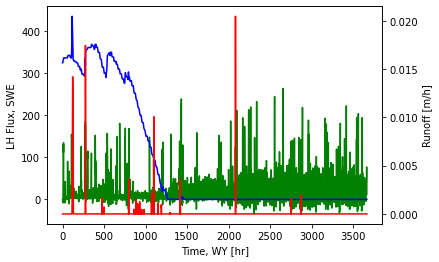

--- 8.166797399520874 seconds ---


Text(0, 0.5, 'Soil Moisture')

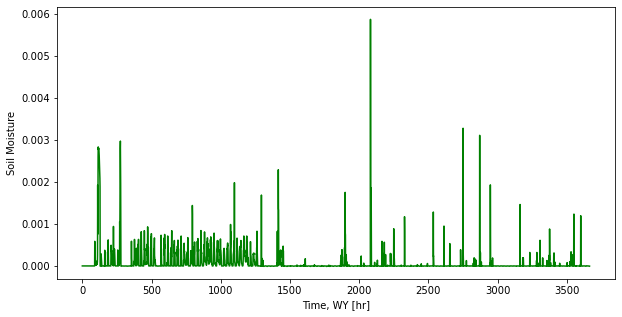

In [2]:
## load PFCLM output and make some example plots 
## PFB read as a sequence

import parflow as pf
import matplotlib.pyplot as plt
import numpy as np
#import netCDF4 as nc
import xarray as xr
import time as timer
from parflow.tools.fs import get_absolute_path
from glob import glob

start_time = timer.time()

print(os.getcwd())
relative_path_to_runfolder = 'outputs'
path = get_absolute_path(relative_path_to_runfolder)
print(path)

# intialize data and time arrays
#data    = np.zeros([8,3666]) #8760 8,8760
time    = np.zeros([8760])

# reading the CLM file PFCLM_SC.out.clm_output.<file number>.C.pfb
# variables are by layer:
# 0  total latent heat flux (Wm-2)
# 1  total upward LW radiation (Wm-2)
# 2  total sensible heat flux (Wm-2)
# 3  ground heat flux (Wm-2)
# 4  net veg. evaporation and transpiration and soil evaporation (mms-1)
# 5  ground evaporation (mms-1)
# 6  soil evaporation (mms-1)
# 7  vegetation evaporation (canopy) and transpiration (mms-1)
# 8  transpiration (mms-1)
# 9  infiltration flux (mms-1)
# 10 SWE (mm)
# 11 ground temperature (K)
# 12 irrigation flux
# 13 - 24 Soil temperature by layer (K)

slope    = 0.05
mannings = 2.e-6
# loop over a year and assemble files to be loaded as an entire sequence
# then map specific variables to the data array which holds things for analysis
# and plotting

files = glob(path+"/precip15c.out.clm_output.*.C.pfb")
CLM_data = pf.read_pfb_sequence(files)

files = glob(path+"/precip15c.out.press.*.pfb")
pf_data = pf.read_pfb_sequence(files)    
# calculate runoff
runoff = (np.sqrt(slope)/mannings) * np.maximum(pf_data[:,19,0,0],0.0)**(5.0/3.0)


files = glob(path+"/precip15c.out.satur.*.pfb")
sat_data=pf.read_pfb_sequence(files)

# Plot LH Flux, SWE and Runoff
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.plot(CLM_data[:,0,0,0], color='g')
ax.plot(CLM_data[:,10,0,0], color='b')
ax2.plot(runoff[:], color='r')
ax.set_xlabel('Time, WY [hr]')
ax.set_ylabel('LH Flux, SWE')
ax2.set_ylabel('Runoff [m/h]')
plt.show()

print("--- %s seconds ---" % (timer.time() - start_time))

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(CLM_data[:,9,0,0], color='g',label='Infiltration Flux') #
ax.set_xlabel('Time, WY [hr]')
ax.set_ylabel('Soil Moisture')

3666
2022-07-14 11:00:00
2022-08-23 13:00:00


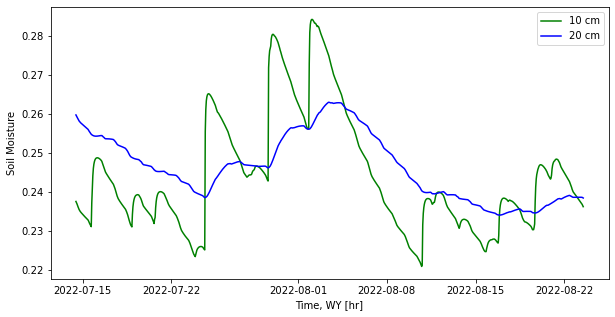

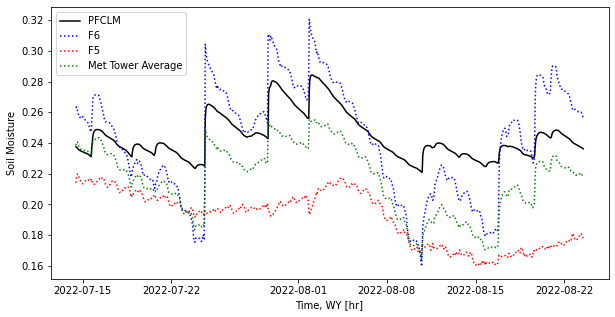

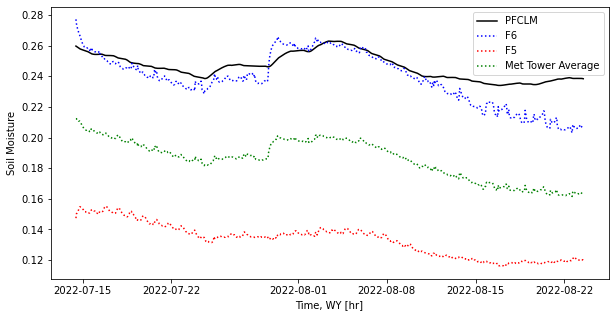

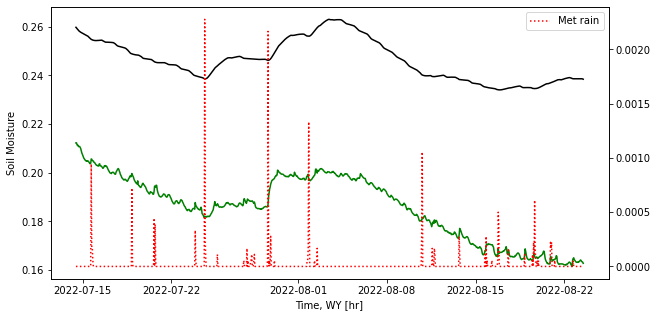

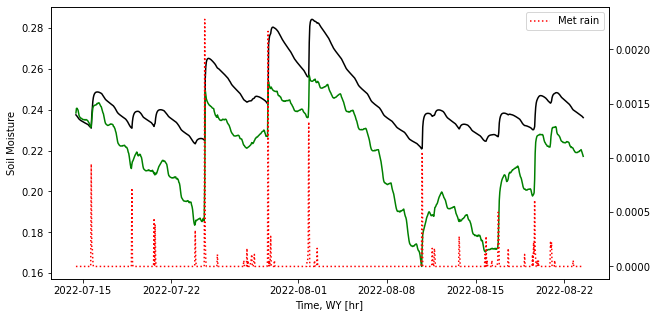

In [3]:
#calibration, only with baseline forcings
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
d1 = datetime(2022, 4, 1,0) 
d2 = datetime(2022, 8, 31,18)
dt = timedelta(hours = 1)
days = np.arange(d1, d2, dt).astype(datetime)
print(np.size(days))

print(days[2507]) #2022-07-14 11:00:00
print(days[3469]) #2022-08-23 13:00:00

#print(sat_data[:,18,0,0]) #about 10 cm
#print(sat_data[:,17,0,0]) #about 20 cm
#first index is timestep
#second index is layer

sm10=sat_data[:,18,0,0]*run4.Geom.domain.Porosity.Value
sm20=sat_data[:,16,0,0]*run4.Geom.domain.Porosity.Value

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(days[2507:3469],sm10[2507:3469], color='g',label='10 cm') #
ax.plot(days[2507:3469],sm20[2507:3469], color='b',label="20 cm")#
ax.set_xlabel('Time, WY [hr]')
ax.set_ylabel('Soil Moisture')

#setting y lims for comparison
#ax2.set_ylim([-0.000015, 0.0002])
#ax.set_ylim([-0.000015,0.00025])
plt.legend()
plt.show()


sm_mt = pd.read_csv('calibration - sm mt hrly.csv')
sm_mt

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(days[2507:3469],sm10[2507:3469], color='k',label='PFCLM') #
ax.plot(days[2507:3469],sm_mt['F6 10cm'], color='b',linestyle='dotted',label="F6")#
ax.plot(days[2507:3469],sm_mt['F5 10cm'], color='r',linestyle='dotted',label="F5")#
ax.plot(days[2507:3469],sm_mt['10 cm average'], color='g',linestyle='dotted',label="Met Tower Average")#
ax.set_xlabel('Time, WY [hr]')
ax.set_ylabel('Soil Moisture')
plt.legend()
plt.show()

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(days[2507:3469],sm20[2507:3469], color='k',label="PFCLM")#
ax.plot(days[2507:3469],sm_mt['F6 20cm'], color='b',linestyle='dotted',label="F6")#
ax.plot(days[2507:3469],sm_mt['F5 20cm'], color='r',linestyle='dotted',label="F5")#
ax.plot(days[2507:3469],sm_mt['20 cm average'], color='g',linestyle='dotted',label="Met Tower Average")#
ax.set_xlabel('Time, WY [hr]')
ax.set_ylabel('Soil Moisture')
plt.legend()
plt.show()

fig, ax = plt.subplots(figsize=(10, 5))
ax2 = ax.twinx()
ax.plot(days[2507:3469],sm20[2507:3469], color='k',label="PFCLM")#
#ax2.plot(days[2507:3469],sm_mt['SAIL rain corrected'], color='b',linestyle='dotted',label="SAIL rain")#
ax2.plot(days[2507:3469],sm_mt['rain (mm/s)'], color='r',linestyle='dotted',label="Met rain")#
ax.plot(days[2507:3469],sm_mt['20 cm average'], color='g',label="Met Tower Average")#
ax.set_xlabel('Time, WY [hr]')
ax.set_ylabel('Soil Moisture')
plt.legend()
plt.show()

fig, ax = plt.subplots(figsize=(10, 5))
ax2 = ax.twinx()
ax.plot(days[2507:3469],sm10[2507:3469], color='k',label="PFCLM")#
#ax2.plot(days[2507:3469],sm_mt['SAIL rain corrected'], color='b',linestyle='dotted',label="SAIL rain")#
ax2.plot(days[2507:3469],sm_mt['rain (mm/s)'], color='r',linestyle='dotted',label="Met rain")#
ax.plot(days[2507:3469],sm_mt['10 cm average'], color='g',label="Met Tower Average")#
ax.set_xlabel('Time, WY [hr]')
ax.set_ylabel('Soil Moisture')
plt.legend()
plt.show()

#print("total trans: ", np.sum(CLM_data[:,8,0,0]))
#print("total net ET: ", np.sum(CLM_data[:,4,0,0]))

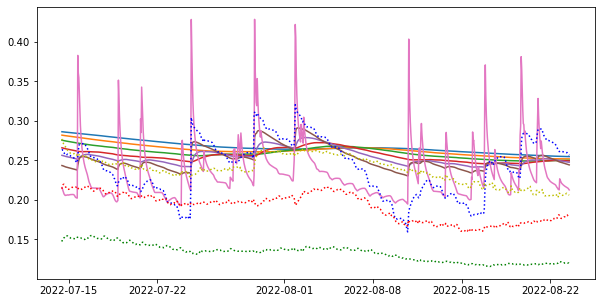

In [10]:

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(days[2507:3469],sat_data[2507:3469,13,0,0]*run1.Geom.domain.Porosity.Value)
ax.plot(days[2507:3469],sat_data[2507:3469,14,0,0]*run1.Geom.domain.Porosity.Value)
ax.plot(days[2507:3469],sat_data[2507:3469,15,0,0]*run1.Geom.domain.Porosity.Value)
ax.plot(days[2507:3469],sat_data[2507:3469,16,0,0]*run1.Geom.domain.Porosity.Value)
ax.plot(days[2507:3469],sat_data[2507:3469,17,0,0]*run1.Geom.domain.Porosity.Value)
ax.plot(days[2507:3469],sat_data[2507:3469,18,0,0]*run1.Geom.domain.Porosity.Value)
ax.plot(days[2507:3469],sat_data[2507:3469,19,0,0]*run1.Geom.domain.Porosity.Value)
ax.plot(days[2507:3469],sm_mt['F6 10cm'], color='b',linestyle='dotted',label="F6")#
ax.plot(days[2507:3469],sm_mt['F5 10cm'], color='r',linestyle='dotted',label="F5")#
ax.plot(days[2507:3469],sm_mt['F6 20cm'], color='y',linestyle='dotted',label="F6")#
ax.plot(days[2507:3469],sm_mt['F5 20cm'], color='g',linestyle='dotted',label="F5")#
#ax.plot(days[2507:3469],sm_mt['20 cm average'], color='k',linestyle='dotted',label="Met Tower Average")#
#ax.plot(days[2507:3469],sm_mt['10 cm average'], color='k',linestyle='dotted',label="Met Tower Average")#

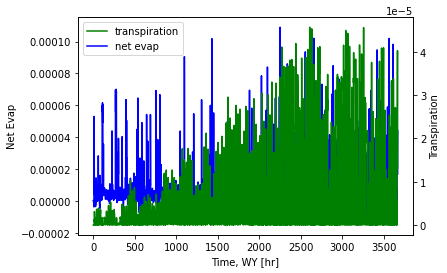

total trans:  0.01894419885826202
total net ET:  0.03389521852409022


In [4]:
#used for comparing ET and transpiration in sensitivity tests
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax2.plot(CLM_data[:,8,0,0], color='g',label='transpiration') #transpiration
ax2.plot(0,color="b",label="net evap")
ax.plot(CLM_data[:,4,0,0], color='b',label="net evap")#net ET and soil evap
ax.set_xlabel('Time, WY [hr]')
ax2.set_ylabel('Transpiration')
ax.set_ylabel('Net Evap')

#setting y lims for comparison
#ax2.set_ylim([-0.000015, 0.0002])
#ax.set_ylim([-0.000015,0.00025])
plt.legend()
plt.show()

print("total trans: ", np.sum(CLM_data[:,8,0,0]))
print("total net ET: ", np.sum(CLM_data[:,4,0,0]))

3667
73340
3667


Text(0, 0.5, 'Soil Moisture')

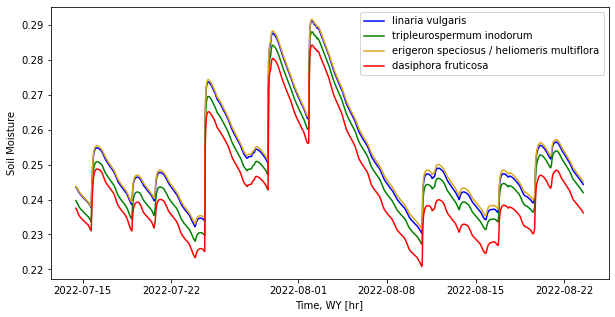

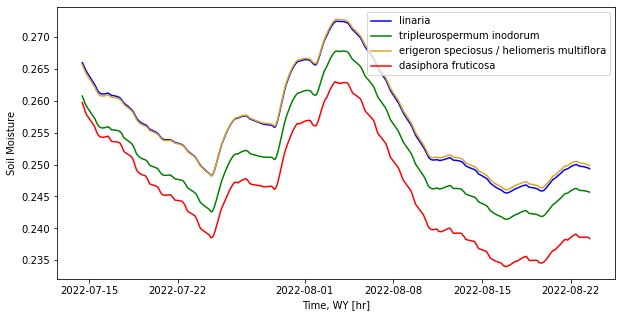

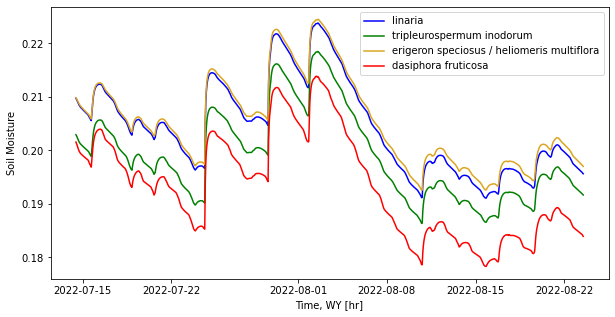

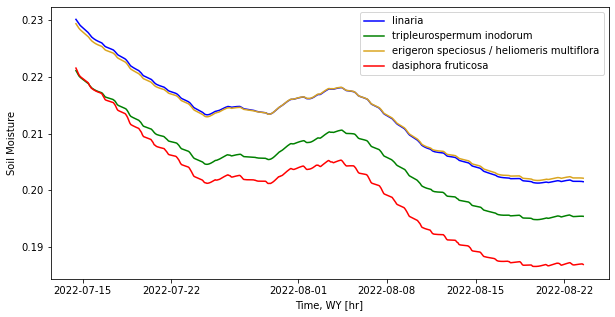

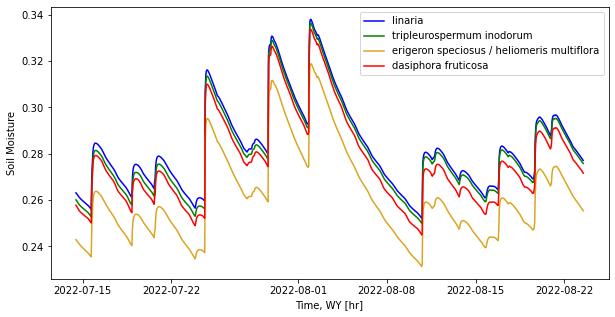

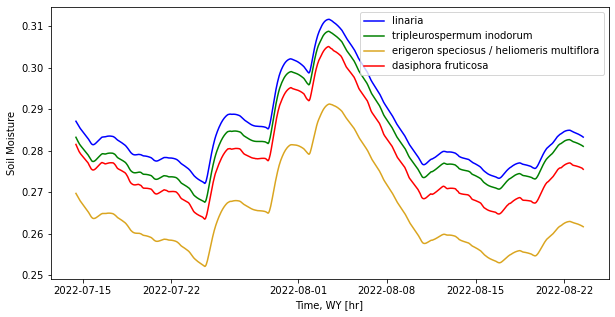

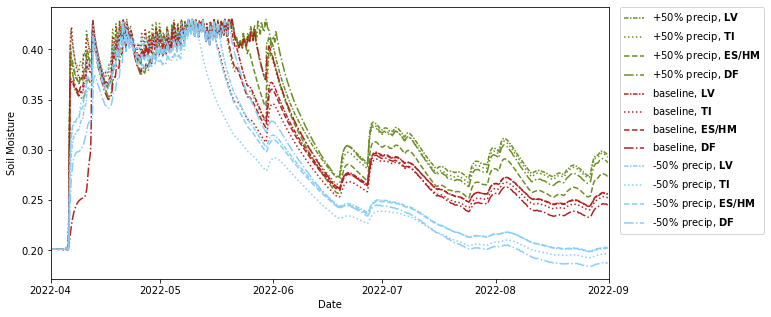

In [3]:
#SOIL MOISTURE TRACES

import numpy as np
import pandas as pd
from glob import glob
from datetime import datetime, timedelta
d1 = datetime(2022, 4, 1,0) 
d2 = datetime(2022, 8, 31,19)
dt = timedelta(hours = 1)
days = np.arange(d1, d2, dt).astype(datetime)
print(np.size(days))

files = glob(path+"/run1.out.satur.*.pfb")
sat_basea=pf.read_pfb_sequence(files)
files = glob(path+"/run2.out.satur.*.pfb")
sat_baseb=pf.read_pfb_sequence(files)
files = glob(path+"/run3.out.satur.*.pfb")
sat_basec=pf.read_pfb_sequence(files)
files = glob(path+"/run4.out.satur.*.pfb")
sat_based=pf.read_pfb_sequence(files)

files = glob(path+"/precip05a.out.satur.*.pfb")
sat_precip05a=pf.read_pfb_sequence(files)
files = glob(path+"/precip15a.out.satur.*.pfb")
sat_precip15a=pf.read_pfb_sequence(files)


files = glob(path+"/precip05b.out.satur.*.pfb")
sat_precip05b=pf.read_pfb_sequence(files)
files = glob(path+"/precip15b.out.satur.*.pfb")
sat_precip15b=pf.read_pfb_sequence(files)

files = glob(path+"/precip05c.out.satur.*.pfb")
sat_precip05c=pf.read_pfb_sequence(files)
files = glob(path+"/precip15c.out.satur.*.pfb")
sat_precip15c=pf.read_pfb_sequence(files)


files = glob(path+"/precip05d.out.satur.*.pfb")
sat_precip05d=pf.read_pfb_sequence(files)
files = glob(path+"/precip15d.out.satur.*.pfb")
sat_precip15d=pf.read_pfb_sequence(files)


print(np.size(sat_precip15c))

sm10_basea=sat_basea[:,18,0,0]*precip15c.Geom.domain.Porosity.Value
sm20_basea=sat_basea[:,16,0,0]*precip15c.Geom.domain.Porosity.Value

sm10_baseb=sat_baseb[:,18,0,0]*precip15c.Geom.domain.Porosity.Value
sm20_baseb=sat_baseb[:,16,0,0]*precip15c.Geom.domain.Porosity.Value

sm10_basec=sat_basec[:,18,0,0]*precip15c.Geom.domain.Porosity.Value
sm20_basec=sat_basec[:,16,0,0]*precip15c.Geom.domain.Porosity.Value

sm10_based=sat_based[:,18,0,0]*precip15c.Geom.domain.Porosity.Value
sm20_based=sat_based[:,16,0,0]*precip15c.Geom.domain.Porosity.Value

sm10_precip05a=sat_precip05a[:,18,0,0]*precip15c.Geom.domain.Porosity.Value
sm20_precip05a=sat_precip05a[:,16,0,0]*precip15c.Geom.domain.Porosity.Value
sm10_precip15a=sat_precip15a[:,18,0,0]*precip15c.Geom.domain.Porosity.Value
sm20_precip15a=sat_precip15a[:,16,0,0]*precip15c.Geom.domain.Porosity.Value

sm10_precip05b=sat_precip05b[:,18,0,0]*precip15c.Geom.domain.Porosity.Value
sm20_precip05b=sat_precip05b[:,16,0,0]*precip15c.Geom.domain.Porosity.Value
sm10_precip15b=sat_precip15b[:,18,0,0]*precip15c.Geom.domain.Porosity.Value
sm20_precip15b=sat_precip15b[:,16,0,0]*precip15c.Geom.domain.Porosity.Value

sm10_precip05c=sat_precip05c[:,18,0,0]*precip15c.Geom.domain.Porosity.Value
sm20_precip05c=sat_precip05c[:,16,0,0]*precip15c.Geom.domain.Porosity.Value
sm10_precip15c=sat_precip15c[:,18,0,0]*precip15c.Geom.domain.Porosity.Value
sm20_precip15c=sat_precip15c[:,16,0,0]*precip15c.Geom.domain.Porosity.Value

sm10_precip05d=sat_precip05d[:,18,0,0]*precip15c.Geom.domain.Porosity.Value
sm20_precip05d=sat_precip05d[:,16,0,0]*precip15c.Geom.domain.Porosity.Value
sm10_precip15d=sat_precip15d[:,18,0,0]*precip15c.Geom.domain.Porosity.Value
sm20_precip15d=sat_precip15d[:,16,0,0]*precip15c.Geom.domain.Porosity.Value

print(np.size(sm10_precip15c))


fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(days[2507:3469],sm10_basea[2507:3469], color='b',label='linaria vulgaris') #
ax.plot(days[2507:3469],sm10_baseb[2507:3469], color='g',label="tripleurospermum inodorum")#
ax.plot(days[2507:3469],sm10_basec[2507:3469], color='goldenrod',label="erigeron speciosus / heliomeris multiflora")#
ax.plot(days[2507:3469],sm10_based[2507:3469], color='r',label="dasiphora fruticosa")#
ax.legend()
ax.set_xlabel('Time, WY [hr]')
ax.set_ylabel('Soil Moisture')

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(days[2507:3469],sm20_basea[2507:3469], color='b',label='linaria') #
ax.plot(days[2507:3469],sm20_baseb[2507:3469], color='g',label="tripleurospermum inodorum")#
ax.plot(days[2507:3469],sm20_basec[2507:3469], color='goldenrod',label="erigeron speciosus / heliomeris multiflora")#
ax.plot(days[2507:3469],sm20_based[2507:3469], color='r',label="dasiphora fruticosa")#
ax.legend()
ax.set_xlabel('Time, WY [hr]')
ax.set_ylabel('Soil Moisture')

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(days[2507:3469],sm10_precip05a[2507:3469], color='b',label='linaria') #
ax.plot(days[2507:3469],sm10_precip05b[2507:3469], color='g',label="tripleurospermum inodorum")#
ax.plot(days[2507:3469],sm10_precip05c[2507:3469], color='goldenrod',label="erigeron speciosus / heliomeris multiflora")#
ax.plot(days[2507:3469],sm10_precip05d[2507:3469], color='r',label="dasiphora fruticosa")#
#ax.set_ylim(0.17,0.29)
ax.legend()
ax.set_xlabel('Time, WY [hr]')
ax.set_ylabel('Soil Moisture')

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(days[2507:3469],sm20_precip05a[2507:3469], color='b',label='linaria') #
ax.plot(days[2507:3469],sm20_precip05b[2507:3469], color='g',label="tripleurospermum inodorum")#
ax.plot(days[2507:3469],sm20_precip05c[2507:3469], color='goldenrod',label="erigeron speciosus / heliomeris multiflora")#
ax.plot(days[2507:3469],sm20_precip05d[2507:3469], color='r',label="dasiphora fruticosa")#
#ax.set_ylim(0.17,0.29)
ax.legend()
ax.set_xlabel('Time, WY [hr]')
ax.set_ylabel('Soil Moisture')

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(days[2507:3469],sm10_precip15a[2507:3469], color='b',label='linaria') #
ax.plot(days[2507:3469],sm10_precip15b[2507:3469], color='g',label="tripleurospermum inodorum")#
ax.plot(days[2507:3469],sm10_precip15c[2507:3469], color='goldenrod',label="erigeron speciosus / heliomeris multiflora")#
ax.plot(days[2507:3469],sm10_precip15d[2507:3469], color='r',label="dasiphora fruticosa")#
#ax.set_ylim(0.17,0.29)
ax.legend()
ax.set_xlabel('Time, WY [hr]')
ax.set_ylabel('Soil Moisture')

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(days[2507:3469],sm20_precip15a[2507:3469], color='b',label='linaria') #
ax.plot(days[2507:3469],sm20_precip15b[2507:3469], color='g',label="tripleurospermum inodorum")#
ax.plot(days[2507:3469],sm20_precip15c[2507:3469], color='goldenrod',label="erigeron speciosus / heliomeris multiflora")#
ax.plot(days[2507:3469],sm20_precip15d[2507:3469], color='r',label="dasiphora fruticosa")#
#ax.set_ylim(0.17,0.29)
ax.legend()
ax.set_xlabel('Time, WY [hr]')
ax.set_ylabel('Soil Moisture')





fig, ax = plt.subplots(figsize=(10, 5))

#ax.plot(days,sm20_basea,linestyle=(0, (3, 1, 1, 1)),color='firebrick',label='Baseline, lv') #
#ax.plot(days,sm20_baseb, color='firebrick',linestyle='dotted',label="Baseline, ti")#
#ax.plot(days,sm20_basec, color='firebrick',linestyle='dashed',label="Baseline, es/hm")#
#ax.plot(days,sm20_based, color='firebrick',linestyle='dashdot',label="Baseline, df")#

ax.plot(days,sm20_precip15a,linestyle=(0, (3, 1, 1, 1)),color='olivedrab',label="+50% precip, $\\bf{LV}$") #
ax.plot(days,sm20_precip15b, color='olivedrab',linestyle='dotted',label="+50% precip, $\\bf{TI}$")#
ax.plot(days,sm20_precip15c, color='olivedrab',linestyle='dashed',label="+50% precip, $\\bf{ES/HM}$")#
ax.plot(days,sm20_precip15d, color='olivedrab',linestyle='dashdot',label="+50% precip, $\\bf{DF}$")#

ax.plot(days,sm20_basea,linestyle=(0, (3, 1, 1, 1)),color='firebrick',label='baseline, $\\bf{LV}$') #
ax.plot(days,sm20_baseb, color='firebrick',linestyle='dotted',label="baseline, $\\bf{TI}$")#
ax.plot(days,sm20_basec, color='firebrick',linestyle='dashed',label="baseline, $\\bf{ES/HM}$")#
ax.plot(days,sm20_based, color='firebrick',linestyle='dashdot',label="baseline, $\\bf{DF}$")#

ax.plot(days,sm20_precip05a,linestyle=(0, (3, 1, 1, 1)),color='lightskyblue',label='-50% precip, $\\bf{LV}$') #
ax.plot(days,sm20_precip05b, color='lightskyblue',linestyle='dotted',label="-50% precip, $\\bf{TI}$")#
ax.plot(days,sm20_precip05c, color='lightskyblue',linestyle='dashed',label="-50% precip, $\\bf{ES/HM}$")#
ax.plot(days,sm20_precip05d, color='lightskyblue',linestyle='dashdot',label="-50% precip, $\\bf{DF}$")#




ax.set_xlim(datetime(2022, 4, 1,0),datetime(2022, 9, 1,0))
#ax.set_ylim(0.19,0.45)

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax.set_xlabel('Date')
ax.set_ylabel('Soil Moisture')



Text(0, 0.5, 'Soil Moisture')

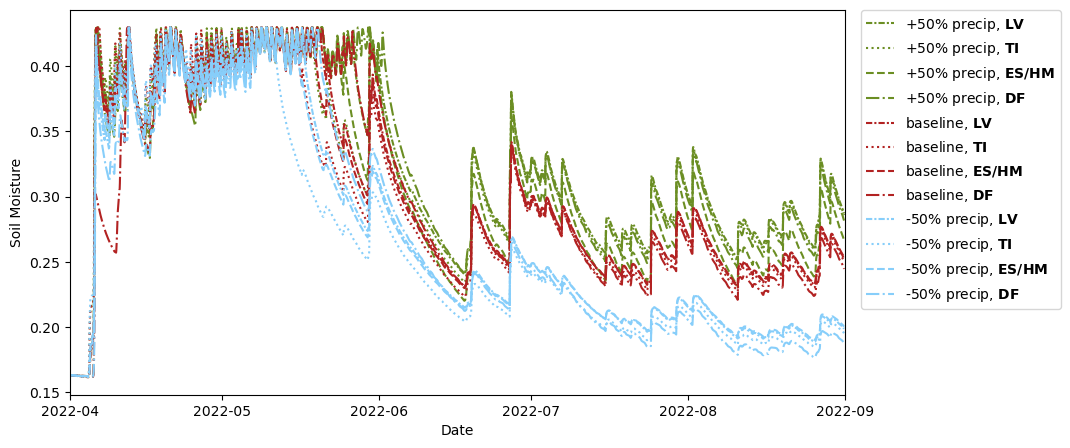

In [34]:
#SOIL MOISTURE 10 CM
fig, ax = plt.subplots(figsize=(10, 5))

#ax.plot(days,sm10_basea,linestyle=(0, (3, 1, 1, 1)),color='firebrick',label='Baseline, lv') #
#ax.plot(days,sm10_baseb, color='firebrick',linestyle='dotted',label="Baseline, ti")#
#ax.plot(days,sm10_basec, color='firebrick',linestyle='dashed',label="Baseline, es/hm")#
#ax.plot(days,sm10_based, color='firebrick',linestyle='dashdot',label="Baseline, df")#


ax.plot(days,sm10_precip15a,linestyle=(0, (3, 1, 1, 1)),color='olivedrab',label="+50% precip, $\\bf{LV}$") #
ax.plot(days,sm10_precip15b, color='olivedrab',linestyle='dotted',label="+50% precip, $\\bf{TI}$")#
ax.plot(days,sm10_precip15c, color='olivedrab',linestyle='dashed',label="+50% precip, $\\bf{ES/HM}$")#
ax.plot(days,sm10_precip15d, color='olivedrab',linestyle='dashdot',label="+50% precip, $\\bf{DF}$")#

ax.plot(days,sm10_basea,linestyle=(0, (3, 1, 1, 1)),color='firebrick',label='baseline, $\\bf{LV}$') #
ax.plot(days,sm10_baseb, color='firebrick',linestyle='dotted',label="baseline, $\\bf{TI}$")#
ax.plot(days,sm10_basec, color='firebrick',linestyle='dashed',label="baseline, $\\bf{ES/HM}$")#
ax.plot(days,sm10_based, color='firebrick',linestyle='dashdot',label="baseline, $\\bf{DF}$")#

ax.plot(days,sm10_precip05a,linestyle=(0, (3, 1, 1, 1)),color='lightskyblue',label='-50% precip, $\\bf{LV}$') #
ax.plot(days,sm10_precip05b, color='lightskyblue',linestyle='dotted',label="-50% precip, $\\bf{TI}$")#
ax.plot(days,sm10_precip05c, color='lightskyblue',linestyle='dashed',label="-50% precip, $\\bf{ES/HM}$")#
ax.plot(days,sm10_precip05d, color='lightskyblue',linestyle='dashdot',label="-50% precip, $\\bf{DF}$")#


ax.set_xlim(datetime(2022, 4, 1,0),datetime(2022, 9, 1,0))
#ax.set_ylim(0.19,0.46)

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax.set_xlabel('Date')
ax.set_ylabel('Soil Moisture')

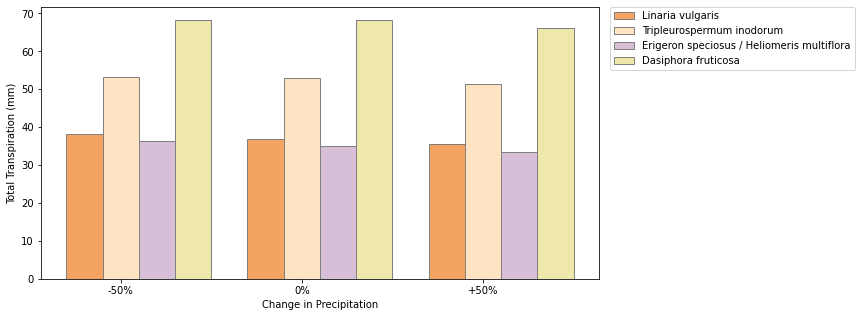

In [4]:
#TRANSPIRATION

files = glob(path+"/run1.out.clm_output.*.pfb")
CLM_basea=pf.read_pfb_sequence(files)

files = glob(path+"/run2.out.clm_output.*.pfb")
CLM_baseb=pf.read_pfb_sequence(files)

files = glob(path+"/run3.out.clm_output.*.pfb")
CLM_basec=pf.read_pfb_sequence(files)

files = glob(path+"/run4.out.clm_output.*.pfb")
CLM_based=pf.read_pfb_sequence(files)

files = glob(path+"/precip05a.out.clm_output.*.pfb")
CLM_precip05a=pf.read_pfb_sequence(files)
files = glob(path+"/precip15a.out.clm_output.*.pfb")
CLM_precip15a=pf.read_pfb_sequence(files)

files = glob(path+"/precip05b.out.clm_output.*.pfb")
CLM_precip05b=pf.read_pfb_sequence(files)
files = glob(path+"/precip15b.out.clm_output.*.pfb")
CLM_precip15b=pf.read_pfb_sequence(files)

files = glob(path+"/precip05c.out.clm_output.*.pfb")
CLM_precip05c=pf.read_pfb_sequence(files)
files = glob(path+"/precip15c.out.clm_output.*.pfb")
CLM_precip15c=pf.read_pfb_sequence(files)

files = glob(path+"/precip05d.out.clm_output.*.pfb")
CLM_precip05d=pf.read_pfb_sequence(files)
files = glob(path+"/precip15d.out.clm_output.*.pfb")
CLM_precip15d=pf.read_pfb_sequence(files)

tbasea=np.sum(CLM_basea[:,8,0,0])*60*60
tbaseb=np.sum(CLM_baseb[:,8,0,0])*60*60
tbasec=np.sum(CLM_basec[:,8,0,0])*60*60
tbased=np.sum(CLM_based[:,8,0,0])*60*60
tprecip05a=np.sum(CLM_precip05a[:,8,0,0])*60*60
tprecip05b=np.sum(CLM_precip05b[:,8,0,0])*60*60
tprecip05c=np.sum(CLM_precip05c[:,8,0,0])*60*60
tprecip05d=np.sum(CLM_precip05d[:,8,0,0])*60*60
tprecip15a=np.sum(CLM_precip15a[:,8,0,0])*60*60
tprecip15b=np.sum(CLM_precip15b[:,8,0,0])*60*60
tprecip15c=np.sum(CLM_precip15c[:,8,0,0])*60*60
tprecip15d=np.sum(CLM_precip15d[:,8,0,0])*60*60


fig, ax = plt.subplots(figsize=(10, 5))
tempbase=[tbasea,tbaseb,tbasec,tbased]
precip05=[tprecip05a,tprecip05b,tprecip05c,tprecip05d]
precip15=[tprecip15a,tprecip15b,tprecip15c,tprecip15d]

linaria_vulgaris=[tprecip05a,tbasea,tprecip15a,]
tripleurospermum_inodorum=[tprecip05b,tbaseb,tprecip15b,]
erigeron_speciosus_heliomeris_multiflora=[tprecip05c,tbasec,tprecip15c]
dasiphora_fructicosa=[tprecip05d,tbased,tprecip15d]

barWidth=0.2
br1=np.arange(len(linaria_vulgaris))
br2=[x+barWidth for x in br1]
br3=[x+barWidth for x in br2]
br4=[x+barWidth for x in br3]

plt.bar(br1,linaria_vulgaris,edgecolor='grey',color='sandybrown',width=barWidth,label="Linaria vulgaris")
plt.bar(br2,tripleurospermum_inodorum,edgecolor='grey',color='bisque',width=barWidth,label='Tripleurospermum inodorum')
plt.bar(br3,erigeron_speciosus_heliomeris_multiflora,edgecolor='grey',color='thistle',width=barWidth,label='Erigeron speciosus / Heliomeris multiflora')
plt.bar(br4,dasiphora_fructicosa,color='palegoldenrod',edgecolor='grey',width=barWidth,label='Dasiphora fruticosa')

plt.xlabel('Change in Precipitation')
plt.ylabel('Total Transpiration (mm)')
plt.xticks([r + barWidth for r in range(len(linaria_vulgaris))],['-50%','0%','+50%'])

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()


#tPlot, axs = plt.subplots(figsize=(13,8),nrows=4, ncols=1, sharex=True, sharey=True, gridspec_kw={'height_ratios':[2,2,2,2]})
#tPlot.suptitle('Transpiration', fontsize=20)
#axs[0].plot(CLM_swe100a[:,8,0,0],color='b',label='linaria')
#axs[1].plot(CLM_basea[:,8,0,0],color='g',label="tripleurospermum inodorum")
#axs[2].plot(CLM_swe1300a[:,8,0,0],color='goldenrod',label="erigeron speciosus / heliomeris multiflora")
#axs[3].plot(CLM_swe100b[:,8,0,0], color='r',label="dasiphora fruticosa")
#axs[3].set_xlabel('Time, WY [hr]')
#axs[1].set_ylabel('Transpiration [mm/s]')
#plt.show()

#tPlot, axs = plt.subplots(figsize=(13,8),nrows=4, ncols=1, sharex=True, sharey=True, gridspec_kw={'height_ratios':[2,2,2,2]})
#tPlot.suptitle('Net ET and Soil Evap', fontsize=20)
#axs[0].plot(CLM_data1[:,4,0,0],color='b',label='linaria')
#axs[1].plot(CLM_data3[:,4,0,0],color='g',label="tripleurospermum inodorum")
#axs[2].plot(CLM_data4[:,4,0,0],color='goldenrod',label="erigeron speciosus / heliomeris multiflora")
#axs[3].plot(CLM_data5[:,4,0,0], color='r',label="dasiphora fruticosa")
#axs[3].set_xlabel('Time, WY [hr]')
#axs[1].set_ylabel('Net ET [mm/s]')
#plt.show()



#print("total trans: ", np.sum(CLM_data[:,8,0,0]))
#print("total net ET: ", np.sum(CLM_data[:,4,0,0]))

In [7]:
print(tempbase)
print(precip05)
print(precip15)

[36.961288610583296, 52.872912723310534, 35.110424375925774, 68.19911588974327]
[38.122349745758235, 53.25734150488441, 36.3370079959089, 68.28216360921871]
[35.441108450917596, 51.290268071701654, 33.46512493430563, 66.10451349359575]


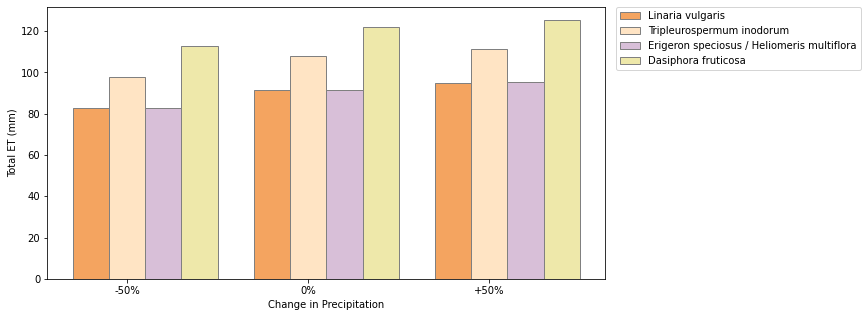

In [5]:
#ET
tbasea=np.sum(CLM_basea[:,4,0,0])*60*60
tbaseb=np.sum(CLM_baseb[:,4,0,0])*60*60
tbasec=np.sum(CLM_basec[:,4,0,0])*60*60
tbased=np.sum(CLM_based[:,4,0,0])*60*60
tprecip05a=np.sum(CLM_precip05a[:,4,0,0])*60*60
tprecip05b=np.sum(CLM_precip05b[:,4,0,0])*60*60
tprecip05c=np.sum(CLM_precip05c[:,4,0,0])*60*60
tprecip05d=np.sum(CLM_precip05d[:,4,0,0])*60*60
tprecip15a=np.sum(CLM_precip15a[:,4,0,0])*60*60
tprecip15b=np.sum(CLM_precip15b[:,4,0,0])*60*60
tprecip15c=np.sum(CLM_precip15c[:,4,0,0])*60*60
tprecip15d=np.sum(CLM_precip15d[:,4,0,0])*60*60


fig, ax = plt.subplots(figsize=(10, 5))
tempbase=[tbasea,tbaseb,tbasec,tbased]
precip05=[tprecip05a,tprecip05b,tprecip05c,tprecip05d]
precip15=[tprecip15a,tprecip15b,tprecip15c,tprecip15d]

linaria_vulgaris=[tprecip05a,tbasea,tprecip15a,]
tripleurospermum_inodorum=[tprecip05b,tbaseb,tprecip15b,]
erigeron_speciosus_heliomeris_multiflora=[tprecip05c,tbasec,tprecip15c]
dasiphora_fructicosa=[tprecip05d,tbased,tprecip15d]

barWidth=0.2
br1=np.arange(len(linaria_vulgaris))
br2=[x+barWidth for x in br1]
br3=[x+barWidth for x in br2]
br4=[x+barWidth for x in br3]

plt.bar(br1,linaria_vulgaris,edgecolor='grey',color='sandybrown',width=barWidth,label="Linaria vulgaris")
plt.bar(br2,tripleurospermum_inodorum,edgecolor='grey',color='bisque',width=barWidth,label='Tripleurospermum inodorum')
plt.bar(br3,erigeron_speciosus_heliomeris_multiflora,edgecolor='grey',color='thistle',width=barWidth,label='Erigeron speciosus / Heliomeris multiflora')
plt.bar(br4,dasiphora_fructicosa,color='palegoldenrod',edgecolor='grey',width=barWidth,label='Dasiphora fruticosa')

plt.xlabel('Change in Precipitation')
plt.ylabel('Total ET (mm)')
plt.xticks([r + barWidth for r in range(len(linaria_vulgaris))],['-50%','0%','+50%'])

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

In [9]:
print(tempbase)
print(precip05)
print(precip15)

[91.52373302443667, 107.69749928392454, 91.65441282592482, 122.0227866867248]
[82.79637801836535, 97.71735831986715, 82.71986402943497, 112.53792005394202]
[94.89291132590715, 111.15859132756515, 95.12734476674571, 125.393907626851]


Text(0.5, 1.0, 'Dasiphora Fruticosa')

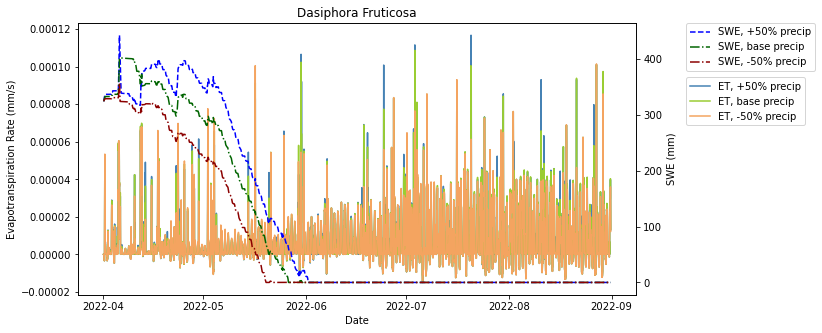

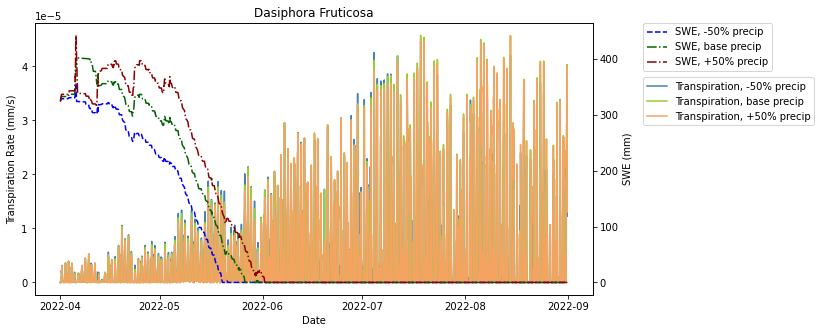

In [6]:
#ET and Transpiration Time Series with SWE

fig, ax = plt.subplots(figsize=(10, 5))
ax2 = ax.twinx()
ax.plot(days[0:3666],CLM_precip15d[:,7,0,0],label='ET, +50% precip',color='steelblue')
ax.plot(days[0:3666],CLM_based[:,7,0,0],label="ET, base precip", color='yellowgreen')
ax.plot(days[0:3666],CLM_precip05d[:,7,0,0],label="ET, -50% precip",color='sandybrown')
ax2.plot(days[0:3666],CLM_precip15d[:,10,0,0],label='SWE, +50% precip',color='blue',linestyle='--')
ax2.plot(days[0:3666],CLM_based[:,10,0,0],label='SWE, base precip',color='darkgreen',linestyle='dashdot')
ax2.plot(days[0:3666],CLM_precip05d[:,10,0,0],label='SWE, -50% precip',color='darkred',linestyle='dashdot')



ax.set_ylabel('Evapotranspiration Rate (mm/s)')
ax.set_xlabel('Date')
ax2.set_ylabel('SWE (mm)')
ax.legend(bbox_to_anchor=(1.09, 0.8), loc='upper left', borderaxespad=0)
ax2.legend(bbox_to_anchor=(1.09, 1), loc='upper left', borderaxespad=0)

ax.set_title('Dasiphora Fruticosa')

fig, ax = plt.subplots(figsize=(10, 5))
ax2 = ax.twinx()
ax.plot(days[0:3666],CLM_precip05d[:,8,0,0],label='Transpiration, -50% precip',color='steelblue')
ax.plot(days[0:3666],CLM_based[:,8,0,0],label="Transpiration, base precip", color='yellowgreen')
ax.plot(days[0:3666],CLM_precip15d[:,8,0,0],label="Transpiration, +50% precip",color='sandybrown')
ax2.plot(days[0:3666],CLM_precip05d[:,10,0,0],label='SWE, -50% precip',color='blue',linestyle='--')
ax2.plot(days[0:3666],CLM_based[:,10,0,0],label='SWE, base precip',color='darkgreen',linestyle='dashdot')
ax2.plot(days[0:3666],CLM_precip15d[:,10,0,0],label='SWE, +50% precip',color='darkred',linestyle='dashdot')



ax.set_ylabel('Transpiration Rate (mm/s)')
ax.set_xlabel('Date')
ax2.set_ylabel('SWE (mm)')
ax.legend(bbox_to_anchor=(1.09, 0.8), loc='upper left', borderaxespad=0)
ax2.legend(bbox_to_anchor=(1.09, 1), loc='upper left', borderaxespad=0)

ax.set_title('Dasiphora Fruticosa')

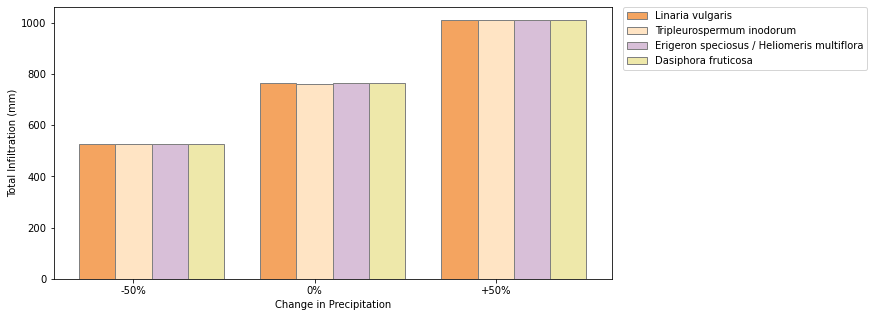

In [8]:
#WATER BALANCE 
#INFILTRATION

files = glob(path+"/run1.out.press.*.pfb")
pf_basea=pf.read_pfb_sequence(files)

files = glob(path+"/run2.out.press.*.pfb")
pf_baseb=pf.read_pfb_sequence(files)

files = glob(path+"/run3.out.press.*.pfb")
pf_basec=pf.read_pfb_sequence(files)

files = glob(path+"/run4.out.press.*.pfb")
pf_based=pf.read_pfb_sequence(files)

files = glob(path+"/precip05a.out.press.*.pfb")
pf_precip05a=pf.read_pfb_sequence(files)
files = glob(path+"/precip15a.out.press.*.pfb")
pf_precip15a=pf.read_pfb_sequence(files)

files = glob(path+"/precip05b.out.press.*.pfb")
pf_precip05b=pf.read_pfb_sequence(files)
files = glob(path+"/precip15b.out.press.*.pfb")
pf_precip15b=pf.read_pfb_sequence(files)

files = glob(path+"/precip05c.out.press.*.pfb")
pf_precip05c=pf.read_pfb_sequence(files)
files = glob(path+"/precip15c.out.press.*.pfb")
pf_precip15c=pf.read_pfb_sequence(files)

files = glob(path+"/precip05d.out.press.*.pfb")
pf_precip05d=pf.read_pfb_sequence(files)
files = glob(path+"/precip15d.out.press.*.pfb")
pf_precip15d=pf.read_pfb_sequence(files)


ibasea=np.sum(CLM_basea[:,9,0,0])*60*60
ibaseb=np.sum(CLM_baseb[:,9,0,0])*60*60
ibasec=np.sum(CLM_basec[:,9,0,0])*60*60
ibased=np.sum(CLM_based[:,9,0,0])*60*60
iprecip05a=np.sum(CLM_precip05a[:,9,0,0])*60*60
iprecip05b=np.sum(CLM_precip05b[:,9,0,0])*60*60
iprecip05c=np.sum(CLM_precip05c[:,9,0,0])*60*60
iprecip05d=np.sum(CLM_precip05d[:,9,0,0])*60*60
iprecip15a=np.sum(CLM_precip15a[:,9,0,0])*60*60
iprecip15b=np.sum(CLM_precip15b[:,9,0,0])*60*60
iprecip15c=np.sum(CLM_precip15c[:,9,0,0])*60*60
iprecip15d=np.sum(CLM_precip15d[:,9,0,0])*60*60


fig, ax = plt.subplots(figsize=(10, 5))
tempbase=[ibasea,ibaseb,ibasec,ibased]
precip05=[iprecip05a,iprecip05b,iprecip05c,iprecip05d]
precip15=[iprecip15a,iprecip15b,iprecip15c,iprecip15d]

linaria_vulgaris=[iprecip05a,ibasea,iprecip15a]
tripleurospermum_inodorum=[iprecip05b,ibaseb,iprecip15b]
erigeron_speciosus_heliomeris_multiflora=[iprecip05c,ibasec,iprecip15c]
dasiphora_fructicosa=[iprecip05d,ibased,iprecip15d]

barWidth=0.2
br1=np.arange(len(linaria_vulgaris))
br2=[x+barWidth for x in br1]
br3=[x+barWidth for x in br2]
br4=[x+barWidth for x in br3]

plt.bar(br1,linaria_vulgaris,edgecolor='grey',color='sandybrown',width=barWidth,label="Linaria vulgaris")
plt.bar(br2,tripleurospermum_inodorum,edgecolor='grey',color='bisque',width=barWidth,label='Tripleurospermum inodorum')
plt.bar(br3,erigeron_speciosus_heliomeris_multiflora,edgecolor='grey',color='thistle',width=barWidth,label='Erigeron speciosus / Heliomeris multiflora')
plt.bar(br4,dasiphora_fructicosa,color='palegoldenrod',edgecolor='grey',width=barWidth,label='Dasiphora fruticosa')

plt.xlabel('Change in Precipitation')
plt.ylabel('Total Infiltration (mm)')
plt.xticks([r + barWidth for r in range(len(linaria_vulgaris))],['-50%','0%','+50%'])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()




In [9]:
print(tempbase)
print(precip05)
print(precip15)

[765.2986216222073, 762.4815425138243, 763.6626048090494, 765.0847224119138]
[526.1491069286047, 526.4666253847392, 524.6814364258803, 525.6364845050662]
[1011.0133449573098, 1009.033353999876, 1009.6286641356223, 1010.0770130573876]


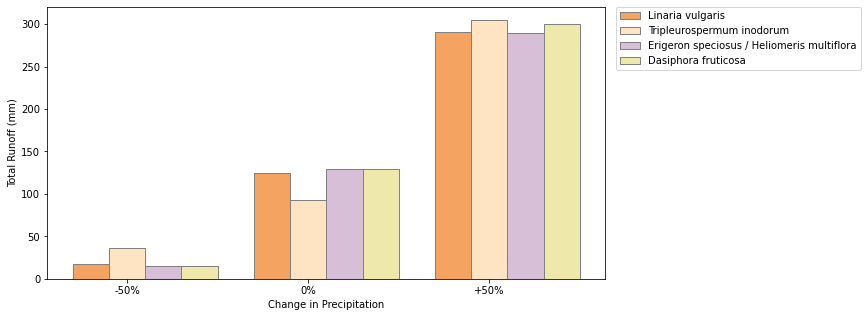

In [10]:
#RUNOFF
rbasea = np.sum((np.sqrt(slope)/mannings) * np.maximum(pf_basea[:,19,0,0],0.0)**(5.0/3.0))*1000
rbaseb = np.sum((np.sqrt(slope)/mannings) * np.maximum(pf_baseb[:,19,0,0],0.0)**(5.0/3.0))*1000
rbasec = np.sum((np.sqrt(slope)/mannings) * np.maximum(pf_basec[:,19,0,0],0.0)**(5.0/3.0))*1000
rbased = np.sum((np.sqrt(slope)/mannings) * np.maximum(pf_based[:,19,0,0],0.0)**(5.0/3.0))*1000
rprecip05a = np.sum((np.sqrt(slope)/mannings) * np.maximum(pf_precip05a[:,19,0,0],0.0)**(5.0/3.0))*1000
rprecip15a = np.sum((np.sqrt(slope)/mannings) * np.maximum(pf_precip15a[:,19,0,0],0.0)**(5.0/3.0))*1000
rprecip05b = np.sum((np.sqrt(slope)/mannings) * np.maximum(pf_precip05b[:,19,0,0],0.0)**(5.0/3.0))*1000
rprecip15b = np.sum((np.sqrt(slope)/mannings) * np.maximum(pf_precip15b[:,19,0,0],0.0)**(5.0/3.0))*1000
rprecip05c = np.sum((np.sqrt(slope)/mannings) * np.maximum(pf_precip05c[:,19,0,0],0.0)**(5.0/3.0))*1000
rprecip15c = np.sum((np.sqrt(slope)/mannings) * np.maximum(pf_precip15c[:,19,0,0],0.0)**(5.0/3.0))*1000
rprecip05d = np.sum((np.sqrt(slope)/mannings) * np.maximum(pf_precip05d[:,19,0,0],0.0)**(5.0/3.0))*1000
rprecip15d = np.sum((np.sqrt(slope)/mannings) * np.maximum(pf_precip15d[:,19,0,0],0.0)**(5.0/3.0))*1000



fig, ax = plt.subplots(figsize=(10, 5))
tempbase=[rbasea,rbaseb,rbasec,rbased]
precip05=[rprecip05a,rprecip05b,rprecip05c,rprecip05d]
precip15=[rprecip15a,rprecip15b,rprecip15c,rprecip15d]

linaria_vulgaris=[rprecip05a,rbasea,rprecip15a]
tripleurospermum_inodorum=[rprecip05b,rbaseb,rprecip15b]
erigeron_speciosus_heliomeris_multiflora=[rprecip05c,rbasec,rprecip15c]
dasiphora_fructicosa=[rprecip05d,rbased,rprecip15d]

barWidth=0.2
br1=np.arange(len(linaria_vulgaris))
br2=[x+barWidth for x in br1]
br3=[x+barWidth for x in br2]
br4=[x+barWidth for x in br3]

plt.bar(br1,linaria_vulgaris,edgecolor='grey',color='sandybrown',width=barWidth,label="Linaria vulgaris")
plt.bar(br2,tripleurospermum_inodorum,edgecolor='grey',color='bisque',width=barWidth,label='Tripleurospermum inodorum')
plt.bar(br3,erigeron_speciosus_heliomeris_multiflora,edgecolor='grey',color='thistle',width=barWidth,label='Erigeron speciosus / Heliomeris multiflora')
plt.bar(br4,dasiphora_fructicosa,color='palegoldenrod',edgecolor='grey',width=barWidth,label='Dasiphora fruticosa')

plt.xlabel('Change in Precipitation')
plt.ylabel('Total Runoff (mm)')
plt.xticks([r + barWidth for r in range(len(linaria_vulgaris))],['-50%','0%','+50%'])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()



In [11]:
print(tempbase)
print(precip05)
print(precip15)

[125.06355201702429, 92.51943827762877, 129.31235177210553, 129.84051705786638]
[18.00847854817746, 36.603577992640304, 15.491039217258463, 15.63625838020577]
[290.27758465001875, 304.9536319283125, 289.8330388960372, 299.9253353913558]
